In [ ]:
!python -m textblob.download_corpora
!pip install NRCLex

In [ ]:
!pip install tqdm

In [ ]:
!pip install transformers

In [ ]:
from nrclex import NRCLex
import pandas as pd
from transformers import pipeline
import sys

In [ ]:
from tqdm import tqdm

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Cleaning data

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/Sentiment.txt') as f:
    lines = f.readlines()
#print(lines[94])
empties=0
for i in range(len(lines)):
  lines[i]=lines[i].split('\n')[0]
  if lines[i]=='':
    empties+=1
print(empties)
for line in reversed(lines):
  if line=='':
    lines.remove(line)

#lines

92


# First model 

In [ ]:
text_object = NRCLex("who change their coats after taking people's vote, drive around in blue cars, hire assistants in black and continue to feel life even if convicted")
text_object.affect_frequencies

In [ ]:
text_object.raw_emotion_scores

In [ ]:
text_object.top_emotions

In [ ]:
#arata si ce cuvant a declansat emotia gasita
text_object.affect_dict

In [ ]:
text_object.affect_list

In [ ]:
df = pd.read_csv ('/content/drive/MyDrive/Colab Notebooks/SENTIMENT.csv', on_bad_lines='skip')
df

In [ ]:
document = Document("/content/drive/MyDrive/Colab Notebooks/SENTIMENT.docx")
table_num=2
nheader=0
df = read_docx_table(document,table_num,nheader)
print(df)

Results

In [ ]:
results={}
for line in lines:
  text_object = NRCLex(line)
  results[line]=text_object.affect_list
print(results)

{'scary': [], 'exploits': [], 'ghost" mayor': ['fear', 'positive'], 'leaves': [], 'garbage scanda': ['disgust', 'negative'], 'fat.': ['disgust', 'negative', 'sadness'], 'scam': [], 'traitor': ['anger', 'disgust', 'fear', 'negative', 'sadness'], 'garbage': ['disgust', 'negative'], 'diapers:': [], 'infamous electoral law': ['anger', 'disgust', 'fear', 'negative', 'trust'], 'trus': [], 'throwing the country into chaos ': ['anger', 'fear', 'negative', 'sadness'], 'paid for by all the citizens with taxes, ': [], 'embarrassment,': ['fear', 'negative', 'sadness', 'surprise'], 'MARCH AND CORRUPT SYSTEM.': [], 'INCENERATORS': [], 'these leeches': ['disgust', 'fear', 'negative'], 'fucked up': [], ' threeheaded monster ': ['fear', 'negative'], ' FUCK': [], 'had connections with the mafia,': ['fear', 'negative'], 'STRONG ': [], 'EVASORS': [], 'watch over and impose sanctions on those who violate the law i of the State.': ['anticipation', 'fear', 'trust'], 'a country with no children, and without m

# Second Model

In [ ]:
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

In [ ]:
sequence_to_classify = "PUNCHED for the purpose of robbery"
candidate_labels = ['fear', 'anger', 'admiration', 'irony', 'disgust', 'empathy']
classifier(sequence_to_classify, candidate_labels)

{'labels': ['irony', 'anger', 'fear', 'disgust', 'empathy', 'admiration'],
 'scores': [0.40805158019065857,
  0.2167951762676239,
  0.15080396831035614,
  0.11127874255180359,
  0.06445261090993881,
  0.04861784726381302],
 'sequence': 'PUNCHED for the purpose of robbery'}

In [ ]:
results={
    'fear':0,
    'anger':0, 
    'admiration':0,
    'irony':0, 
    'disgust':0,
    'empathy':0
}
sent_values=[]
for line in tqdm(lines):
  cr_values=classifier(line, candidate_labels)
  pos=0
  for label in cr_values.get('labels'):
    results[label]+=cr_values.get('scores')[pos]
    pos+=1
  sent_values.append((line,cr_values))

sent_values

In [ ]:
results=[('scary',
  {'labels': ['fear', 'disgust', 'anger', 'irony', 'empathy', 'admiration'],
   'scores': [0.9055449962615967,
    0.057043418288230896,
    0.016087953001260757,
    0.013115301728248596,
    0.00582507299259305,
    0.0023832134902477264],
   'sequence': 'scary'}),
 ('exploits',
  {'labels': ['irony', 'disgust', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.2929975092411041,
    0.1894872784614563,
    0.1611778438091278,
    0.16085614264011383,
    0.10300444811582565,
    0.0924767553806305],
   'sequence': 'exploits'}),
 ('ghost" mayor',
  {'labels': ['fear', 'irony', 'disgust', 'anger', 'admiration', 'empathy'],
   'scores': [0.40449953079223633,
    0.21041245758533478,
    0.20495706796646118,
    0.06168926879763603,
    0.06109091266989708,
    0.0573507621884346],
   'sequence': 'ghost" mayor'}),
 ('leaves',
  {'labels': ['admiration', 'irony', 'disgust', 'empathy', 'fear', 'anger'],
   'scores': [0.27830860018730164,
    0.20730778574943542,
    0.1970110684633255,
    0.1554524451494217,
    0.09084713459014893,
    0.07107298076152802],
   'sequence': 'leaves'}),
 ('garbage scanda',
  {'labels': ['disgust', 'irony', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.8603458404541016,
    0.08399515599012375,
    0.028728244826197624,
    0.014998748898506165,
    0.006585537455976009,
    0.005346500314772129],
   'sequence': 'garbage scanda'}),
 ('fat.',
  {'labels': ['disgust', 'irony', 'admiration', 'anger', 'empathy', 'fear'],
   'scores': [0.38280582427978516,
    0.25829753279685974,
    0.11339355260133743,
    0.10542730987071991,
    0.07173039764165878,
    0.0683453306555748],
   'sequence': 'fat.'}),
 ('scam',
  {'labels': ['irony', 'disgust', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.34158438444137573,
    0.3358795642852783,
    0.15384873747825623,
    0.09391410648822784,
    0.0467328280210495,
    0.028040358796715736],
   'sequence': 'scam'}),
 ('traitor',
  {'labels': ['disgust', 'irony', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.5488138794898987,
    0.17507444322109222,
    0.16070684790611267,
    0.09009014070034027,
    0.014398608356714249,
    0.01091610174626112],
   'sequence': 'traitor'}),
 ('garbage',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'admiration', 'empathy'],
   'scores': [0.8985546231269836,
    0.03856632485985756,
    0.0378279983997345,
    0.017680848017334938,
    0.0037313089706003666,
    0.0036389182787388563],
   'sequence': 'garbage'}),
 ('diapers:',
  {'labels': ['disgust', 'irony', 'admiration', 'empathy', 'fear', 'anger'],
   'scores': [0.3539879322052002,
    0.34767580032348633,
    0.106315977871418,
    0.10282756388187408,
    0.05176221579313278,
    0.03743050619959831],
   'sequence': 'diapers:'}),
 ('infamous electoral law',
  {'labels': ['irony', 'disgust', 'anger', 'fear', 'admiration', 'empathy'],
   'scores': [0.43019533157348633,
    0.2849467694759369,
    0.10520580410957336,
    0.0917663499712944,
    0.054326944053173065,
    0.03355877846479416],
   'sequence': 'infamous electoral law'}),
 ('trus',
  {'labels': ['admiration', 'irony', 'empathy', 'disgust', 'anger', 'fear'],
   'scores': [0.3331144154071808,
    0.21198968589305878,
    0.14315111935138702,
    0.11688605695962906,
    0.10260360687971115,
    0.09225509315729141],
   'sequence': 'trus'}),
 ('throwing the country into chaos ',
  {'labels': ['anger', 'disgust', 'fear', 'irony', 'empathy', 'admiration'],
   'scores': [0.36504414677619934,
    0.2387087494134903,
    0.16970698535442352,
    0.164264976978302,
    0.040715936571359634,
    0.021559270098805428],
   'sequence': 'throwing the country into chaos '}),
 ('paid for by all the citizens with taxes, ',
  {'labels': ['admiration', 'irony', 'empathy', 'fear', 'anger', 'disgust'],
   'scores': [0.38958773016929626,
    0.22306345403194427,
    0.17701369524002075,
    0.08972855657339096,
    0.06384311616420746,
    0.056763458997011185],
   'sequence': 'paid for by all the citizens with taxes, '}),
 ('embarrassment,',
  {'labels': ['disgust', 'irony', 'fear', 'empathy', 'anger', 'admiration'],
   'scores': [0.7401815056800842,
    0.11163255572319031,
    0.07868573814630508,
    0.03299890086054802,
    0.024561384692788124,
    0.011939936317503452],
   'sequence': 'embarrassment,'}),
 ('MARCH AND CORRUPT SYSTEM.',
  {'labels': ['disgust', 'irony', 'anger', 'fear', 'admiration', 'empathy'],
   'scores': [0.4029347002506256,
    0.2624117136001587,
    0.15789689123630524,
    0.07718560099601746,
    0.05055474862456322,
    0.049016378819942474],
   'sequence': 'MARCH AND CORRUPT SYSTEM.'}),
 ('INCENERATORS',
  {'labels': ['irony', 'admiration', 'empathy', 'fear', 'anger', 'disgust'],
   'scores': [0.49063727259635925,
    0.18824881315231323,
    0.09584643691778183,
    0.09022080898284912,
    0.07764823734760284,
    0.05739841237664223],
   'sequence': 'INCENERATORS'}),
 ('these leeches',
  {'labels': ['disgust', 'irony', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.7001842260360718,
    0.14825217425823212,
    0.07815632224082947,
    0.05043574050068855,
    0.014192226342856884,
    0.008779244497418404],
   'sequence': 'these leeches'}),
 ('fucked up',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.5457736849784851,
    0.2115863710641861,
    0.14913564920425415,
    0.051753949373960495,
    0.02872619777917862,
    0.013024180196225643],
   'sequence': 'fucked up'}),
 (' threeheaded monster ',
  {'labels': ['fear', 'disgust', 'irony', 'anger', 'admiration', 'empathy'],
   'scores': [0.38162854313850403,
    0.2218942642211914,
    0.20614752173423767,
    0.11010409891605377,
    0.058618783950805664,
    0.021606754511594772],
   'sequence': ' threeheaded monster '}),
 (' FUCK',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.4427681267261505,
    0.4380992352962494,
    0.06047845631837845,
    0.05497156083583832,
    0.0021130635868757963,
    0.001569582731463015],
   'sequence': ' FUCK'}),
 ('had connections with the mafia,',
  {'labels': ['irony', 'fear', 'disgust', 'empathy', 'anger', 'admiration'],
   'scores': [0.39849168062210083,
    0.16443046927452087,
    0.15644687414169312,
    0.10224674642086029,
    0.0918847844004631,
    0.08649943023920059],
   'sequence': 'had connections with the mafia,'}),
 ('STRONG ',
  {'labels': ['admiration', 'anger', 'fear', 'empathy', 'irony', 'disgust'],
   'scores': [0.6243751645088196,
    0.1017380803823471,
    0.07390909641981125,
    0.07335241138935089,
    0.06800949573516846,
    0.05861581861972809],
   'sequence': 'STRONG '}),
 ('EVASORS',
  {'labels': ['disgust', 'irony', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.8168033361434937,
    0.0693238377571106,
    0.05038847029209137,
    0.0373016782104969,
    0.01884571462869644,
    0.007336949463933706],
   'sequence': 'EVASORS'}),
 ('watch over and impose sanctions on those who violate the law i of the State.',
  {'labels': ['irony', 'disgust', 'empathy', 'fear', 'admiration', 'anger'],
   'scores': [0.17635668814182281,
    0.1681540161371231,
    0.16568942368030548,
    0.1656561642885208,
    0.1648712158203125,
    0.15927249193191528],
   'sequence': 'watch over and impose sanctions on those who violate the law i of the State.'}),
 ('a country with no children, and without mothers',
  {'labels': ['irony', 'disgust', 'empathy', 'admiration', 'fear', 'anger'],
   'scores': [0.2878868877887726,
    0.24616451561450958,
    0.19585345685482025,
    0.11996686458587646,
    0.09937331825494766,
    0.05075486749410629],
   'sequence': 'a country with no children, and without mothers'}),
 ('A POOR CONDEMNED!',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.5731988549232483,
    0.20809952914714813,
    0.12092430144548416,
    0.060823336243629456,
    0.022237222641706467,
    0.014716822654008865],
   'sequence': 'A POOR CONDEMNED!'}),
 ('Convicted, accused, investigated, champions of jumping from the armchair and from one party to the other, famous relatives and embarrassing people',
  {'labels': ['irony', 'anger', 'disgust', 'admiration', 'fear', 'empathy'],
   'scores': [0.34303930401802063,
    0.18833968043327332,
    0.16283774375915527,
    0.12401464581489563,
    0.11298086494207382,
    0.0687878206372261],
   'sequence': 'Convicted, accused, investigated, champions of jumping from the armchair and from one party to the other, famous relatives and embarrassing people'}),
 ('thirty thousand "garbage baggers"',
  {'labels': ['irony', 'empathy', 'disgust', 'admiration', 'fear', 'anger'],
   'scores': [0.324695885181427,
    0.17530398070812225,
    0.17429344356060028,
    0.1450730860233307,
    0.09937173873186111,
    0.08126188814640045],
   'sequence': 'thirty thousand "garbage baggers"'}),
 ('people who do not pay the waste tax and live on the shoulders of honest citizens.',
  {'labels': ['irony', 'admiration', 'empathy', 'disgust', 'anger', 'fear'],
   'scores': [0.2720968723297119,
    0.20346228778362274,
    0.1909889429807663,
    0.1398249715566635,
    0.12876325845718384,
    0.0648636743426323],
   'sequence': 'people who do not pay the waste tax and live on the shoulders of honest citizens.'}),
 ('Lies',
  {'labels': ['irony', 'disgust', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.4333933889865875,
    0.32284680008888245,
    0.12511105835437775,
    0.07009320706129074,
    0.02568833902478218,
    0.02286718599498272],
   'sequence': 'Lies'}),
 ('attacks and of which one of the culprits was revealed today, does not find a home near us',
  {'labels': ['irony', 'disgust', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.3188483417034149,
    0.2384927123785019,
    0.16522906720638275,
    0.16149775683879852,
    0.059750527143478394,
    0.05618162825703621],
   'sequence': 'attacks and of which one of the culprits was revealed today, does not find a home near us'}),
 ("IT'S EITHER US OR THEM!",
  {'labels': ['empathy', 'anger', 'admiration', 'irony', 'fear', 'disgust'],
   'scores': [0.24850685894489288,
    0.19401627779006958,
    0.17047247290611267,
    0.1443164050579071,
    0.12858977913856506,
    0.1140981987118721],
   'sequence': "IT'S EITHER US OR THEM!"}),
 ('TRAITOR ',
  {'labels': ['admiration', 'irony', 'empathy', 'anger', 'disgust', 'fear'],
   'scores': [0.5836054682731628,
    0.20382718741893768,
    0.08294767886400223,
    0.04908055067062378,
    0.043783992528915405,
    0.03675510361790657],
   'sequence': 'TRAITOR '}),
 ('pick on us',
  {'labels': ['irony', 'disgust', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.3340402841567993,
    0.2619068920612335,
    0.1835380345582962,
    0.12102819234132767,
    0.0737207904458046,
    0.025765741243958473],
   'sequence': 'pick on us'}),
 ('bullshit',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.6529532074928284,
    0.1258281171321869,
    0.10102316737174988,
    0.09890138357877731,
    0.010666223242878914,
    0.010627919808030128],
   'sequence': 'bullshit'}),
 ('indignant',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.545358419418335,
    0.3356948792934418,
    0.09498069435358047,
    0.009989057667553425,
    0.009252340532839298,
    0.004724656231701374],
   'sequence': 'indignant'}),
 ('reap casualties',
  {'labels': ['empathy', 'irony', 'disgust', 'anger', 'fear', 'admiration'],
   'scores': [0.34422633051872253,
    0.23556838929653168,
    0.1438489407300949,
    0.11833895742893219,
    0.11373299360275269,
    0.04428437352180481],
   'sequence': 'reap casualties'}),
 ('honourable people',
  {'labels': ['admiration', 'empathy', 'irony', 'fear', 'anger', 'disgust'],
   'scores': [0.9589635133743286,
    0.026076514273881912,
    0.007840018719434738,
    0.002855819882825017,
    0.002151432679966092,
    0.0021126465871930122],
   'sequence': 'honourable people'}),
 ("who change their coats after taking people's vote, drive around in blue cars, hire assistants in black and continue to feel life even if convicted",
  {'labels': ['irony', 'disgust', 'anger', 'fear', 'admiration', 'empathy'],
   'scores': [0.5548681616783142,
    0.15012803673744202,
    0.10177542269229889,
    0.08266296982765198,
    0.06878045201301575,
    0.04178502410650253],
   'sequence': "who change their coats after taking people's vote, drive around in blue cars, hire assistants in black and continue to feel life even if convicted"}),
 ("LET'S SEND THEM HOME! ",
  {'labels': ['anger', 'disgust', 'empathy', 'fear', 'irony', 'admiration'],
   'scores': [0.3466619849205017,
    0.3270310163497925,
    0.1263454407453537,
    0.08328212052583694,
    0.06241218000650406,
    0.054267220199108124],
   'sequence': "LET'S SEND THEM HOME! "}),
 ('destroyed',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.549699068069458,
    0.1500122845172882,
    0.1466444581747055,
    0.1189940944314003,
    0.025249376893043518,
    0.009400749579071999],
   'sequence': 'destroyed'}),
 ('polluting model.',
  {'labels': ['disgust', 'irony', 'anger', 'fear', 'admiration', 'empathy'],
   'scores': [0.6513074040412903,
    0.15246015787124634,
    0.10116211324930191,
    0.0559643916785717,
    0.020630786195397377,
    0.018475066870450974],
   'sequence': 'polluting model.'}),
 ('political will',
  {'labels': ['anger', 'irony', 'admiration', 'disgust', 'fear', 'empathy'],
   'scores': [0.23853810131549835,
    0.23056422173976898,
    0.1940942108631134,
    0.1402437686920166,
    0.1123255044221878,
    0.08423417061567307],
   'sequence': 'political will'}),
 ('It would be like saying that the operation was perfectly successful, but the patient is dead.',
  {'labels': ['irony', 'disgust', 'admiration', 'anger', 'empathy', 'fear'],
   'scores': [0.5717024803161621,
    0.13343508541584015,
    0.0921010747551918,
    0.07172251492738724,
    0.07143781334161758,
    0.05960103124380112],
   'sequence': 'It would be like saying that the operation was perfectly successful, but the patient is dead.'}),
 ('then you strangle the recovery and don’t take care of your own citizens',
  {'labels': ['irony', 'disgust', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.3632635474205017,
    0.3249041736125946,
    0.1577424705028534,
    0.07986651360988617,
    0.049452170729637146,
    0.024771206080913544],
   'sequence': 'then you strangle the recovery and don’t take care of your own citizens'}),
 ('how biased and politically oriented it is',
  {'labels': ['disgust', 'irony', 'anger', 'fear', 'admiration', 'empathy'],
   'scores': [0.42969444394111633,
    0.2991418242454529,
    0.09481688588857651,
    0.0822649598121643,
    0.05210234224796295,
    0.041979629546403885],
   'sequence': 'how biased and politically oriented it is'}),
 ('a conspiracy against his government',
  {'labels': ['fear', 'irony', 'disgust', 'anger', 'empathy', 'admiration'],
   'scores': [0.2950706481933594,
    0.27754175662994385,
    0.22560931742191315,
    0.14011931419372559,
    0.03745770826935768,
    0.024201178923249245],
   'sequence': 'a conspiracy against his government'}),
 ('lies and unexpected promises,',
  {'labels': ['irony', 'disgust', 'fear', 'anger', 'admiration', 'empathy'],
   'scores': [0.6319818496704102,
    0.1255624145269394,
    0.08601168543100357,
    0.07629828155040741,
    0.04263259842991829,
    0.03751322627067566],
   'sequence': 'lies and unexpected promises,'}),
 ("LET'S SPREAD THE TRUTH. STOP WITH THE LIES!",
  {'labels': ['admiration', 'irony', 'empathy', 'anger', 'fear', 'disgust'],
   'scores': [0.20012266933918,
    0.18283845484256744,
    0.1737975925207138,
    0.1673785001039505,
    0.1465291678905487,
    0.12933363020420074],
   'sequence': "LET'S SPREAD THE TRUTH. STOP WITH THE LIES!"}),
 ('abolish the vitalizations for real',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.34293118119239807,
    0.1816754937171936,
    0.18144501745700836,
    0.15504397451877594,
    0.08302120119333267,
    0.05588313564658165],
   'sequence': 'abolish the vitalizations for real'}),
 ('skin of migrants.',
  {'labels': ['fear', 'disgust', 'irony', 'empathy', 'admiration', 'anger'],
   'scores': [0.2586771547794342,
    0.1793694794178009,
    0.17795829474925995,
    0.17419831454753876,
    0.12168470770120621,
    0.08811204135417938],
   'sequence': 'skin of migrants.'}),
 ('emptyblank',
  {'labels': ['disgust', 'irony', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.35952702164649963,
    0.301700234413147,
    0.19186091423034668,
    0.08251028507947922,
    0.0327964648604393,
    0.03160513937473297],
   'sequence': 'emptyblank'}),
 ('Fighting escape as allies of an evader seems like a sad joke.',
  {'labels': ['irony', 'disgust', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.6458300948143005,
    0.31617575883865356,
    0.018501438200473785,
    0.012550665996968746,
    0.004841663874685764,
    0.0021004306618124247],
   'sequence': 'Fighting escape as allies of an evader seems like a sad joke.'}),
 ('despises',
  {'labels': ['disgust', 'fear', 'anger', 'irony', 'empathy', 'admiration'],
   'scores': [0.7311899662017822,
    0.17013806104660034,
    0.07114293426275253,
    0.01928495243191719,
    0.005363945383578539,
    0.002880065469071269],
   'sequence': 'despises'}),
 ('abandoned',
  {'labels': ['disgust', 'irony', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.5021281838417053,
    0.1653423309326172,
    0.13056206703186035,
    0.12205369770526886,
    0.06998157501220703,
    0.009932128712534904],
   'sequence': 'abandoned'}),
 ('CASAMONICA PIGS',
  {'labels': ['admiration', 'disgust', 'irony', 'fear', 'anger', 'empathy'],
   'scores': [0.2740361988544464,
    0.2477310448884964,
    0.2147568315267563,
    0.09916958957910538,
    0.09118590503931046,
    0.07312038540840149],
   'sequence': 'CASAMONICA PIGS'}),
 ('incandidable convict',
  {'labels': ['irony', 'disgust', 'fear', 'anger', 'admiration', 'empathy'],
   'scores': [0.3750994801521301,
    0.25535860657691956,
    0.14822593331336975,
    0.14209626615047455,
    0.041270092129707336,
    0.03794953227043152],
   'sequence': 'incandidable convict'}),
 ('organized crime',
  {'labels': ['irony', 'disgust', 'fear', 'anger', 'admiration', 'empathy'],
   'scores': [0.3537149429321289,
    0.22326412796974182,
    0.16710872948169708,
    0.12721465528011322,
    0.07686713337898254,
    0.05183039978146553],
   'sequence': 'organized crime'}),
 ('we return the money to the citizens and essential services of the Country.',
  {'labels': ['admiration', 'empathy', 'irony', 'fear', 'anger', 'disgust'],
   'scores': [0.3146640360355377,
    0.2244899570941925,
    0.20250913500785828,
    0.0990895926952362,
    0.0928434506058693,
    0.0664038360118866],
   'sequence': 'we return the money to the citizens and essential services of the Country.'}),
 ('a mobster in his house for a year, pretending that he is a stable worker,',
  {'labels': ['irony', 'fear', 'disgust', 'empathy', 'anger', 'admiration'],
   'scores': [0.3223874270915985,
    0.2281813621520996,
    0.18634968996047974,
    0.11222637444734573,
    0.09219767898321152,
    0.058657385408878326],
   'sequence': 'a mobster in his house for a year, pretending that he is a stable worker,'}),
 ('hypocrisy',
  {'labels': ['irony', 'disgust', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.8912737369537354,
    0.051519524306058884,
    0.022539813071489334,
    0.01816767081618309,
    0.008325600996613503,
    0.008173679932951927],
   'sequence': 'hypocrisy'}),
 ('electoral cartel',
  {'labels': ['irony', 'disgust', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.3023477792739868,
    0.19764862954616547,
    0.18364271521568298,
    0.17477121949195862,
    0.07134103029966354,
    0.07024864107370377],
   'sequence': 'electoral cartel'}),
 ('useful idiot',
  {'labels': ['admiration', 'irony', 'anger', 'empathy', 'disgust', 'fear'],
   'scores': [0.41621896624565125,
    0.3469451665878296,
    0.07436557114124298,
    0.06640948355197906,
    0.05279887840151787,
    0.04326190426945686],
   'sequence': 'useful idiot'}),
 ('crocodile tears',
  {'labels': ['disgust', 'fear', 'irony', 'empathy', 'anger', 'admiration'],
   'scores': [0.6485276818275452,
    0.1701982021331787,
    0.11982801556587219,
    0.04290607571601868,
    0.012536471709609032,
    0.0060035185888409615],
   'sequence': 'crocodile tears'}),
 ('massacre',
  {'labels': ['disgust', 'anger', 'fear', 'irony', 'empathy', 'admiration'],
   'scores': [0.2631542384624481,
    0.23958934843540192,
    0.22143784165382385,
    0.17563237249851227,
    0.06608615070581436,
    0.034100037068128586],
   'sequence': 'massacre'}),
 ('hundreds of thousands of people into despair.',
  {'labels': ['disgust', 'fear', 'irony', 'empathy', 'anger', 'admiration'],
   'scores': [0.5290893316268921,
    0.24249117076396942,
    0.12332507967948914,
    0.06067796051502228,
    0.03223734721541405,
    0.012179136276245117],
   'sequence': 'hundreds of thousands of people into despair.'}),
 ('heavy and shallow game',
  {'labels': ['disgust', 'irony', 'fear', 'anger', 'admiration', 'empathy'],
   'scores': [0.38119128346443176,
    0.2616520822048187,
    0.13572219014167786,
    0.10794076323509216,
    0.06548411399126053,
    0.04800959676504135],
   'sequence': 'heavy and shallow game'}),
 ('empty proclamations',
  {'labels': ['irony', 'disgust', 'anger', 'fear', 'admiration', 'empathy'],
   'scores': [0.34949249029159546,
    0.26945191621780396,
    0.15998023748397827,
    0.14368541538715363,
    0.039504531770944595,
    0.03788547217845917],
   'sequence': 'empty proclamations'}),
 ('worst and most unholy political choices',
  {'labels': ['disgust', 'anger', 'fear', 'irony', 'admiration', 'empathy'],
   'scores': [0.8038898706436157,
    0.06707826256752014,
    0.06293938308954239,
    0.047068286687135696,
    0.010586991906166077,
    0.008437179028987885],
   'sequence': 'worst and most unholy political choices'}),
 ('umble of inaccuracies, homicides and falsehoods.',
  {'labels': ['disgust', 'irony', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.4526596665382385,
    0.22764962911605835,
    0.14961594343185425,
    0.10702242702245712,
    0.032066214829683304,
    0.03098609857261181],
   'sequence': 'umble of inaccuracies, homicides and falsehoods.'}),
 ('embarrassing attacks ',
  {'labels': ['disgust', 'irony', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.6445977091789246,
    0.12728345394134521,
    0.10411271452903748,
    0.0831013172864914,
    0.021137084811925888,
    0.01976773701608181],
   'sequence': 'embarrassing attacks '}),
 (' nepotism, cronyism and  sometimes  corruption',
  {'labels': ['disgust', 'irony', 'fear', 'anger', 'admiration', 'empathy'],
   'scores': [0.5206144452095032,
    0.18068084120750427,
    0.11099684238433838,
    0.0869324579834938,
    0.054207488894462585,
    0.046567924320697784],
   'sequence': ' nepotism, cronyism and  sometimes  corruption'}),
 ('most fake newspapers',
  {'labels': ['irony', 'disgust', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.3157067596912384,
    0.29047340154647827,
    0.16188399493694305,
    0.10029786080121994,
    0.07054272294044495,
    0.061095234006643295],
   'sequence': 'most fake newspapers'}),
 ('betrayed',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.3794611692428589,
    0.2846039831638336,
    0.18389660120010376,
    0.09753277897834778,
    0.047963373363018036,
    0.006542076822370291],
   'sequence': 'betrayed'}),
 ('sold out everything of our heritage: economy, environment, health care,',
  {'labels': ['disgust', 'anger', 'fear', 'irony', 'admiration', 'empathy'],
   'scores': [0.37383100390434265,
    0.2231428474187851,
    0.1908530294895172,
    0.1393653005361557,
    0.03912629559636116,
    0.03368143364787102],
   'sequence': 'sold out everything of our heritage: economy, environment, health care,'}),
 (' the disgraceful ',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.9338369369506836,
    0.02486681193113327,
    0.018172984942793846,
    0.009628579020500183,
    0.00856835674494505,
    0.004926302470266819],
   'sequence': ' the disgraceful '}),
 ('mocked',
  {'labels': ['irony', 'anger', 'disgust', 'fear', 'empathy', 'admiration'],
   'scores': [0.6877416372299194,
    0.1501828283071518,
    0.10216241329908371,
    0.041672978550195694,
    0.010971729643642902,
    0.007268425077199936],
   'sequence': 'mocked'}),
 ('ruppes and incompetence,',
  {'labels': ['disgust', 'irony', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.5898870825767517,
    0.220418319106102,
    0.10145212709903717,
    0.041478343307971954,
    0.02610732614994049,
    0.020656775683164597],
   'sequence': 'ruppes and incompetence,'}),
 ('cheating alliances',
  {'labels': ['irony', 'disgust', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.34692269563674927,
    0.28327465057373047,
    0.13946110010147095,
    0.11322801560163498,
    0.06605914980173111,
    0.051054395735263824],
   'sequence': 'cheating alliances'}),
 ('disappointed free citizens',
  {'labels': ['disgust', 'anger', 'empathy', 'irony', 'fear', 'admiration'],
   'scores': [0.7593598365783691,
    0.15876959264278412,
    0.03240364044904709,
    0.03214378282427788,
    0.013534186407923698,
    0.0037889531813561916],
   'sequence': 'disappointed free citizens'}),
 ('dismantled, slowly and inexorably',
  {'labels': ['disgust', 'irony', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.30382537841796875,
    0.20075587928295135,
    0.18070299923419952,
    0.17177104949951172,
    0.10358775407075882,
    0.039356935769319534],
   'sequence': 'dismantled, slowly and inexorably'}),
 ('aberrant',
  {'labels': ['anger', 'admiration', 'irony', 'disgust', 'fear', 'empathy'],
   'scores': [0.6120859980583191,
    0.18191397190093994,
    0.09488768130540848,
    0.08631597459316254,
    0.020145492628216743,
    0.004650947172194719],
   'sequence': 'aberrant'}),
 ('we are the future, you are the past!',
  {'labels': ['irony', 'admiration', 'empathy', 'anger', 'disgust', 'fear'],
   'scores': [0.778605580329895,
    0.08346997946500778,
    0.05368388444185257,
    0.03746667131781578,
    0.036010242998600006,
    0.010763715021312237],
   'sequence': 'we are the future, you are the past!'}),
 ('Our solidarity',
  {'labels': ['empathy', 'admiration', 'irony', 'fear', 'anger', 'disgust'],
   'scores': [0.6926478147506714,
    0.18783287703990936,
    0.05995123088359833,
    0.025555532425642014,
    0.020260760560631752,
    0.013751824386417866],
   'sequence': 'Our solidarity'}),
 ('Fascist and squadrist blitz',
  {'labels': ['disgust', 'fear', 'irony', 'anger', 'admiration', 'empathy'],
   'scores': [0.3687635362148285,
    0.22047103941440582,
    0.18289609253406525,
    0.16431854665279388,
    0.040394559502601624,
    0.02315620146691799],
   'sequence': 'Fascist and squadrist blitz'}),
 ('we want the truth',
  {'labels': ['anger', 'admiration', 'empathy', 'irony', 'fear', 'disgust'],
   'scores': [0.21898850798606873,
    0.207238107919693,
    0.18495948612689972,
    0.16811005771160126,
    0.11059320718050003,
    0.11011063307523727],
   'sequence': 'we want the truth'}),
 ('screwed them',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.30690813064575195,
    0.2585059404373169,
    0.23366661369800568,
    0.11353231221437454,
    0.0734502300620079,
    0.013936731033027172],
   'sequence': 'screwed them'}),
 ('broken record',
  {'labels': ['irony', 'disgust', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.37650927901268005,
    0.35902392864227295,
    0.10423566401004791,
    0.10086250305175781,
    0.041409000754356384,
    0.017959628254175186],
   'sequence': 'broken record'}),
 ('boil rankings',
  {'labels': ['disgust', 'irony', 'anger', 'admiration', 'fear', 'empathy'],
   'scores': [0.2294686734676361,
    0.2109144926071167,
    0.17589867115020752,
    0.158648282289505,
    0.11400497704744339,
    0.11106490343809128],
   'sequence': 'boil rankings'}),
 ('She would vote for the gangster! "',
  {'labels': ['irony', 'disgust', 'anger', 'fear', 'admiration', 'empathy'],
   'scores': [0.28479841351509094,
    0.24768921732902527,
    0.17093998193740845,
    0.14831571280956268,
    0.11663961410522461,
    0.031616974622011185],
   'sequence': 'She would vote for the gangster! "'}),
 ('inability to make decisions that protect the health of citizens',
  {'labels': ['disgust', 'irony', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.47803255915641785,
    0.16940583288669586,
    0.14973638951778412,
    0.11576655507087708,
    0.06217340752482414,
    0.024885281920433044],
   'sequence': 'inability to make decisions that protect the health of citizens'}),
 ('suicide.',
  {'labels': ['irony', 'disgust', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.4609183967113495,
    0.33300361037254333,
    0.08710405230522156,
    0.06022374704480171,
    0.03674206882715225,
    0.02200818434357643],
   'sequence': 'suicide.'}),
 ('SILENCE US',
  {'labels': ['disgust', 'fear', 'irony', 'empathy', 'anger', 'admiration'],
   'scores': [0.40170273184776306,
    0.3431801497936249,
    0.1078440472483635,
    0.06911342591047287,
    0.06376443803310394,
    0.014395159669220448],
   'sequence': 'SILENCE US'}),
 ('hope against failure',
  {'labels': ['empathy', 'admiration', 'irony', 'fear', 'anger', 'disgust'],
   'scores': [0.3848084807395935,
    0.3004560172557831,
    0.15584789216518402,
    0.08858489990234375,
    0.04290509596467018,
    0.027397599071264267],
   'sequence': 'hope against failure'}),
 ('destroy Sicily and make fun ',
  {'labels': ['irony', 'disgust', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.6927760243415833,
    0.11756138503551483,
    0.1011551097035408,
    0.03581107407808304,
    0.031445372849702835,
    0.021251099184155464],
   'sequence': 'destroy Sicily and make fun '}),
 ('madness',
  {'labels': ['anger', 'disgust', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.5242390036582947,
    0.16441573202610016,
    0.13039062917232513,
    0.11363033205270767,
    0.034195590764284134,
    0.03312867879867554],
   'sequence': 'madness'}),
 ('madness',
  {'labels': ['anger', 'disgust', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.5242390036582947,
    0.16441573202610016,
    0.13039062917232513,
    0.11363033205270767,
    0.034195590764284134,
    0.03312867879867554],
   'sequence': 'madness'}),
 ('cashiers who were scammed ',
  {'labels': ['disgust', 'irony', 'empathy', 'fear', 'anger', 'admiration'],
   'scores': [0.33862540125846863,
    0.207214817404747,
    0.19900837540626526,
    0.12977778911590576,
    0.08587562292814255,
    0.039497990161180496],
   'sequence': 'cashiers who were scammed '}),
 ('irritating',
  {'labels': ['anger', 'disgust', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.82454514503479,
    0.11569086462259293,
    0.028000222519040108,
    0.019907072186470032,
    0.00814051367342472,
    0.003716201288625598],
   'sequence': 'irritating'}),
 ('uncertain timing ',
  {'labels': ['irony', 'fear', 'disgust', 'anger', 'admiration', 'empathy'],
   'scores': [0.3658776581287384,
    0.16337642073631287,
    0.14911304414272308,
    0.11322661489248276,
    0.10788530111312866,
    0.10052100569009781],
   'sequence': 'uncertain timing '}),
 ('madness',
  {'labels': ['anger', 'disgust', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.5242390036582947,
    0.16441573202610016,
    0.13039062917232513,
    0.11363033205270767,
    0.034195590764284134,
    0.03312867879867554],
   'sequence': 'madness'}),
 ('madness',
  {'labels': ['anger', 'disgust', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.5242390036582947,
    0.16441573202610016,
    0.13039062917232513,
    0.11363033205270767,
    0.034195590764284134,
    0.03312867879867554],
   'sequence': 'madness'}),
 ('Stop penance for criminals, pedophiles, murderers and rapists',
  {'labels': ['disgust', 'irony', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.5024781823158264,
    0.1569763422012329,
    0.15060876309871674,
    0.11386054754257202,
    0.05078931525349617,
    0.025286881253123283],
   'sequence': 'Stop penance for criminals, pedophiles, murderers and rapists'}),
 ('The only plug to be unplugged',
  {'labels': ['irony', 'disgust', 'admiration', 'empathy', 'anger', 'fear'],
   'scores': [0.3077471852302551,
    0.19191911816596985,
    0.14731934666633606,
    0.13726268708705902,
    0.1096510961651802,
    0.10610052198171616],
   'sequence': 'The only plug to be unplugged'}),
 ('scammed ',
  {'labels': ['irony', 'disgust', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.3896692991256714,
    0.31642672419548035,
    0.15461266040802002,
    0.06629146635532379,
    0.04888381063938141,
    0.024116020649671555],
   'sequence': 'scammed '}),
 ('desperate ones',
  {'labels': ['fear', 'disgust', 'empathy', 'irony', 'anger', 'admiration'],
   'scores': [0.42077407240867615,
    0.15953607857227325,
    0.1493513435125351,
    0.13319292664527893,
    0.11482422798871994,
    0.022321363911032677],
   'sequence': 'desperate ones'}),
 ('betrayed their former voters',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.4358072280883789,
    0.23607435822486877,
    0.21516567468643188,
    0.05348935350775719,
    0.04786776006221771,
    0.011595658957958221],
   'sequence': 'betrayed their former voters'}),
 ('hopes for these citizens',
  {'labels': ['admiration', 'empathy', 'irony', 'fear', 'anger', 'disgust'],
   'scores': [0.6456395983695984,
    0.2589152455329895,
    0.055391501635313034,
    0.021142615005373955,
    0.011028201319277287,
    0.007882908917963505],
   'sequence': 'hopes for these citizens'}),
 ('FRAUDED SAVORS',
  {'labels': ['disgust', 'fear', 'irony', 'anger', 'empathy', 'admiration'],
   'scores': [0.51801997423172,
    0.235149085521698,
    0.1733105331659317,
    0.03512195125222206,
    0.020158369094133377,
    0.018240151926875114],
   'sequence': 'FRAUDED SAVORS'}),
 ('make fun of Italians.',
  {'labels': ['irony', 'disgust', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.5861999988555908,
    0.15825121104717255,
    0.12335480004549026,
    0.06131736934185028,
    0.05356628820300102,
    0.01731034182012081],
   'sequence': 'make fun of Italians.'}),
 ('INSANE!',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'admiration', 'empathy'],
   'scores': [0.570850133895874,
    0.22046451270580292,
    0.0956864058971405,
    0.05834699049592018,
    0.03591450676321983,
    0.018737448379397392],
   'sequence': 'INSANE!'}),
 ('TRANSUMANCES',
  {'labels': ['admiration', 'empathy', 'irony', 'fear', 'anger', 'disgust'],
   'scores': [0.2642809748649597,
    0.23725557327270508,
    0.2321866899728775,
    0.1040426567196846,
    0.09590767323970795,
    0.06632641702890396],
   'sequence': 'TRANSUMANCES'}),
 ('FORGOTTEN ',
  {'labels': ['disgust', 'irony', 'fear', 'empathy', 'anger', 'admiration'],
   'scores': [0.5157934427261353,
    0.19454245269298553,
    0.09701225161552429,
    0.08360201865434647,
    0.054605633020401,
    0.05444413423538208],
   'sequence': 'FORGOTTEN '}),
 ('thief',
  {'labels': ['irony', 'disgust', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.48475098609924316,
    0.276969850063324,
    0.08942721039056778,
    0.08041601628065109,
    0.037574220448732376,
    0.03086170181632042],
   'sequence': 'thief'}),
 ('CRIMINAL ',
  {'labels': ['disgust', 'irony', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.5259563326835632,
    0.20728810131549835,
    0.10364817082881927,
    0.10151798278093338,
    0.0342106819152832,
    0.027378709986805916],
   'sequence': 'CRIMINAL '}),
 ('CRY ',
  {'labels': ['disgust', 'irony', 'fear', 'empathy', 'anger', 'admiration'],
   'scores': [0.37716272473335266,
    0.23618000745773315,
    0.1894206702709198,
    0.13873860239982605,
    0.037169065326452255,
    0.021328965201973915],
   'sequence': 'CRY '}),
 ('madness',
  {'labels': ['anger', 'disgust', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.5242390036582947,
    0.16441573202610016,
    0.13039062917232513,
    0.11363033205270767,
    0.034195590764284134,
    0.03312867879867554],
   'sequence': 'madness'}),
 ('NATIONAL INTEREST!',
  {'labels': ['admiration', 'empathy', 'irony', 'fear', 'anger', 'disgust'],
   'scores': [0.9160201549530029,
    0.06030874326825142,
    0.011181839741766453,
    0.004406595136970282,
    0.004235774278640747,
    0.003846784820780158],
   'sequence': 'NATIONAL INTEREST!'}),
 ('pockets have been emptied',
  {'labels': ['disgust', 'irony', 'fear', 'admiration', 'anger', 'empathy'],
   'scores': [0.264509379863739,
    0.24924993515014648,
    0.13610033690929413,
    0.12697789072990417,
    0.12278752774000168,
    0.10037493705749512],
   'sequence': 'pockets have been emptied'}),
 ('scammed',
  {'labels': ['irony', 'disgust', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.3945085108280182,
    0.2822631299495697,
    0.17454230785369873,
    0.07324504107236862,
    0.05196015536785126,
    0.02348080649971962],
   'sequence': 'scammed'}),
 ('massacring the families',
  {'labels': ['disgust', 'anger', 'fear', 'irony', 'empathy', 'admiration'],
   'scores': [0.3233426511287689,
    0.2246600091457367,
    0.2192293256521225,
    0.16301368176937103,
    0.04138970747590065,
    0.02836465835571289],
   'sequence': 'massacring the families'}),
 ('FAKE. ',
  {'labels': ['disgust', 'irony', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.3599419593811035,
    0.2869689464569092,
    0.14777596294879913,
    0.12282777577638626,
    0.04842766746878624,
    0.034057676792144775],
   'sequence': 'FAKE. '}),
 ('HERE IS NO PLACE',
  {'labels': ['disgust', 'anger', 'fear', 'irony', 'admiration', 'empathy'],
   'scores': [0.5777817964553833,
    0.18821872770786285,
    0.15254855155944824,
    0.06455344706773758,
    0.00845257006585598,
    0.008444936014711857],
   'sequence': 'HERE IS NO PLACE'}),
 ('ITALIAN INTEREST',
  {'labels': ['admiration', 'empathy', 'irony', 'anger', 'fear', 'disgust'],
   'scores': [0.8816118836402893,
    0.09713049978017807,
    0.01484097819775343,
    0.0022992100566625595,
    0.00212109531275928,
    0.001996268518269062],
   'sequence': 'ITALIAN INTEREST'}),
 ('rapists and murderers,',
  {'labels': ['disgust', 'irony', 'fear', 'anger', 'admiration', 'empathy'],
   'scores': [0.4153189957141876,
    0.3513314723968506,
    0.08346760272979736,
    0.07684899866580963,
    0.03771761432290077,
    0.035315386950969696],
   'sequence': 'rapists and murderers,'}),
 ("WE DON'T NEED THIS EUROPE",
  {'labels': ['disgust', 'anger', 'fear', 'irony', 'empathy', 'admiration'],
   'scores': [0.4735349714756012,
    0.2947412133216858,
    0.12057358771562576,
    0.0662619099020958,
    0.03236576169729233,
    0.012522614561021328],
   'sequence': "WE DON'T NEED THIS EUROPE"}),
 ('soap opera Il Segreto',
  {'labels': ['irony', 'admiration', 'disgust', 'empathy', 'fear', 'anger'],
   'scores': [0.36806803941726685,
    0.35391631722450256,
    0.08574098348617554,
    0.08339256793260574,
    0.06855718046426773,
    0.04032483696937561],
   'sequence': 'soap opera Il Segreto'}),
 ("with 7000 employees, should be watching over the banks and savings, but instead it doesn't.",
  {'labels': ['irony', 'disgust', 'fear', 'anger', 'admiration', 'empathy'],
   'scores': [0.44493696093559265,
    0.1615477353334427,
    0.12785448133945465,
    0.12330418825149536,
    0.07233676314353943,
    0.07001974433660507],
   'sequence': "with 7000 employees, should be watching over the banks and savings, but instead it doesn't."}),
 ('abbreviated ritual for rapists and murderers!',
  {'labels': ['disgust', 'irony', 'anger', 'fear', 'admiration', 'empathy'],
   'scores': [0.3765646815299988,
    0.3400307297706604,
    0.10939246416091919,
    0.09783125668764114,
    0.04763585329055786,
    0.028544984757900238],
   'sequence': 'abbreviated ritual for rapists and murderers!'}),
 ("kindly accommodated at the expense of Italians don't send police officers to the hospital...",
  {'labels': ['irony', 'admiration', 'disgust', 'empathy', 'fear', 'anger'],
   'scores': [0.474820613861084,
    0.17661526799201965,
    0.10306203365325928,
    0.09775994718074799,
    0.0782136619091034,
    0.06952843070030212],
   'sequence': "kindly accommodated at the expense of Italians don't send police officers to the hospital..."}),
 ('SUCKS',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.8027176856994629,
    0.08777277916669846,
    0.06886135041713715,
    0.02382022514939308,
    0.011961692944169044,
    0.004866244271397591],
   'sequence': 'SUCKS'}),
 ('throwing TRASHES on the street...',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.3893528878688812,
    0.3432570993900299,
    0.18837153911590576,
    0.03688225522637367,
    0.02669168822467327,
    0.015444571152329445],
   'sequence': 'throwing TRASHES on the street...'}),
 ('An INSULT to all Italians in difficulty!',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'admiration', 'empathy'],
   'scores': [0.4596030116081238,
    0.43367692828178406,
    0.06051954627037048,
    0.03490778058767319,
    0.005946732591837645,
    0.005345975514501333],
   'sequence': 'An INSULT to all Italians in difficulty!'}),
 ('PUNCHED for the purpose of robbery',
  {'labels': ['irony', 'anger', 'fear', 'disgust', 'empathy', 'admiration'],
   'scores': [0.40805158019065857,
    0.2167951762676239,
    0.15080396831035614,
    0.11127874255180359,
    0.06445261090993881,
    0.04861784726381302],
   'sequence': 'PUNCHED for the purpose of robbery'}),
 ('LOOK LIKE A SICKO!',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.5359967350959778,
    0.15250185132026672,
    0.1388223022222519,
    0.13840602338314056,
    0.023505527526140213,
    0.010767496190965176],
   'sequence': 'LOOK LIKE A SICKO!'}),
 ('he rots in jail, not pardoned!',
  {'labels': ['disgust', 'irony', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.38863593339920044,
    0.2439013421535492,
    0.18006618320941925,
    0.11663549393415451,
    0.05917443707585335,
    0.011586610227823257],
   'sequence': 'he rots in jail, not pardoned!'}),
 ('SHIT.',
  {'labels': ['disgust', 'anger', 'fear', 'irony', 'empathy', 'admiration'],
   'scores': [0.3789997696876526,
    0.26647040247917175,
    0.17969833314418793,
    0.15641599893569946,
    0.014215365052223206,
    0.004200034309178591],
   'sequence': 'SHIT.'}),
 ('will finish this nice snowman tomorrow: it will melt!',
  {'labels': ['admiration', 'irony', 'empathy', 'fear', 'anger', 'disgust'],
   'scores': [0.518221914768219,
    0.23642024397850037,
    0.19141116738319397,
    0.027945198118686676,
    0.014116596430540085,
    0.011884847655892372],
   'sequence': 'will finish this nice snowman tomorrow: it will melt!'}),
 ('TV, no newspapers, no money,',
  {'labels': ['irony', 'admiration', 'disgust', 'empathy', 'fear', 'anger'],
   'scores': [0.30431845784187317,
    0.21841882169246674,
    0.1992439329624176,
    0.12285678088665009,
    0.08511309325695038,
    0.07004884630441666],
   'sequence': 'TV, no newspapers, no money,'}),
 ('a lot of passion and on the Internet ',
  {'labels': ['admiration', 'anger', 'irony', 'empathy', 'fear', 'disgust'],
   'scores': [0.4298821687698364,
    0.3999653458595276,
    0.07906101644039154,
    0.05049380287528038,
    0.02319781482219696,
    0.0173997450619936],
   'sequence': 'a lot of passion and on the Internet '}),
 ('Idiots.',
  {'labels': ['disgust', 'irony', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.6043602228164673,
    0.19379594922065735,
    0.1243426725268364,
    0.04222071170806885,
    0.02020716853439808,
    0.015073249116539955],
   'sequence': 'Idiots.'}),
 ("Who doesn't come is a Renzi!",
  {'labels': ['admiration', 'irony', 'empathy', 'anger', 'disgust', 'fear'],
   'scores': [0.45574429631233215,
    0.16195791959762573,
    0.14174550771713257,
    0.10635217279195786,
    0.07459872215986252,
    0.05960134416818619],
   'sequence': "Who doesn't come is a Renzi!"}),
 ('disasters of PD',
  {'labels': ['disgust', 'irony', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.4983762502670288,
    0.20012538135051727,
    0.1180729940533638,
    0.09735319763422012,
    0.057508472353219986,
    0.02856363169848919],
   'sequence': 'disasters of PD'}),
 ('dogooders',
  {'labels': ['admiration', 'empathy', 'irony', 'fear', 'anger', 'disgust'],
   'scores': [0.7680738568305969,
    0.10255476832389832,
    0.06248423829674721,
    0.0253757331520319,
    0.023159004747867584,
    0.01835244707763195],
   'sequence': 'dogooders'}),
 ('betrayed',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.3794611692428589,
    0.2846039831638336,
    0.18389660120010376,
    0.09753277897834778,
    0.047963373363018036,
    0.006542076822370291],
   'sequence': 'betrayed'}),
 ('gift life insurance worth thousands of euros',
  {'labels': ['admiration', 'empathy', 'irony', 'fear', 'anger', 'disgust'],
   'scores': [0.4626615047454834,
    0.23322857916355133,
    0.21594204008579254,
    0.048601873219013214,
    0.02346319518983364,
    0.016102805733680725],
   'sequence': 'gift life insurance worth thousands of euros'}),
 ('CLEANUP in this country!',
  {'labels': ['admiration', 'irony', 'anger', 'empathy', 'fear', 'disgust'],
   'scores': [0.5352060198783875,
    0.15159356594085693,
    0.12306836247444153,
    0.10026441514492035,
    0.047452207654714584,
    0.04241542890667915],
   'sequence': 'CLEANUP in this country!'}),
 ('“democratic” “antifascist”',
  {'labels': ['irony', 'disgust', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.7562664151191711,
    0.07754939794540405,
    0.05942123010754585,
    0.056709930300712585,
    0.025868183001875877,
    0.024184836074709892],
   'sequence': '“democratic” “antifascist”'}),
 ('“lady”',
  {'labels': ['admiration', 'empathy', 'irony', 'fear', 'anger', 'disgust'],
   'scores': [0.46490901708602905,
    0.17711466550827026,
    0.1728726625442505,
    0.08348546922206879,
    0.054174404591321945,
    0.04744379222393036],
   'sequence': '“lady”'}),
 ('WE HAVE THE DUTY TO ENSURE SAFETY FOR ALL ITALIANS! ',
  {'labels': ['empathy', 'admiration', 'irony', 'fear', 'anger', 'disgust'],
   'scores': [0.29762187600135803,
    0.21595896780490875,
    0.1695108860731125,
    0.15216559171676636,
    0.11069545894861221,
    0.054047197103500366],
   'sequence': 'WE HAVE THE DUTY TO ENSURE SAFETY FOR ALL ITALIANS! '}),
 ('risking to end up in the hands of crime',
  {'labels': ['fear', 'irony', 'disgust', 'anger', 'empathy', 'admiration'],
   'scores': [0.44809314608573914,
    0.23554003238677979,
    0.11454133689403534,
    0.09261837601661682,
    0.0654122605919838,
    0.04379483684897423],
   'sequence': 'risking to end up in the hands of crime'}),
 ('Stop Thief State!',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.3506491780281067,
    0.29047590494155884,
    0.17184099555015564,
    0.11486919969320297,
    0.04850161075592041,
    0.02366306632757187],
   'sequence': 'Stop Thief State!'}),
 ('infamy of the Fornero law.',
  {'labels': ['anger', 'disgust', 'irony', 'fear', 'admiration', 'empathy'],
   'scores': [0.3735146224498749,
    0.2407514899969101,
    0.22014382481575012,
    0.09674790501594543,
    0.03852057829499245,
    0.03032158687710762],
   'sequence': 'infamy of the Fornero law.'}),
 ('What war are these "refugees" escaping from???',
  {'labels': ['irony', 'disgust', 'anger', 'empathy', 'fear', 'admiration'],
   'scores': [0.6035889983177185,
    0.13329410552978516,
    0.10610495507717133,
    0.08079522103071213,
    0.03966851159930229,
    0.03654826804995537],
   'sequence': 'What war are these "refugees" escaping from???'}),
 ("We can't welcome all of Africa in Italy, ITALIANS FIRST!",
  {'labels': ['anger', 'irony', 'fear', 'admiration', 'empathy', 'disgust'],
   'scores': [0.250863254070282,
    0.2425157129764557,
    0.21335014700889587,
    0.13070476055145264,
    0.08301079273223877,
    0.07955534011125565],
   'sequence': "We can't welcome all of Africa in Italy, ITALIANS FIRST!"}),
 ('"sober" president',
  {'labels': ['irony', 'admiration', 'empathy', 'fear', 'disgust', 'anger'],
   'scores': [0.389806866645813,
    0.28870439529418945,
    0.22349125146865845,
    0.0546184778213501,
    0.028818896040320396,
    0.014560140669345856],
   'sequence': '"sober" president'}),
 ('“climate migrants”, “we can’t pretend they’re not there”.',
  {'labels': ['irony', 'empathy', 'disgust', 'anger', 'fear', 'admiration'],
   'scores': [0.37990763783454895,
    0.25616538524627686,
    0.1421576291322708,
    0.09659334272146225,
    0.07861356437206268,
    0.04656250774860382],
   'sequence': '“climate migrants”, “we can’t pretend they’re not there”.'}),
 ('Rome, immigrants protesting, want more money!',
  {'labels': ['anger', 'irony', 'disgust', 'fear', 'admiration', 'empathy'],
   'scores': [0.7305285930633545,
    0.17909713089466095,
    0.03987378627061844,
    0.022908009588718414,
    0.01401676144450903,
    0.013575666584074497],
   'sequence': 'Rome, immigrants protesting, want more money!'}),
 ('Look where they are, a park available, with lots of sheep and goats.',
  {'labels': ['admiration', 'irony', 'empathy', 'disgust', 'fear', 'anger'],
   'scores': [0.6053147912025452,
    0.19329331815242767,
    0.13890525698661804,
    0.032135359942913055,
    0.018782569095492363,
    0.011568749323487282],
   'sequence': 'Look where they are, a park available, with lots of sheep and goats.'}),
 ('When we are in government, all the fake refugees will be sent HOME, IMMEDIATELY!',
  {'labels': ['disgust', 'fear', 'anger', 'irony', 'empathy', 'admiration'],
   'scores': [0.32669419050216675,
    0.2081262171268463,
    0.20045021176338196,
    0.12332668900489807,
    0.07417736202478409,
    0.06722532212734222],
   'sequence': 'When we are in government, all the fake refugees will be sent HOME, IMMEDIATELY!'}),
 ('ASKING FOR MORE EUROPE IS LIKE A RABBIT IN A CAGE WITH THE FAINT THAT ASKS FOR MORE FAINT! ',
  {'labels': ['irony', 'disgust', 'anger', 'fear', 'admiration', 'empathy'],
   'scores': [0.4628159999847412,
    0.25076794624328613,
    0.17023934423923492,
    0.07580196112394333,
    0.021602695807814598,
    0.01877206191420555],
   'sequence': 'ASKING FOR MORE EUROPE IS LIKE A RABBIT IN A CAGE WITH THE FAINT THAT ASKS FOR MORE FAINT! '}),
 ('Renzi and PD’s “good school” will soon be just a bad memory.',
  {'labels': ['disgust', 'irony', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.36425989866256714,
    0.2729067802429199,
    0.11816490441560745,
    0.11542479693889618,
    0.08953443169593811,
    0.03970913216471672],
   'sequence': 'Renzi and PD’s “good school” will soon be just a bad memory.'}),
 ('BETRAYED ',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.37325766682624817,
    0.3634474277496338,
    0.1697671264410019,
    0.05088360235095024,
    0.03451776131987572,
    0.00812641903758049],
   'sequence': 'BETRAYED '}),
 ('YOU WILL BE PUNISHED! WHERE IS THE STATE??? ',
  {'labels': ['disgust', 'fear', 'anger', 'irony', 'empathy', 'admiration'],
   'scores': [0.3164305090904236,
    0.3106362223625183,
    0.2886327803134918,
    0.055178333073854446,
    0.019962096586823463,
    0.009160040877759457],
   'sequence': 'YOU WILL BE PUNISHED! WHERE IS THE STATE??? '}),
 ('harassment and violence against children in normal schools',
  {'labels': ['disgust', 'fear', 'anger', 'irony', 'empathy', 'admiration'],
   'scores': [0.4687909483909607,
    0.30028653144836426,
    0.10768209397792816,
    0.08381645381450653,
    0.021673651412129402,
    0.01775040104985237],
   'sequence': 'harassment and violence against children in normal schools'}),
 ('being suffocated by these absurd European',
  {'labels': ['disgust', 'irony', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.5754415392875671,
    0.17020073533058167,
    0.10222089290618896,
    0.09368899464607239,
    0.04176751896739006,
    0.016680380329489708],
   'sequence': 'being suffocated by these absurd European'}),
 ('bringing the war at home',
  {'labels': ['irony', 'anger', 'disgust', 'empathy', 'fear', 'admiration'],
   'scores': [0.3326014578342438,
    0.26141324639320374,
    0.17524749040603638,
    0.10796192288398743,
    0.09265636652708054,
    0.030119474977254868],
   'sequence': 'bringing the war at home'}),
 ('the INVASION that we have suffered',
  {'labels': ['disgust', 'anger', 'irony', 'empathy', 'fear', 'admiration'],
   'scores': [0.37099555134773254,
    0.19391334056854248,
    0.1526051163673401,
    0.13721755146980286,
    0.11296633630990982,
    0.03230215609073639],
   'sequence': 'the INVASION that we have suffered'}),
 ('HAS REDUCED US. ',
  {'labels': ['irony', 'disgust', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.30356577038764954,
    0.20228157937526703,
    0.17487648129463196,
    0.15282265841960907,
    0.09997768700122833,
    0.06647590547800064],
   'sequence': 'HAS REDUCED US. '}),
 ('CLANDESTINIANS protest',
  {'labels': ['anger', 'disgust', 'fear', 'irony', 'empathy', 'admiration'],
   'scores': [0.4402986168861389,
    0.258209228515625,
    0.11845888197422028,
    0.1117812842130661,
    0.0489557720720768,
    0.022296147421002388],
   'sequence': 'CLANDESTINIANS protest'}),
 ('they hug the graves of the Italian victims of the Foibes, assault a Carabiniere and vandalize the Lega offices.',
  {'labels': ['anger', 'disgust', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.5132373571395874,
    0.2020586133003235,
    0.11745073646306992,
    0.11361097544431686,
    0.03654913976788521,
    0.017093133181333542],
   'sequence': 'they hug the graves of the Italian victims of the Foibes, assault a Carabiniere and vandalize the Lega offices.'}),
 ("Renzi with his insults, I'll leave Di Maio with his receipts",
  {'labels': ['anger', 'irony', 'disgust', 'fear', 'empathy', 'admiration'],
   'scores': [0.4805351793766022,
    0.20374511182308197,
    0.18254126608371735,
    0.10662878304719925,
    0.016237707808613777,
    0.010311921127140522],
   'sequence': "Renzi with his insults, I'll leave Di Maio with his receipts"}),
 ('immigrants are hosted in 4star hotels will soon be a bad memory',
  {'labels': ['disgust', 'fear', 'irony', 'empathy', 'admiration', 'anger'],
   'scores': [0.33872145414352417,
    0.21918398141860962,
    0.1536320447921753,
    0.1378176063299179,
    0.07646626234054565,
    0.07417865842580795],
   'sequence': 'immigrants are hosted in 4star hotels will soon be a bad memory'}),
 ('illegals who come to Italy just to rob and deal should be sent HOME IMMEDIATELY',
  {'labels': ['disgust', 'anger', 'fear', 'irony', 'empathy', 'admiration'],
   'scores': [0.45592862367630005,
    0.2448047697544098,
    0.15576568245887756,
    0.05897482484579086,
    0.056707289069890976,
    0.02781881019473076],
   'sequence': 'illegals who come to Italy just to rob and deal should be sent HOME IMMEDIATELY'}),
 ('MOROCCHAN ORANGE AND TUNISIAN OIL INVADING OUR MARKETS WITHOUT CONTROL, DAMAGING TRADE AND HEALTH OF ITALIANS! ',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.3516033887863159,
    0.34710028767585754,
    0.11787492036819458,
    0.1147199496626854,
    0.04189319536089897,
    0.02680828981101513],
   'sequence': 'MOROCCHAN ORANGE AND TUNISIAN OIL INVADING OUR MARKETS WITHOUT CONTROL, DAMAGING TRADE AND HEALTH OF ITALIANS! '}),
 ('but there is NO room for others.',
  {'labels': ['irony', 'disgust', 'anger', 'fear', 'admiration', 'empathy'],
   'scores': [0.25423887372016907,
    0.24673978984355927,
    0.2431587427854538,
    0.15157175064086914,
    0.06515058875083923,
    0.039140261709690094],
   'sequence': 'but there is NO room for others.'}),
 ("It's a disgrace! ",
  {'labels': ['disgust', 'anger', 'fear', 'irony', 'empathy', 'admiration'],
   'scores': [0.9330421090126038,
    0.04764886945486069,
    0.008406935259699821,
    0.006166885141283274,
    0.0033847675658762455,
    0.0013504594098776579],
   'sequence': "It's a disgrace! "}),
 ('Enough is enough, clean up!!!!!',
  {'labels': ['anger', 'disgust', 'fear', 'irony', 'empathy', 'admiration'],
   'scores': [0.4967404305934906,
    0.3689425587654114,
    0.048595309257507324,
    0.037364084273576736,
    0.03554093837738037,
    0.012816725298762321],
   'sequence': 'Enough is enough, clean up!!!!!'}),
 ('shameful words ',
  {'labels': ['disgust', 'fear', 'irony', 'anger', 'empathy', 'admiration'],
   'scores': [0.8965801000595093,
    0.03854125738143921,
    0.02687695622444153,
    0.02227894961833954,
    0.009216112084686756,
    0.006506584584712982],
   'sequence': 'shameful words '}),
 ("f you don't have a residency permit and live dealing drugs GO BACK HOME!",
  {'labels': ['disgust', 'fear', 'anger', 'irony', 'empathy', 'admiration'],
   'scores': [0.344526469707489,
    0.18745924532413483,
    0.18555520474910736,
    0.12732554972171783,
    0.10781703889369965,
    0.04731648042798042],
   'sequence': "f you don't have a residency permit and live dealing drugs GO BACK HOME!"}),
 ('Islam is INCOMPATIBLE with our values and freedoms???',
  {'labels': ['disgust', 'irony', 'fear', 'anger', 'admiration', 'empathy'],
   'scores': [0.29638463258743286,
    0.2336045652627945,
    0.1726028025150299,
    0.15004530549049377,
    0.0904800146818161,
    0.05688263848423958],
   'sequence': 'Islam is INCOMPATIBLE with our values and freedoms???'}),
 ('savagely beating a carabinieri!',
  {'labels': ['anger', 'disgust', 'irony', 'fear', 'admiration', 'empathy'],
   'scores': [0.41018837690353394,
    0.28615662455558777,
    0.15183456242084503,
    0.09422699362039566,
    0.03556326776742935,
    0.022030159831047058],
   'sequence': 'savagely beating a carabinieri!'}),
 ('Shame on you, YOU SUCK .',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.7837389707565308,
    0.17856548726558685,
    0.018505431711673737,
    0.009050331078469753,
    0.007702030707150698,
    0.0024377794470638037],
   'sequence': 'Shame on you, YOU SUCK .'}),
 ('than 100 immigrants who take a nap at the expense of Italians.',
  {'labels': ['irony', 'disgust', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.43776118755340576,
    0.24581801891326904,
    0.1504124402999878,
    0.1053357645869255,
    0.042049091309309006,
    0.01862356811761856],
   'sequence': 'than 100 immigrants who take a nap at the expense of Italians.'}),
 ('Boko Haram terrorists!',
  {'labels': ['fear', 'disgust', 'irony', 'anger', 'admiration', 'empathy'],
   'scores': [0.4190789759159088,
    0.28535640239715576,
    0.16031859815120697,
    0.09986963868141174,
    0.023604996502399445,
    0.01177136693149805],
   'sequence': 'Boko Haram terrorists!'}),
 ('The left prefers immigrants!',
  {'labels': ['irony', 'admiration', 'disgust', 'anger', 'fear', 'empathy'],
   'scores': [0.4804898500442505,
    0.3119095265865326,
    0.0741051584482193,
    0.06207869574427605,
    0.04220006614923477,
    0.029216667637228966],
   'sequence': 'The left prefers immigrants!'}),
 ('no paid breakfast, lunch, dinner and hotel!',
  {'labels': ['disgust', 'irony', 'admiration', 'anger', 'empathy', 'fear'],
   'scores': [0.2885541021823883,
    0.2272041290998459,
    0.15286438167095184,
    0.1351005882024765,
    0.10343123227357864,
    0.09284555166959763],
   'sequence': 'no paid breakfast, lunch, dinner and hotel!'}),
 ('great workers of the "window washinghunting" branch,',
  {'labels': ['admiration', 'irony', 'empathy', 'fear', 'anger', 'disgust'],
   'scores': [0.7841236591339111,
    0.08277560770511627,
    0.0767158642411232,
    0.03428615257143974,
    0.014390470460057259,
    0.007708300370723009],
   'sequence': 'great workers of the "window washinghunting" branch,'}),
 ('he servant of Brussels and Berlin',
  {'labels': ['admiration', 'irony', 'empathy', 'fear', 'anger', 'disgust'],
   'scores': [0.3456890881061554,
    0.20829761028289795,
    0.1471945345401764,
    0.1182454377412796,
    0.09437862783670425,
    0.0861947238445282],
   'sequence': 'he servant of Brussels and Berlin'}),
 ('Open to comparison YES, slaves NO',
  {'labels': ['irony', 'admiration', 'disgust', 'empathy', 'fear', 'anger'],
   'scores': [0.35758256912231445,
    0.1596306562423706,
    0.15116436779499054,
    0.14539824426174164,
    0.10518978536128998,
    0.08103438466787338],
   'sequence': 'Open to comparison YES, slaves NO'}),
 ('bringing Italy to absolute poverty and they still dare to speak..',
  {'labels': ['disgust', 'irony', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.3650510311126709,
    0.25982239842414856,
    0.1941341906785965,
    0.14237965643405914,
    0.02306043729186058,
    0.015552296303212643],
   'sequence': 'bringing Italy to absolute poverty and they still dare to speak..'}),
 ('"economics expert"',
  {'labels': ['irony', 'admiration', 'empathy', 'fear', 'anger', 'disgust'],
   'scores': [0.43897131085395813,
    0.29261982440948486,
    0.10834673792123795,
    0.06810929626226425,
    0.05579715222120285,
    0.036155637353658676],
   'sequence': '"economics expert"'}),
 ('These live on Mars',
  {'labels': ['admiration', 'irony', 'empathy', 'disgust', 'anger', 'fear'],
   'scores': [0.42584994435310364,
    0.212264746427536,
    0.19430112838745117,
    0.07541854679584503,
    0.0532805398106575,
    0.038885120302438736],
   'sequence': 'These live on Mars'}),
 ('TOTALLY DIFFERENT ATTITUDE ON TAXES',
  {'labels': ['irony', 'anger', 'admiration', 'disgust', 'fear', 'empathy'],
   'scores': [0.3582462966442108,
    0.19358010590076447,
    0.14636123180389404,
    0.1120404526591301,
    0.0979405865073204,
    0.09183140844106674],
   'sequence': 'TOTALLY DIFFERENT ATTITUDE ON TAXES'}),
 ('DEFEND the borders, DEPORT the illegals!!!',
  {'labels': ['anger', 'disgust', 'fear', 'irony', 'admiration', 'empathy'],
   'scores': [0.39768746495246887,
    0.21150562167167664,
    0.154339998960495,
    0.09939728677272797,
    0.08297062665224075,
    0.054098937660455704],
   'sequence': 'DEFEND the borders, DEPORT the illegals!!!'}),
 ('SOLD Italian companies to multinationals, I, on the other hand, believe that defending our products is a DUTY',
  {'labels': ['irony', 'anger', 'fear', 'disgust', 'empathy', 'admiration'],
   'scores': [0.5449297428131104,
    0.14348635077476501,
    0.1006181463599205,
    0.09388311207294464,
    0.09381911903619766,
    0.023263538256287575],
   'sequence': 'SOLD Italian companies to multinationals, I, on the other hand, believe that defending our products is a DUTY'}),
 ('CRAZY STUFF !',
  {'labels': ['disgust', 'irony', 'admiration', 'anger', 'fear', 'empathy'],
   'scores': [0.5592714548110962,
    0.13252541422843933,
    0.11465279757976532,
    0.11290562897920609,
    0.056895911693573,
    0.023748723790049553],
   'sequence': 'CRAZY STUFF !'}),
 ('STOP every illegal ISLAMIC presence in Italy',
  {'labels': ['fear', 'disgust', 'anger', 'irony', 'empathy', 'admiration'],
   'scores': [0.3674921989440918,
    0.28885143995285034,
    0.1620117425918579,
    0.08521511405706406,
    0.0511111281812191,
    0.045318376272916794],
   'sequence': 'STOP every illegal ISLAMIC presence in Italy'}),
 ('SOLD Italy',
  {'labels': ['admiration', 'irony', 'empathy', 'fear', 'disgust', 'anger'],
   'scores': [0.32215800881385803,
    0.18999789655208588,
    0.17261019349098206,
    0.11744876950979233,
    0.10211018472909927,
    0.09567498415708542],
   'sequence': 'SOLD Italy'}),
 ('fifteen years of tears, blood and sacrifices imposed',
  {'labels': ['irony', 'empathy', 'anger', 'admiration', 'disgust', 'fear'],
   'scores': [0.26395389437675476,
    0.17746487259864807,
    0.16556403040885925,
    0.14720110595226288,
    0.12501922249794006,
    0.12079691141843796],
   'sequence': 'fifteen years of tears, blood and sacrifices imposed'}),
 ('Either it evolves and opens up, otherwise it’s dangerous.',
  {'labels': ['fear', 'irony', 'anger', 'admiration', 'empathy', 'disgust'],
   'scores': [0.2231706827878952,
    0.18957458436489105,
    0.1793825924396515,
    0.1457008421421051,
    0.133561909198761,
    0.12860940396785736],
   'sequence': 'Either it evolves and opens up, otherwise it’s dangerous.'}),
 ('illegal or abusive Islamic presence in Italy',
  {'labels': ['disgust', 'fear', 'irony', 'anger', 'empathy', 'admiration'],
   'scores': [0.4077645540237427,
    0.2619440257549286,
    0.1451592892408371,
    0.13068272173404694,
    0.03911658748984337,
    0.015332837589085102],
   'sequence': 'illegal or abusive Islamic presence in Italy'}),
 ('Dangerous for Italy and national interests are those like her who want "more Europe"',
  {'labels': ['fear', 'anger', 'disgust', 'irony', 'empathy', 'admiration'],
   'scores': [0.4929886758327484,
    0.18205051124095917,
    0.17437763512134552,
    0.122028648853302,
    0.01592843048274517,
    0.01262606866657734],
   'sequence': 'Dangerous for Italy and national interests are those like her who want "more Europe"'}),
 (' DESTROYING THE ITALIAN CULINARY HERITAGE! ',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'admiration', 'empathy'],
   'scores': [0.4014451503753662,
    0.33733054995536804,
    0.14401857554912567,
    0.07632529735565186,
    0.026054944843053818,
    0.014825534075498581],
   'sequence': ' DESTROYING THE ITALIAN CULINARY HERITAGE! '}),
 ('CLANDESTINIC IMMIGRANTS',
  {'labels': ['disgust', 'anger', 'irony', 'empathy', 'fear', 'admiration'],
   'scores': [0.31786537170410156,
    0.2831450402736664,
    0.14840415120124817,
    0.10917895287275314,
    0.09149005264043808,
    0.04991638660430908],
   'sequence': 'CLANDESTINIC IMMIGRANTS'}),
 ('mmigration, wealth for few, tragedy for many.',
  {'labels': ['irony', 'fear', 'empathy', 'disgust', 'anger', 'admiration'],
   'scores': [0.6091024279594421,
    0.12085358053445816,
    0.09556901454925537,
    0.08574997633695602,
    0.06547622382640839,
    0.02324882708489895],
   'sequence': 'mmigration, wealth for few, tragedy for many.'}),
 ('TO BICK US, ',
  {'labels': ['anger', 'disgust', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.4399843215942383,
    0.24595552682876587,
    0.1581164449453354,
    0.13383972644805908,
    0.01142104621976614,
    0.010682912543416023],
   'sequence': 'TO BICK US, '}),
 ('FORCED US',
  {'labels': ['fear', 'anger', 'irony', 'disgust', 'empathy', 'admiration'],
   'scores': [0.23831266164779663,
    0.21730482578277588,
    0.19909651577472687,
    0.13932588696479797,
    0.13378237187862396,
    0.07217783480882645],
   'sequence': 'FORCED US'}),
 ('This isn\'t "immigration": it\'s a planned, economic, cultural and demographic INVASION.',
  {'labels': ['irony', 'disgust', 'fear', 'anger', 'admiration', 'empathy'],
   'scores': [0.3172590434551239,
    0.20022979378700256,
    0.18279974162578583,
    0.17793786525726318,
    0.06855466961860657,
    0.053218889981508255],
   'sequence': 'This isn\'t "immigration": it\'s a planned, economic, cultural and demographic INVASION.'}),
 ('GO all the fake refugees',
  {'labels': ['disgust', 'irony', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.2942339777946472,
    0.2647539973258972,
    0.15719224512577057,
    0.1350715011358261,
    0.0971401259303093,
    0.05160803347826004],
   'sequence': 'GO all the fake refugees'}),
 ('crazy European bonds',
  {'labels': ['irony', 'disgust', 'fear', 'anger', 'admiration', 'empathy'],
   'scores': [0.33574798703193665,
    0.21070478856563568,
    0.19390220940113068,
    0.11706186830997467,
    0.08697681874036789,
    0.05560621619224548],
   'sequence': 'crazy European bonds'}),
 ('harm our families and businesses,',
  {'labels': ['disgust', 'fear', 'anger', 'irony', 'empathy', 'admiration'],
   'scores': [0.38135501742362976,
    0.19261369109153748,
    0.17860545217990875,
    0.164934441447258,
    0.060131777077913284,
    0.022359607741236687],
   'sequence': 'harm our families and businesses,'}),
 ('deeply unfair and wrong, that has ruined MILLIONS of Italians.',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.5618276000022888,
    0.3009764850139618,
    0.04776202142238617,
    0.046156298369169235,
    0.0334317572414875,
    0.00984582956880331],
   'sequence': 'deeply unfair and wrong, that has ruined MILLIONS of Italians.'}),
 ('ruined MILLIONS of Italians.',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.4587855339050293,
    0.197722926735878,
    0.15601284801959991,
    0.11507473886013031,
    0.05676829814910889,
    0.015635676681995392],
   'sequence': 'ruined MILLIONS of Italians.'}),
 ('who made money hosting immigrants',
  {'labels': ['empathy', 'irony', 'admiration', 'fear', 'disgust', 'anger'],
   'scores': [0.33790281414985657,
    0.33421212434768677,
    0.24256114661693573,
    0.047338515520095825,
    0.02024111896753311,
    0.0177442729473114],
   'sequence': 'who made money hosting immigrants'}),
 ('Besides producing wine, maybe he drinks a lot.',
  {'labels': ['irony', 'admiration', 'empathy', 'fear', 'anger', 'disgust'],
   'scores': [0.38883206248283386,
    0.3755419850349426,
    0.12759976089000702,
    0.04535512626171112,
    0.04181331396102905,
    0.02085775136947632],
   'sequence': 'Besides producing wine, maybe he drinks a lot.'}),
 ('These mummies who destroyed Italy are at home!',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.2824767827987671,
    0.23672398924827576,
    0.17733527719974518,
    0.17144154012203217,
    0.09632560610771179,
    0.03569678217172623],
   'sequence': 'These mummies who destroyed Italy are at home!'}),
 ('FUCK who wants more Europe!',
  {'labels': ['anger', 'disgust', 'fear', 'irony', 'empathy', 'admiration'],
   'scores': [0.5812909007072449,
    0.34104490280151367,
    0.04876713082194328,
    0.02265040948987007,
    0.0036991448141634464,
    0.002547492738813162],
   'sequence': 'FUCK who wants more Europe!'}),
 ('HUNGRY ITALIANS, CLANDESTINIANS IN HOTELS!',
  {'labels': ['disgust', 'anger', 'fear', 'irony', 'empathy', 'admiration'],
   'scores': [0.48365509510040283,
    0.29163724184036255,
    0.11982453614473343,
    0.07656282931566238,
    0.021849781274795532,
    0.006470526568591595],
   'sequence': 'HUNGRY ITALIANS, CLANDESTINIANS IN HOTELS!'}),
 ('DONATED to Brussels 60 BILLION euros',
  {'labels': ['irony', 'admiration', 'empathy', 'fear', 'anger', 'disgust'],
   'scores': [0.2985337972640991,
    0.28962334990501404,
    0.139284148812294,
    0.10264595597982407,
    0.08533632755279541,
    0.08457642793655396],
   'sequence': 'DONATED to Brussels 60 BILLION euros'}),
 ('inhuman BEASTS.',
  {'labels': ['disgust', 'irony', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.6760141253471375,
    0.10869500041007996,
    0.1083420142531395,
    0.07021153718233109,
    0.021924125030636787,
    0.01481324527412653],
   'sequence': 'inhuman BEASTS.'}),
 ('Not only do they not respect our culture',
  {'labels': ['disgust', 'irony', 'anger', 'fear', 'admiration', 'empathy'],
   'scores': [0.6355419754981995,
    0.14193381369113922,
    0.09594036638736725,
    0.06632506847381592,
    0.037176117300987244,
    0.023082688450813293],
   'sequence': 'Not only do they not respect our culture'}),
 ('they also cost us 5 billion euros a year: it is time to end this business labeled PD."',
  {'labels': ['irony', 'disgust', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.40114626288414,
    0.24539968371391296,
    0.19509916007518768,
    0.0662560984492302,
    0.05064752325415611,
    0.04145125672221184],
   'sequence': 'they also cost us 5 billion euros a year: it is time to end this business labeled PD."'}),
 ('business labeled PD."',
  {'labels': ['irony', 'disgust', 'admiration', 'anger', 'fear', 'empathy'],
   'scores': [0.2732551097869873,
    0.18594755232334137,
    0.17905166745185852,
    0.14738385379314423,
    0.13335271179676056,
    0.0810091495513916],
   'sequence': 'business labeled PD."'}),
 ('we stop this MADNESS',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'admiration', 'empathy'],
   'scores': [0.41327348351478577,
    0.3262062966823578,
    0.0944553092122078,
    0.06929221004247665,
    0.05050934478640556,
    0.046263303607702255],
   'sequence': 'we stop this MADNESS'}),
 ('fake refugees who bring the war to Italy, a oneway ticket to their country!',
  {'labels': ['irony', 'disgust', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.46714550256729126,
    0.23629099130630493,
    0.16680653393268585,
    0.08775393664836884,
    0.028941377997398376,
    0.013061612844467163],
   'sequence': 'fake refugees who bring the war to Italy, a oneway ticket to their country!'}),
 ('SEND THEM BACK HOME!',
  {'labels': ['disgust', 'anger', 'fear', 'irony', 'empathy', 'admiration'],
   'scores': [0.42527008056640625,
    0.3627831041812897,
    0.10246389359235764,
    0.05013316869735718,
    0.04988708719611168,
    0.009462676011025906],
   'sequence': 'SEND THEM BACK HOME!'}),
 ('If they are so ill',
  {'labels': ['disgust', 'irony', 'empathy', 'fear', 'anger', 'admiration'],
   'scores': [0.30355507135391235,
    0.22265484929084778,
    0.1918991506099701,
    0.16297996044158936,
    0.08452676981687546,
    0.03438427671790123],
   'sequence': 'If they are so ill'}),
 ('chance to stop this INVASION, organized and funded to erase our culture',
  {'labels': ['disgust', 'irony', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.25390559434890747,
    0.22608035802841187,
    0.2212568074464798,
    0.20349477231502533,
    0.05329718813300133,
    0.04196527600288391],
   'sequence': 'chance to stop this INVASION, organized and funded to erase our culture'}),
 ('ALL BACK TO YOUR HOME!!!',
  {'labels': ['anger', 'irony', 'admiration', 'fear', 'empathy', 'disgust'],
   'scores': [0.20588117837905884,
    0.20396210253238678,
    0.18601420521736145,
    0.14831119775772095,
    0.1457294225692749,
    0.11010190844535828],
   'sequence': 'ALL BACK TO YOUR HOME!!!'}),
 ('Jail for millionaires evaders!',
  {'labels': ['irony', 'anger', 'disgust', 'admiration', 'fear', 'empathy'],
   'scores': [0.3588353991508484,
    0.2808211147785187,
    0.21104148030281067,
    0.05873849615454674,
    0.05174810066819191,
    0.03881533443927765],
   'sequence': 'Jail for millionaires evaders!'}),
 ('In the Italy that I have in mind, IMMEDIATE EXPORTATION of all these CRIMINALS, no ifs and buts!',
  {'labels': ['anger', 'disgust', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.28366005420684814,
    0.27537253499031067,
    0.18434716761112213,
    0.09574652463197708,
    0.09491631388664246,
    0.06595741957426071],
   'sequence': 'In the Italy that I have in mind, IMMEDIATE EXPORTATION of all these CRIMINALS, no ifs and buts!'}),
 ("This person is DANGEROUS. BLOCK HIM before it's too late",
  {'labels': ['fear', 'disgust', 'irony', 'empathy', 'admiration', 'anger'],
   'scores': [0.38955754041671753,
    0.1747874915599823,
    0.12704099714756012,
    0.1264183074235916,
    0.0944366306066513,
    0.08775899559259415],
   'sequence': "This person is DANGEROUS. BLOCK HIM before it's too late"}),
 ('And before the glaciers melt, the left will melt!',
  {'labels': ['irony', 'fear', 'admiration', 'empathy', 'disgust', 'anger'],
   'scores': [0.6052601337432861,
    0.12694083154201508,
    0.08649430423974991,
    0.06351403892040253,
    0.06308802217245102,
    0.054702647030353546],
   'sequence': 'And before the glaciers melt, the left will melt!'}),
 (' send back HOME',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.3576783537864685,
    0.17407633364200592,
    0.15965841710567474,
    0.13502058386802673,
    0.128534734249115,
    0.045031603425741196],
   'sequence': ' send back HOME'}),
 ('precious immigrant, predator and abuser needs to be kicked home. ',
  {'labels': ['disgust', 'fear', 'anger', 'irony', 'empathy', 'admiration'],
   'scores': [0.6900032758712769,
    0.09567835927009583,
    0.07763195782899857,
    0.07735035568475723,
    0.03604977950453758,
    0.02328622341156006],
   'sequence': 'precious immigrant, predator and abuser needs to be kicked home. '}),
 ('from the left only talk',
  {'labels': ['irony', 'disgust', 'anger', 'admiration', 'fear', 'empathy'],
   'scores': [0.3617810010910034,
    0.16528388857841492,
    0.16404449939727783,
    0.12908269464969635,
    0.12274141609668732,
    0.05706653371453285],
   'sequence': 'from the left only talk'}),
 ('will be put on notice in Italy: unwanted person (and money).',
  {'labels': ['fear', 'disgust', 'irony', 'anger', 'empathy', 'admiration'],
   'scores': [0.3404042422771454,
    0.2780243456363678,
    0.20492476224899292,
    0.10806283354759216,
    0.05407067388296127,
    0.014513169415295124],
   'sequence': 'will be put on notice in Italy: unwanted person (and money).'}),
 ('illegal immigrants in the hotel.',
  {'labels': ['disgust', 'fear', 'irony', 'anger', 'empathy', 'admiration'],
   'scores': [0.272178590297699,
    0.25276073813438416,
    0.18706011772155762,
    0.1214606761932373,
    0.09517776966094971,
    0.07136214524507523],
   'sequence': 'illegal immigrants in the hotel.'}),
 ('This is RACISM.',
  {'labels': ['anger', 'disgust', 'fear', 'irony', 'empathy', 'admiration'],
   'scores': [0.3436364233493805,
    0.29846495389938354,
    0.11228299885988235,
    0.09334773570299149,
    0.07830158621072769,
    0.07396632432937622],
   'sequence': 'This is RACISM.'}),
 ('the DISASTERS of these six years of PD',
  {'labels': ['disgust', 'fear', 'irony', 'anger', 'empathy', 'admiration'],
   'scores': [0.8019813895225525,
    0.07584387063980103,
    0.05429152771830559,
    0.048608917742967606,
    0.01183725893497467,
    0.007437058258801699],
   'sequence': 'the DISASTERS of these six years of PD'}),
 ('can’t wait to send home',
  {'labels': ['admiration', 'disgust', 'anger', 'irony', 'empathy', 'fear'],
   'scores': [0.2713955044746399,
    0.21073108911514282,
    0.19628721475601196,
    0.14706842601299286,
    0.09969769418239594,
    0.0748201459646225],
   'sequence': 'can’t wait to send home'}),
 ('that makes people who work in Italy escape for an asterisk.',
  {'labels': ['irony', 'fear', 'disgust', 'empathy', 'anger', 'admiration'],
   'scores': [0.29233086109161377,
    0.23137809336185455,
    0.22399316728115082,
    0.09135563671588898,
    0.08808274567127228,
    0.07285945117473602],
   'sequence': 'that makes people who work in Italy escape for an asterisk.'}),
 ('asterisks and the ankles of a dull bureaucracy!',
  {'labels': ['irony', 'disgust', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.5422570705413818,
    0.2408950924873352,
    0.06708171963691711,
    0.06479333341121674,
    0.04508732631802559,
    0.03988547995686531],
   'sequence': 'asterisks and the ankles of a dull bureaucracy!'}),
 ('entrepreneurs persecuted',
  {'labels': ['fear', 'irony', 'anger', 'empathy', 'disgust', 'admiration'],
   'scores': [0.4486706852912903,
    0.19035620987415314,
    0.13364852964878082,
    0.10411113500595093,
    0.09235458076000214,
    0.03085886314511299],
   'sequence': 'entrepreneurs persecuted'}),
 ('abusive mosque',
  {'labels': ['disgust', 'fear', 'anger', 'irony', 'empathy', 'admiration'],
   'scores': [0.4450555741786957,
    0.20607881247997284,
    0.19668753445148468,
    0.11348694562911987,
    0.027123959735035896,
    0.011567266657948494],
   'sequence': 'abusive mosque'}),
 ('So much for integration and transparency.',
  {'labels': ['irony', 'disgust', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.402336984872818,
    0.39673301577568054,
    0.09467433393001556,
    0.07666705548763275,
    0.01585559919476509,
    0.013733042404055595],
   'sequence': 'So much for integration and transparency.'}),
 ('MADNESS!',
  {'labels': ['anger', 'disgust', 'fear', 'irony', 'admiration', 'empathy'],
   'scores': [0.4474756121635437,
    0.26087769865989685,
    0.15843437612056732,
    0.07544300705194473,
    0.036180280148983,
    0.021589042618870735],
   'sequence': 'MADNESS!'}),
 ('Today Renzi and Gentiloni don’t care,',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.3661876916885376,
    0.19566625356674194,
    0.16834598779678345,
    0.11916950345039368,
    0.08727328479290009,
    0.06335736066102982],
   'sequence': 'Today Renzi and Gentiloni don’t care,'}),
 ('Model of government "Spelacchio" with 5 stars? No, thank you!',
  {'labels': ['disgust', 'irony', 'admiration', 'anger', 'fear', 'empathy'],
   'scores': [0.6353394985198975,
    0.1738339066505432,
    0.10345283895730972,
    0.04954032972455025,
    0.02409694343805313,
    0.013736442662775517],
   'sequence': 'Model of government "Spelacchio" with 5 stars? No, thank you!'}),
 ('EVERYONE HOME!',
  {'labels': ['admiration', 'empathy', 'irony', 'anger', 'fear', 'disgust'],
   'scores': [0.4159054458141327,
    0.29702329635620117,
    0.1100168377161026,
    0.07114120572805405,
    0.06899398565292358,
    0.036919236183166504],
   'sequence': 'EVERYONE HOME!'}),
 ('Antifascists”',
  {'labels': ['irony', 'fear', 'anger', 'disgust', 'admiration', 'empathy'],
   'scores': [0.27857139706611633,
    0.22814413905143738,
    0.17756104469299316,
    0.16122786700725555,
    0.101656973361969,
    0.05283857136964798],
   'sequence': 'Antifascists”'}),
 (' hypocrisy of the left ',
  {'labels': ['irony', 'disgust', 'anger', 'fear', 'admiration', 'empathy'],
   'scores': [0.8232771754264832,
    0.12126342952251434,
    0.035564031451940536,
    0.009342430159449577,
    0.005385769065469503,
    0.005167112220078707],
   'sequence': ' hypocrisy of the left '}),
 ('embraces the violent has no boundaries.',
  {'labels': ['admiration', 'anger', 'empathy', 'irony', 'fear', 'disgust'],
   'scores': [0.7088629603385925,
    0.13542389869689941,
    0.07577759027481079,
    0.04130318760871887,
    0.020147809758782387,
    0.01848454400897026],
   'sequence': 'embraces the violent has no boundaries.'}),
 (' FAKE REFUGEES',
  {'labels': ['irony', 'disgust', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.35214704275131226,
    0.32895323634147644,
    0.1051073670387268,
    0.09495704621076584,
    0.0596674382686615,
    0.059167880564928055],
   'sequence': ' FAKE REFUGEES'}),
 ('FAKE REFUGEES that the Democratic Party has brought to Italy and who think of coming here to put their feet in our heads! ',
  {'labels': ['disgust', 'anger', 'fear', 'irony', 'empathy', 'admiration'],
   'scores': [0.4035937190055847,
    0.20286288857460022,
    0.1765173226594925,
    0.168340802192688,
    0.036836497485637665,
    0.01184875424951315],
   'sequence': 'FAKE REFUGEES that the Democratic Party has brought to Italy and who think of coming here to put their feet in our heads! '}),
 ('shameful “bonus baby”',
  {'labels': ['disgust', 'irony', 'empathy', 'fear', 'anger', 'admiration'],
   'scores': [0.8683112859725952,
    0.04823603108525276,
    0.03115820698440075,
    0.021754132583737373,
    0.020314756780862808,
    0.010225566104054451],
   'sequence': 'shameful “bonus baby”'}),
 ('sent back to his house his ass kicked!',
  {'labels': ['anger', 'disgust', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.41097068786621094,
    0.2650047540664673,
    0.1447066068649292,
    0.1134936735033989,
    0.0484735369682312,
    0.01735074259340763],
   'sequence': 'sent back to his house his ass kicked!'}),
 ('For rapists and murderers there can be NO DISCOUNT!',
  {'labels': ['disgust', 'irony', 'fear', 'anger', 'admiration', 'empathy'],
   'scores': [0.4433477222919464,
    0.2327631115913391,
    0.13491670787334442,
    0.11035328358411789,
    0.05370787903666496,
    0.0249113030731678],
   'sequence': 'For rapists and murderers there can be NO DISCOUNT!'}),
 ('Immigrants in hot hotel, Italians in cold containers.',
  {'labels': ['irony', 'disgust', 'fear', 'empathy', 'anger', 'admiration'],
   'scores': [0.2944016456604004,
    0.28679001331329346,
    0.17771701514720917,
    0.11338109523057938,
    0.06965556740760803,
    0.058054689317941666],
   'sequence': 'Immigrants in hot hotel, Italians in cold containers.'}),
 (' the only room these criminals will have to occupy will be JAIL.',
  {'labels': ['disgust', 'fear', 'irony', 'empathy', 'anger', 'admiration'],
   'scores': [0.3516221344470978,
    0.20637108385562897,
    0.1705925166606903,
    0.10916737467050552,
    0.09923271089792252,
    0.06301423162221909],
   'sequence': ' the only room these criminals will have to occupy will be JAIL.'}),
 ('How can anyone still vote for these LIARS???',
  {'labels': ['disgust', 'anger', 'fear', 'irony', 'empathy', 'admiration'],
   'scores': [0.4422857463359833,
    0.3692439794540405,
    0.10491608083248138,
    0.05042653530836105,
    0.023872125893831253,
    0.009255493059754372],
   'sequence': 'How can anyone still vote for these LIARS???'}),
 ('preparing your Christmas present: a "reform" that will allow you to BLOCK YOUR BANK ACCOUNT in case of a bank difficulty!',
  {'labels': ['irony', 'admiration', 'empathy', 'fear', 'anger', 'disgust'],
   'scores': [0.43603429198265076,
    0.25777801871299744,
    0.18415690958499908,
    0.08378902077674866,
    0.023549020290374756,
    0.014692753553390503],
   'sequence': 'preparing your Christmas present: a "reform" that will allow you to BLOCK YOUR BANK ACCOUNT in case of a bank difficulty!'}),
 ('The Left loves the poor so much that every time it comes to power it increases in number,',
  {'labels': ['admiration', 'irony', 'empathy', 'anger', 'fear', 'disgust'],
   'scores': [0.4156264066696167,
    0.3374466001987457,
    0.1603965312242508,
    0.03793764114379883,
    0.03695046901702881,
    0.011642361991107464],
   'sequence': 'The Left loves the poor so much that every time it comes to power it increases in number,'}),
 ('Does this look normal to you ???',
  {'labels': ['admiration', 'irony', 'empathy', 'fear', 'anger', 'disgust'],
   'scores': [0.278398334980011,
    0.2240745574235916,
    0.17314165830612183,
    0.1369614154100418,
    0.1085299700498581,
    0.07889406383037567],
   'sequence': 'Does this look normal to you ???'}),
 (' if there is a "disturbed" it\'s him.',
  {'labels': ['disgust', 'irony', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.28928250074386597,
    0.24102987349033356,
    0.20658469200134277,
    0.1463022083044052,
    0.07393720746040344,
    0.042863450944423676],
   'sequence': ' if there is a "disturbed" it\'s him.'}),
 ('Liars',
  {'labels': ['disgust', 'irony', 'anger', 'fear', 'admiration', 'empathy'],
   'scores': [0.41667693853378296,
    0.33334121108055115,
    0.11172536015510559,
    0.09596820920705795,
    0.021828027442097664,
    0.02046026475727558],
   'sequence': 'Liars'}),
 (' those who do not run away from any war, and the war brings them home, GET OUT!',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'admiration', 'empathy'],
   'scores': [0.30097851157188416,
    0.22949378192424774,
    0.16355271637439728,
    0.10602638125419617,
    0.10423403233289719,
    0.09571448713541031],
   'sequence': ' those who do not run away from any war, and the war brings them home, GET OUT!'}),
 ('deport at least 100 THOUSAND immigrants a year!',
  {'labels': ['anger', 'irony', 'fear', 'disgust', 'empathy', 'admiration'],
   'scores': [0.2587813436985016,
    0.21548834443092346,
    0.2101006656885147,
    0.20865504443645477,
    0.06761163473129272,
    0.03936290368437767],
   'sequence': 'deport at least 100 THOUSAND immigrants a year!'}),
 ('PD will soon tax the air too!',
  {'labels': ['irony', 'fear', 'anger', 'disgust', 'empathy', 'admiration'],
   'scores': [0.3999811112880707,
    0.19731830060482025,
    0.18002746999263763,
    0.1227049008011818,
    0.053277578204870224,
    0.046690683811903],
   'sequence': 'PD will soon tax the air too!'}),
 ('Renzi\'s "fake news"',
  {'labels': ['disgust', 'irony', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.3898066282272339,
    0.3822203278541565,
    0.10973671823740005,
    0.07736307382583618,
    0.02309940569102764,
    0.017773902043700218],
   'sequence': 'Renzi\'s "fake news"'}),
 ('"asylum seekers"',
  {'labels': ['empathy', 'irony', 'fear', 'admiration', 'disgust', 'anger'],
   'scores': [0.37109047174453735,
    0.31984058022499084,
    0.13882426917552948,
    0.07841362059116364,
    0.05534962937235832,
    0.03648149222135544],
   'sequence': '"asylum seekers"'}),
 ('Living and hotel accommodation is not enough for him.',
  {'labels': ['empathy', 'admiration', 'irony', 'anger', 'disgust', 'fear'],
   'scores': [0.27915430068969727,
    0.253231942653656,
    0.20183193683624268,
    0.10657287389039993,
    0.08356242626905441,
    0.07564651221036911],
   'sequence': 'Living and hotel accommodation is not enough for him.'}),
 ('Did you know how many problems Italians have paying for your stay...',
  {'labels': ['irony', 'disgust', 'empathy', 'anger', 'fear', 'admiration'],
   'scores': [0.3040663003921509,
    0.19242651760578156,
    0.18584643304347992,
    0.13129687309265137,
    0.10623674839735031,
    0.08012712001800537],
   'sequence': 'Did you know how many problems Italians have paying for your stay...'}),
 ('Bell rings',
  {'labels': ['admiration', 'irony', 'empathy', 'anger', 'fear', 'disgust'],
   'scores': [0.3091783821582794,
    0.2557220757007599,
    0.1311071515083313,
    0.11771446466445923,
    0.1046508178114891,
    0.08162711560726166],
   'sequence': 'Bell rings'}),
 ('Enough with the clingy immigrants!',
  {'labels': ['anger', 'disgust', 'fear', 'irony', 'empathy', 'admiration'],
   'scores': [0.48455721139907837,
    0.4224887490272522,
    0.051026519387960434,
    0.02381277270615101,
    0.012059628032147884,
    0.006055165082216263],
   'sequence': 'Enough with the clingy immigrants!'}),
 ('I dream of a welcoming country, but only as far as possible.',
  {'labels': ['empathy', 'admiration', 'irony', 'fear', 'anger', 'disgust'],
   'scores': [0.29735860228538513,
    0.2735333740711212,
    0.2367611825466156,
    0.09267515689134598,
    0.07469334453344345,
    0.024978360161185265],
   'sequence': 'I dream of a welcoming country, but only as far as possible.'}),
 ('There is no place for CRIMINALS like these.',
  {'labels': ['disgust', 'fear', 'anger', 'empathy', 'irony', 'admiration'],
   'scores': [0.7903674244880676,
    0.08305763453245163,
    0.04266514629125595,
    0.033835142850875854,
    0.03173472732305527,
    0.018339913338422775],
   'sequence': 'There is no place for CRIMINALS like these.'}),
 ('Anyone not entitled to asylum MUST BE KICKED!',
  {'labels': ['anger', 'fear', 'disgust', 'irony', 'empathy', 'admiration'],
   'scores': [0.44629335403442383,
    0.17078135907649994,
    0.1471809446811676,
    0.11337562650442123,
    0.07013893127441406,
    0.05222982168197632],
   'sequence': 'Anyone not entitled to asylum MUST BE KICKED!'}),
 ('Anyone not entitled to asylum MUST BE KICKED',
  {'labels': ['anger', 'fear', 'disgust', 'irony', 'empathy', 'admiration'],
   'scores': [0.3519848585128784,
    0.22832593321800232,
    0.17208702862262726,
    0.13130782544612885,
    0.07041266560554504,
    0.0458817183971405],
   'sequence': 'Anyone not entitled to asylum MUST BE KICKED'}),
 ('Foolishness',
  {'labels': ['irony', 'disgust', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.36454087495803833,
    0.3550003170967102,
    0.09947150945663452,
    0.09272808581590652,
    0.04990067705512047,
    0.038358524441719055],
   'sequence': 'Foolishness'}),
 ('common sense has died.',
  {'labels': ['disgust', 'fear', 'anger', 'irony', 'admiration', 'empathy'],
   'scores': [0.3887399137020111,
    0.18978500366210938,
    0.15573705732822418,
    0.15202218294143677,
    0.06545424461364746,
    0.048261575400829315],
   'sequence': 'common sense has died.'}),
 ('#bastaPD',
  {'labels': ['disgust', 'anger', 'fear', 'irony', 'empathy', 'admiration'],
   'scores': [0.38410136103630066,
    0.2416251301765442,
    0.16359341144561768,
    0.13571135699748993,
    0.03824976086616516,
    0.03671891987323761],
   'sequence': '#bastaPD'}),
 ('And they call it the "democratic" party......',
  {'labels': ['irony', 'admiration', 'empathy', 'disgust', 'fear', 'anger'],
   'scores': [0.6402720212936401,
    0.2225942462682724,
    0.07084863632917404,
    0.024262303486466408,
    0.023745864629745483,
    0.018276946619153023],
   'sequence': 'And they call it the "democratic" party......'}),
 ("Let's send PD home",
  {'labels': ['disgust', 'empathy', 'fear', 'irony', 'anger', 'admiration'],
   'scores': [0.27827462553977966,
    0.19812028110027313,
    0.16751213371753693,
    0.14662085473537445,
    0.1265522837638855,
    0.08291978389024734],
   'sequence': "Let's send PD home"}),
 ("ALL the illegals HOME, I can't take it anymore.…",
  {'labels': ['disgust', 'anger', 'fear', 'irony', 'empathy', 'admiration'],
   'scores': [0.45140939950942993,
    0.4056885540485382,
    0.06577376276254654,
    0.03749491646885872,
    0.03254491835832596,
    0.007088409271091223],
   'sequence': "ALL the illegals HOME, I can't take it anymore.…"}),
 (' problem is ten rightwing guys reading a flyer.',
  {'labels': ['anger', 'irony', 'fear', 'disgust', 'admiration', 'empathy'],
   'scores': [0.27175334095954895,
    0.24404315650463104,
    0.19472268223762512,
    0.18254657089710236,
    0.0557648167014122,
    0.05116940662264824],
   'sequence': ' problem is ten rightwing guys reading a flyer.'}),
 ('the thousands of immigrants that beat, steal, rape and drug.',
  {'labels': ['disgust', 'fear', 'anger', 'irony', 'empathy', 'admiration'],
   'scores': [0.6558094024658203,
    0.125888392329216,
    0.08724118769168854,
    0.08321979641914368,
    0.035386890172958374,
    0.012454315088689327],
   'sequence': 'the thousands of immigrants that beat, steal, rape and drug.'}),
 ('Then they talk about fake news..',
  {'labels': ['irony', 'disgust', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.5494152307510376,
    0.18698835372924805,
    0.10702437162399292,
    0.07757682353258133,
    0.04386018589138985,
    0.03513502702116966],
   'sequence': 'Then they talk about fake news..'}),
 ('really filled us with nice people...',
  {'labels': ['admiration', 'empathy', 'irony', 'fear', 'anger', 'disgust'],
   'scores': [0.7338942885398865,
    0.13595876097679138,
    0.09058156609535217,
    0.019590647891163826,
    0.011278477497398853,
    0.008696289733052254],
   'sequence': 'really filled us with nice people...'}),
 ("if they send 114 diplomats between Mauritius, Caribbean and Fiji it's all good.",
  {'labels': ['admiration', 'irony', 'empathy', 'fear', 'disgust', 'anger'],
   'scores': [0.4523490369319916,
    0.23425617814064026,
    0.2113332748413086,
    0.061437398195266724,
    0.021244678646326065,
    0.01937938667833805],
   'sequence': "if they send 114 diplomats between Mauritius, Caribbean and Fiji it's all good."}),
 ('Seems normal and common sense to you??',
  {'labels': ['admiration', 'empathy', 'fear', 'disgust', 'irony', 'anger'],
   'scores': [0.42759135365486145,
    0.2499806135892868,
    0.12231141328811646,
    0.07322660833597183,
    0.06967844814062119,
    0.05721151456236839],
   'sequence': 'Seems normal and common sense to you??'}),
 ('thinks about those who want to "die well", I work every day to help Italians who would like to LIVE well. #justpd',
  {'labels': ['empathy', 'irony', 'admiration', 'disgust', 'fear', 'anger'],
   'scores': [0.4091714918613434,
    0.24942107498645782,
    0.17011277377605438,
    0.06656397879123688,
    0.05668356269598007,
    0.04804711043834686],
   'sequence': 'thinks about those who want to "die well", I work every day to help Italians who would like to LIVE well. #justpd'}),
 ('absolute shame',
  {'labels': ['disgust', 'irony', 'fear', 'empathy', 'anger', 'admiration'],
   'scores': [0.9439005255699158,
    0.022739987820386887,
    0.012242097407579422,
    0.009765728376805782,
    0.00770558649674058,
    0.0036460598930716515],
   'sequence': 'absolute shame'}),
 ('ITALIAN STATE, ENOUGH NOW: PAY ALL YOUR DEBT!',
  {'labels': ['anger', 'disgust', 'fear', 'irony', 'empathy', 'admiration'],
   'scores': [0.6542883515357971,
    0.22957764565944672,
    0.03963907063007355,
    0.033195942640304565,
    0.02799377217888832,
    0.015305276960134506],
   'sequence': 'ITALIAN STATE, ENOUGH NOW: PAY ALL YOUR DEBT!'}),
 ('socalled refugees???',
  {'labels': ['disgust', 'fear', 'irony', 'empathy', 'anger', 'admiration'],
   'scores': [0.32073888182640076,
    0.25642216205596924,
    0.20520302653312683,
    0.10434571653604507,
    0.10186541825532913,
    0.011424807831645012],
   'sequence': 'socalled refugees???'}),
 ('Italy is INVADED by individuals',
  {'labels': ['fear', 'disgust', 'admiration', 'anger', 'irony', 'empathy'],
   'scores': [0.2068834751844406,
    0.181655153632164,
    0.16624340415000916,
    0.1616964489221573,
    0.14580194652080536,
    0.1377195119857788],
   'sequence': 'Italy is INVADED by individuals'}),
 ('Anyone not entitled to asylum MUST BE EXPOSED. Period!',
  {'labels': ['fear', 'disgust', 'anger', 'irony', 'empathy', 'admiration'],
   'scores': [0.28693047165870667,
    0.1963530033826828,
    0.1959976702928543,
    0.13221412897109985,
    0.10185221582651138,
    0.0866524949669838],
   'sequence': 'Anyone not entitled to asylum MUST BE EXPOSED. Period!'}),
 ("DISMANTLED live over the PD's BALLS, these are the mayors of the League!",
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'admiration', 'empathy'],
   'scores': [0.8414541482925415,
    0.07798592746257782,
    0.037680622190237045,
    0.033679042011499405,
    0.004654697608202696,
    0.004545519594103098],
   'sequence': "DISMANTLED live over the PD's BALLS, these are the mayors of the League!"}),
 ('HATES Italians and CUDDLES immigrants',
  {'labels': ['disgust', 'fear', 'anger', 'irony', 'empathy', 'admiration'],
   'scores': [0.4484289884567261,
    0.23384246230125427,
    0.22491951286792755,
    0.08356964588165283,
    0.005237111821770668,
    0.004002304747700691],
   'sequence': 'HATES Italians and CUDDLES immigrants'}),
 ('ruined Italy',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.5370760560035706,
    0.22542476654052734,
    0.1276429146528244,
    0.06609351933002472,
    0.03445876017212868,
    0.009304007515311241],
   'sequence': 'ruined Italy'}),
 ('Padova in the hands of African drug dealers, another AGGRESSION',
  {'labels': ['anger', 'disgust', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.5985097289085388,
    0.18043628334999084,
    0.15323126316070557,
    0.03129390999674797,
    0.018984239548444748,
    0.01754467748105526],
   'sequence': 'Padova in the hands of African drug dealers, another AGGRESSION'}),
 ('smiles and knives',
  {'labels': ['irony', 'admiration', 'anger', 'fear', 'disgust', 'empathy'],
   'scores': [0.8494506478309631,
    0.0669492855668068,
    0.031654972583055496,
    0.0179887842386961,
    0.01780751906335354,
    0.01614883728325367],
   'sequence': 'smiles and knives'}),
 ('disgusting business',
  {'labels': ['disgust', 'irony', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.9737164378166199,
    0.00927782990038395,
    0.007727531250566244,
    0.005100094247609377,
    0.0023370892740786076,
    0.0018410620978102088],
   'sequence': 'disgusting business'}),
 ('So this is "European solidarity"???',
  {'labels': ['irony', 'empathy', 'admiration', 'fear', 'anger', 'disgust'],
   'scores': [0.7799215316772461,
    0.06817086040973663,
    0.04967054724693298,
    0.041495706886053085,
    0.031132251024246216,
    0.02960919961333275],
   'sequence': 'So this is "European solidarity"???'}),
 ('“too much is too much”',
  {'labels': ['anger', 'disgust', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.3018459975719452,
    0.28021034598350525,
    0.21271799504756927,
    0.11579515039920807,
    0.05573141574859619,
    0.03369903564453125],
   'sequence': '“too much is too much”'}),
 ('sick',
  {'labels': ['disgust', 'empathy', 'fear', 'irony', 'anger', 'admiration'],
   'scores': [0.8004114627838135,
    0.06677429378032684,
    0.0527709424495697,
    0.04975118860602379,
    0.022209670394659042,
    0.008082416839897633],
   'sequence': 'sick'}),
 ('abusers occupying residential houses',
  {'labels': ['disgust', 'irony', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.41387423872947693,
    0.20690639317035675,
    0.13701122999191284,
    0.1281898319721222,
    0.08386388421058655,
    0.03015451692044735],
   'sequence': 'abusers occupying residential houses'}),
 ('Islamic terror came to threaten and kill us in our squares.',
  {'labels': ['fear', 'irony', 'disgust', 'anger', 'empathy', 'admiration'],
   'scores': [0.5518898963928223,
    0.1692216694355011,
    0.14271607995033264,
    0.10017572343349457,
    0.022123556584119797,
    0.013873068615794182],
   'sequence': 'Islamic terror came to threaten and kill us in our squares.'}),
 ('PD voted to bring us to the table grasshoppers, tarantulas, giant bed bugs and other SLAPS, ',
  {'labels': ['fear', 'disgust', 'irony', 'anger', 'admiration', 'empathy'],
   'scores': [0.5039966106414795,
    0.23148025572299957,
    0.11299772560596466,
    0.10986445099115372,
    0.025094397366046906,
    0.016566528007388115],
   'sequence': 'PD voted to bring us to the table grasshoppers, tarantulas, giant bed bugs and other SLAPS, '}),
 ('MADNESS of a Europe that massacres our productions.',
  {'labels': ['anger', 'disgust', 'fear', 'irony', 'empathy', 'admiration'],
   'scores': [0.4179553687572479,
    0.32133322954177856,
    0.14417724311351776,
    0.07425183802843094,
    0.023559430614113808,
    0.018722809851169586],
   'sequence': 'MADNESS of a Europe that massacres our productions.'}),
 ('OUT OF ITALY who applies this kind of "culture"!',
  {'labels': ['irony', 'disgust', 'admiration', 'anger', 'empathy', 'fear'],
   'scores': [0.3351515531539917,
    0.2587153911590576,
    0.2344038188457489,
    0.059604912996292114,
    0.05785137414932251,
    0.05427293851971626],
   'sequence': 'OUT OF ITALY who applies this kind of "culture"!'}),
 ('More MADNESS from Europe! Crazy stuff...',
  {'labels': ['anger', 'disgust', 'irony', 'fear', 'admiration', 'empathy'],
   'scores': [0.35462677478790283,
    0.27219057083129883,
    0.1432582288980484,
    0.12315323948860168,
    0.08547349274158478,
    0.021297689527273178],
   'sequence': 'More MADNESS from Europe! Crazy stuff...'}),
 ('Instead of blowing buffalos about Lega',
  {'labels': ['anger', 'irony', 'disgust', 'admiration', 'fear', 'empathy'],
   'scores': [0.23597808182239532,
    0.20569320023059845,
    0.15165899693965912,
    0.1449737846851349,
    0.14097905158996582,
    0.1207168847322464],
   'sequence': 'Instead of blowing buffalos about Lega'}),
 ('What a bunch of democrats!',
  {'labels': ['admiration', 'disgust', 'irony', 'anger', 'fear', 'empathy'],
   'scores': [0.4213464856147766,
    0.3484037518501282,
    0.1308705061674118,
    0.041809387505054474,
    0.03115863725543022,
    0.026411166414618492],
   'sequence': 'What a bunch of democrats!'}),
 (' PD ruined us enough!',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.45647478103637695,
    0.2650701701641083,
    0.14079762995243073,
    0.08097508549690247,
    0.03934437036514282,
    0.01733800768852234],
   'sequence': ' PD ruined us enough!'}),
 ('immediate deportation for all criminals: CLEAN!',
  {'labels': ['anger', 'disgust', 'fear', 'admiration', 'irony', 'empathy'],
   'scores': [0.3028046190738678,
    0.213184654712677,
    0.2037142813205719,
    0.12224691361188889,
    0.10551654547452927,
    0.05253303050994873],
   'sequence': 'immediate deportation for all criminals: CLEAN!'}),
 ('SEND THEM BACK HOME immediately.',
  {'labels': ['disgust', 'anger', 'fear', 'empathy', 'irony', 'admiration'],
   'scores': [0.3851448893547058,
    0.1752496212720871,
    0.15031027793884277,
    0.1435987502336502,
    0.09431053698062897,
    0.05138588696718216],
   'sequence': 'SEND THEM BACK HOME immediately.'}),
 ('And enjoy your meal...',
  {'labels': ['empathy', 'admiration', 'irony', 'fear', 'anger', 'disgust'],
   'scores': [0.33217722177505493,
    0.2954989969730377,
    0.261844277381897,
    0.04712170362472534,
    0.04694128409028053,
    0.016416579484939575],
   'sequence': 'And enjoy your meal...'}),
 ('DISGRACE',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'admiration', 'empathy'],
   'scores': [0.9746650457382202,
    0.01083314698189497,
    0.006077214144170284,
    0.004150622524321079,
    0.0023474779445677996,
    0.0019264818402007222],
   'sequence': 'DISGRACE'}),
 ('will spend nearly 13 BILLION in 3 years to host hundreds of thousands of FAKE REFUGEES',
  {'labels': ['irony', 'disgust', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.391069620847702,
    0.2114032804965973,
    0.16662777960300446,
    0.11975758522748947,
    0.061742767691612244,
    0.04939892515540123],
   'sequence': 'will spend nearly 13 BILLION in 3 years to host hundreds of thousands of FAKE REFUGEES'}),
 ('DANGEROUS politicians from the Democratic Party',
  {'labels': ['fear', 'disgust', 'irony', 'anger', 'admiration', 'empathy'],
   'scores': [0.4347478151321411,
    0.37082600593566895,
    0.10755319893360138,
    0.056235019117593765,
    0.01802188530564308,
    0.012616077437996864],
   'sequence': 'DANGEROUS politicians from the Democratic Party'}),
 ('SENDING THEM HOME !',
  {'labels': ['irony', 'disgust', 'empathy', 'anger', 'admiration', 'fear'],
   'scores': [0.21043731272220612,
    0.20008528232574463,
    0.19948731362819672,
    0.17435897886753082,
    0.1324446201324463,
    0.08318644762039185],
   'sequence': 'SENDING THEM HOME !'}),
 ('"cozy" Bologna.',
  {'labels': ['admiration', 'empathy', 'irony', 'fear', 'disgust', 'anger'],
   'scores': [0.4902876615524292,
    0.2572360038757324,
    0.1887383908033371,
    0.028914326801896095,
    0.018215397372841835,
    0.016608214005827904],
   'sequence': '"cozy" Bologna.'}),
 ('IMMEDIATE EVICTION of this scum, no ifs and buts!',
  {'labels': ['disgust', 'anger', 'fear', 'irony', 'empathy', 'admiration'],
   'scores': [0.6103430986404419,
    0.17713885009288788,
    0.13132229447364807,
    0.04307188466191292,
    0.02814260683953762,
    0.00998129602521658],
   'sequence': 'IMMEDIATE EVICTION of this scum, no ifs and buts!'}),
 ('NVADED by illegal immigrants who don’t escape any war. #stoptheinvasion',
  {'labels': ['disgust', 'fear', 'anger', 'irony', 'empathy', 'admiration'],
   'scores': [0.463802307844162,
    0.33877354860305786,
    0.10896753519773483,
    0.047437723726034164,
    0.027820775285363197,
    0.01319807767868042],
   'sequence': 'NVADED by illegal immigrants who don’t escape any war. #stoptheinvasion'}),
 ("P.S. To the vain prime minister, I would like to remind you that all of Africa can't fit in Italy.",
  {'labels': ['irony', 'anger', 'disgust', 'fear', 'empathy', 'admiration'],
   'scores': [0.24598735570907593,
    0.24418087303638458,
    0.18497686088085175,
    0.1378442347049713,
    0.12867465615272522,
    0.05833597853779793],
   'sequence': "P.S. To the vain prime minister, I would like to remind you that all of Africa can't fit in Italy."}),
 ('WRONG, IMMORAL, DEVASTATING #Fornero law, ',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'admiration', 'empathy'],
   'scores': [0.5607295632362366,
    0.2645342946052551,
    0.11406145989894867,
    0.04856359586119652,
    0.00616568885743618,
    0.005945315584540367],
   'sequence': 'WRONG, IMMORAL, DEVASTATING #Fornero law, '}),
 ('ruined by BANKS, dreams shattered, hopes betrayed.',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.51169353723526,
    0.1731540560722351,
    0.14392440021038055,
    0.09923561662435532,
    0.06056905537843704,
    0.011423363350331783],
   'sequence': 'ruined by BANKS, dreams shattered, hopes betrayed.'}),
 ('I think she should be ARRESTED and sent back to her country!',
  {'labels': ['disgust', 'anger', 'fear', 'irony', 'empathy', 'admiration'],
   'scores': [0.4165026843547821,
    0.2499217689037323,
    0.15556807816028595,
    0.0918765738606453,
    0.06629195064306259,
    0.01983894221484661],
   'sequence': 'I think she should be ARRESTED and sent back to her country!'}),
 ('What Renzi touches turns into..',
  {'labels': ['irony', 'admiration', 'disgust', 'anger', 'fear', 'empathy'],
   'scores': [0.36966460943222046,
    0.17527556419372559,
    0.15105289220809937,
    0.13553330302238464,
    0.08666085451841354,
    0.0818127915263176],
   'sequence': 'What Renzi touches turns into..'}),
 ('They want better living conditions......',
  {'labels': ['empathy', 'irony', 'anger', 'admiration', 'fear', 'disgust'],
   'scores': [0.36008039116859436,
    0.22769121825695038,
    0.17244458198547363,
    0.13563117384910583,
    0.060292262583971024,
    0.043860334903001785],
   'sequence': 'They want better living conditions......'}),
 ('Thanks Renzi, thanks Alfano.',
  {'labels': ['admiration', 'empathy', 'irony', 'anger', 'fear', 'disgust'],
   'scores': [0.7905334234237671,
    0.10043755918741226,
    0.05404577776789665,
    0.02437235601246357,
    0.023968670517206192,
    0.006642208434641361],
   'sequence': 'Thanks Renzi, thanks Alfano.'}),
 ('#STOPINVASIONE',
  {'labels': ['disgust', 'fear', 'anger', 'irony', 'empathy', 'admiration'],
   'scores': [0.4819614887237549,
    0.19168201088905334,
    0.12838219106197357,
    0.11197737604379654,
    0.04533501714468002,
    0.04066197946667671],
   'sequence': '#STOPINVASIONE'}),
 ('dangerous and RACIST, racist towards Italians',
  {'labels': ['disgust', 'fear', 'anger', 'irony', 'empathy', 'admiration'],
   'scores': [0.4727649688720703,
    0.3122900724411011,
    0.1570603996515274,
    0.030875198543071747,
    0.013970969244837761,
    0.013038458302617073],
   'sequence': 'dangerous and RACIST, racist towards Italians'}),
 ('Citizenship is NOT a GIFT!',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'admiration', 'empathy'],
   'scores': [0.35051652789115906,
    0.24840106070041656,
    0.21584400534629822,
    0.0925673395395279,
    0.058489326387643814,
    0.03418184071779251],
   'sequence': 'Citizenship is NOT a GIFT!'}),
 ('advise her and those from PD to bring their fur bags',
  {'labels': ['empathy', 'admiration', 'fear', 'irony', 'disgust', 'anger'],
   'scores': [0.34783482551574707,
    0.28107213973999023,
    0.15692439675331116,
    0.11946102231740952,
    0.049301765859127045,
    0.045405857264995575],
   'sequence': 'advise her and those from PD to bring their fur bags'}),
 ('Zero tolerance and immediate EXPLOITATION',
  {'labels': ['disgust', 'anger', 'fear', 'irony', 'empathy', 'admiration'],
   'scores': [0.43972188234329224,
    0.18679355084896088,
    0.1800740361213684,
    0.13907630741596222,
    0.0353599488735199,
    0.018974317237734795],
   'sequence': 'Zero tolerance and immediate EXPLOITATION'}),
 ('invaded by filthy criminals',
  {'labels': ['disgust', 'anger', 'fear', 'irony', 'empathy', 'admiration'],
   'scores': [0.6788730025291443,
    0.11053495109081268,
    0.10081630945205688,
    0.0813719779253006,
    0.021381130442023277,
    0.007022568956017494],
   'sequence': 'invaded by filthy criminals'}),
 ('Foolishness.',
  {'labels': ['irony', 'disgust', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.3738808333873749,
    0.35586950182914734,
    0.10511025786399841,
    0.08488807082176208,
    0.046967558562755585,
    0.033283814787864685],
   'sequence': 'Foolishness.'}),
 ('The Left, even in Paris, is dangerous!',
  {'labels': ['fear', 'disgust', 'anger', 'irony', 'admiration', 'empathy'],
   'scores': [0.46059125661849976,
    0.21543936431407928,
    0.19063858687877655,
    0.09579213708639145,
    0.01911737211048603,
    0.01842128485441208],
   'sequence': 'The Left, even in Paris, is dangerous!'}),
 ('#pdacasa',
  {'labels': ['admiration', 'anger', 'irony', 'disgust', 'fear', 'empathy'],
   'scores': [0.2642270028591156,
    0.21987493336200714,
    0.16263248026371002,
    0.12329744547605515,
    0.1218932569026947,
    0.10807494819164276],
   'sequence': '#pdacasa'}),
 ('only one solution: CHEMICAL CASTRATION and JAIL!',
  {'labels': ['disgust', 'irony', 'anger', 'fear', 'admiration', 'empathy'],
   'scores': [0.2800648808479309,
    0.2340744435787201,
    0.1866418868303299,
    0.17973685264587402,
    0.07249827682971954,
    0.046983685344457626],
   'sequence': 'only one solution: CHEMICAL CASTRATION and JAIL!'}),
 ('FOR THOSE WHO RAPE CHEMICAL CASTRATION IS MANDATORY! ”',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.43943625688552856,
    0.23750948905944824,
    0.1255733072757721,
    0.11623147130012512,
    0.049595803022384644,
    0.03165370225906372],
   'sequence': 'FOR THOSE WHO RAPE CHEMICAL CASTRATION IS MANDATORY! ”'}),
 ('PD disaster',
  {'labels': ['disgust', 'irony', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.38717958331108093,
    0.23824094235897064,
    0.17069414258003235,
    0.11059286445379257,
    0.0748232901096344,
    0.01846921071410179],
   'sequence': 'PD disaster'}),
 ('AMAZING, he still has the courage to speak!',
  {'labels': ['admiration', 'irony', 'empathy', 'anger', 'fear', 'disgust'],
   'scores': [0.9576519131660461,
    0.013733823783695698,
    0.01078636385500431,
    0.009229497984051704,
    0.004444284364581108,
    0.004154085647314787],
   'sequence': 'AMAZING, he still has the courage to speak!'}),
 ('He is the one who has RUINED millions of Italians with the Fornero law!',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.3312417268753052,
    0.27073419094085693,
    0.2606067955493927,
    0.09486541152000427,
    0.033743031322956085,
    0.008808854967355728],
   'sequence': 'He is the one who has RUINED millions of Italians with the Fornero law!'}),
 ('SENSELESS rule. STOP IT !',
  {'labels': ['disgust', 'fear', 'anger', 'irony', 'empathy', 'admiration'],
   'scores': [0.40000617504119873,
    0.200882688164711,
    0.19045613706111908,
    0.12456726282835007,
    0.04924669489264488,
    0.03484111651778221],
   'sequence': 'SENSELESS rule. STOP IT !'}),
 ('dirty network',
  {'labels': ['disgust', 'irony', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.8182048797607422,
    0.0939110517501831,
    0.03497159853577614,
    0.026175934821367264,
    0.016809234395623207,
    0.009927398525178432],
   'sequence': 'dirty network'}),
 ('hate speech ',
  {'labels': ['disgust', 'anger', 'fear', 'irony', 'empathy', 'admiration'],
   'scores': [0.3907949924468994,
    0.3687688410282135,
    0.15150417387485504,
    0.0507827028632164,
    0.02057647705078125,
    0.017572855576872826],
   'sequence': 'hate speech '}),
 ('rresponsibility of the Governments',
  {'labels': ['irony', 'empathy', 'anger', 'disgust', 'fear', 'admiration'],
   'scores': [0.243668794631958,
    0.21704447269439697,
    0.17728061974048615,
    0.13685159385204315,
    0.1303272694349289,
    0.09482716768980026],
   'sequence': 'rresponsibility of the Governments'}),
 ('blocks Spanish politics',
  {'labels': ['disgust', 'irony', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.3190014362335205,
    0.23320870101451874,
    0.20490233600139618,
    0.12680977582931519,
    0.06225162744522095,
    0.05382601544260979],
   'sequence': 'blocks Spanish politics'}),
 ("thwart the elites' plan.",
  {'labels': ['anger', 'irony', 'disgust', 'fear', 'empathy', 'admiration'],
   'scores': [0.2506118416786194,
    0.21060040593147278,
    0.18383829295635223,
    0.17258645594120026,
    0.129863902926445,
    0.05249904841184616],
   'sequence': "thwart the elites' plan."}),
 ('the crisis be paid for by the ones above.',
  {'labels': ['irony', 'admiration', 'empathy', 'fear', 'anger', 'disgust'],
   'scores': [0.2416345626115799,
    0.2413102388381958,
    0.18914461135864258,
    0.12051232159137726,
    0.10571373254060745,
    0.10168453305959702],
   'sequence': 'the crisis be paid for by the ones above.'}),
 ('ilogical',
  {'labels': ['irony', 'disgust', 'anger', 'fear', 'admiration', 'empathy'],
   'scores': [0.6357216835021973,
    0.16435402631759644,
    0.06960305571556091,
    0.062254324555397034,
    0.0373496487736702,
    0.0307171531021595],
   'sequence': 'ilogical'}),
 ('throwing the Constitution and Catalonia at the head.',
  {'labels': ['anger', 'disgust', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.48108360171318054,
    0.23375064134597778,
    0.2206628918647766,
    0.047433312982320786,
    0.00867642555385828,
    0.008393173106014729],
   'sequence': 'throwing the Constitution and Catalonia at the head.'}),
 ('used excuses to hide their recessive programs, dancing to the rhythm of a charanga and pandereta "constitutionalism"',
  {'labels': ['irony', 'fear', 'disgust', 'anger', 'empathy', 'admiration'],
   'scores': [0.5277093052864075,
    0.16552354395389557,
    0.10139437019824982,
    0.08848336338996887,
    0.06223725900053978,
    0.054652150720357895],
   'sequence': 'used excuses to hide their recessive programs, dancing to the rhythm of a charanga and pandereta "constitutionalism"'}),
 ('protect their privileges',
  {'labels': ['irony', 'admiration', 'empathy', 'anger', 'fear', 'disgust'],
   'scores': [0.2972240149974823,
    0.27560800313949585,
    0.13213814795017242,
    0.12651963531970978,
    0.11122670024633408,
    0.05728341266512871],
   'sequence': 'protect their privileges'}),
 ('PSOE voters deserve to know.',
  {'labels': ['admiration', 'empathy', 'anger', 'irony', 'disgust', 'fear'],
   'scores': [0.21153490245342255,
    0.18457327783107758,
    0.17370694875717163,
    0.1640346199274063,
    0.13742846250534058,
    0.12872183322906494],
   'sequence': 'PSOE voters deserve to know.'}),
 ('bear the burden of the crisis.',
  {'labels': ['empathy', 'irony', 'fear', 'anger', 'disgust', 'admiration'],
   'scores': [0.47867512702941895,
    0.17700307071208954,
    0.13814277946949005,
    0.0887882187962532,
    0.0781841054558754,
    0.039206717163324356],
   'sequence': 'bear the burden of the crisis.'}),
 ('labor precariousness and cuts',
  {'labels': ['irony', 'fear', 'disgust', 'empathy', 'anger', 'admiration'],
   'scores': [0.3342232406139374,
    0.3134661018848419,
    0.12718325853347778,
    0.10846901684999466,
    0.08173500746488571,
    0.034923385828733444],
   'sequence': 'labor precariousness and cuts'}),
 ('fraud',
  {'labels': ['irony', 'disgust', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.3853773772716522,
    0.35374146699905396,
    0.0932878702878952,
    0.08261105418205261,
    0.04634949192404747,
    0.038632702082395554],
   'sequence': 'fraud'}),
 ('serves to cover up',
  {'labels': ['fear', 'irony', 'disgust', 'anger', 'empathy', 'admiration'],
   'scores': [0.29297345876693726,
    0.28795015811920166,
    0.26037895679473877,
    0.09156560897827148,
    0.04327298328280449,
    0.023858893662691116],
   'sequence': 'serves to cover up'}),
 ('After each crisis families, freelancers and small businesses become poorer and our society more unequal.',
  {'labels': ['irony', 'fear', 'disgust', 'empathy', 'anger', 'admiration'],
   'scores': [0.2843044698238373,
    0.1906794309616089,
    0.17254504561424255,
    0.16455522179603577,
    0.13247039914131165,
    0.05544542893767357],
   'sequence': 'After each crisis families, freelancers and small businesses become poorer and our society more unequal.'}),
 ("are those who don't want anything to change,",
  {'labels': ['fear', 'disgust', 'irony', 'anger', 'admiration', 'empathy'],
   'scores': [0.24713049829006195,
    0.22832760214805603,
    0.18222807347774506,
    0.1383654922246933,
    0.1181778684258461,
    0.08577044308185577],
   'sequence': "are those who don't want anything to change,"}),
 ('suffered a tremendous burden and disdain',
  {'labels': ['disgust', 'irony', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.8445850610733032,
    0.05684557184576988,
    0.05611595883965492,
    0.02582424506545067,
    0.01192506868392229,
    0.004704074934124947],
   'sequence': 'suffered a tremendous burden and disdain'}),
 ('led our society to disaster:',
  {'labels': ['disgust', 'irony', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.4266107976436615,
    0.1856609582901001,
    0.1698342114686966,
    0.1479497253894806,
    0.04807991161942482,
    0.021864457055926323],
   'sequence': 'led our society to disaster:'}),
 ('enrich themselves with the crisis, recession and fiscal injustice; those who prevent the social rights enshrined by our Constitution to be guaranteed.',
  {'labels': ['irony', 'anger', 'disgust', 'empathy', 'fear', 'admiration'],
   'scores': [0.3300325274467468,
    0.24663621187210083,
    0.13736769556999207,
    0.1279270201921463,
    0.09125079214572906,
    0.0667857751250267],
   'sequence': 'enrich themselves with the crisis, recession and fiscal injustice; those who prevent the social rights enshrined by our Constitution to be guaranteed.'}),
 ("to applaud a sentence that solves nothing. Then they'll deepen job reform, let rents keep rising, and keep tax privileges for the rich",
  {'labels': ['admiration', 'irony', 'anger', 'empathy', 'fear', 'disgust'],
   'scores': [0.864418625831604,
    0.08195742964744568,
    0.024968402460217476,
    0.012476902455091476,
    0.008970620110630989,
    0.007208043709397316],
   'sequence': "to applaud a sentence that solves nothing. Then they'll deepen job reform, let rents keep rising, and keep tax privileges for the rich"}),
 ('these companies can buy politicians, incorporating them into their boards of directors, the environmental issue eventually turns into mere rhetoric',
  {'labels': ['irony', 'disgust', 'fear', 'anger', 'admiration', 'empathy'],
   'scores': [0.28095152974128723,
    0.15430410206317902,
    0.15401656925678253,
    0.14144213497638702,
    0.14011558890342712,
    0.12917014956474304],
   'sequence': 'these companies can buy politicians, incorporating them into their boards of directors, the environmental issue eventually turns into mere rhetoric'}),
 ('cut the rights and future of an entire country. ',
  {'labels': ['anger', 'disgust', 'fear', 'irony', 'empathy', 'admiration'],
   'scores': [0.23945370316505432,
    0.22093205153942108,
    0.20984786748886108,
    0.17877906560897827,
    0.10443000495433807,
    0.046557240188121796],
   'sequence': 'cut the rights and future of an entire country. '}),
 ('totally unacceptable',
  {'labels': ['disgust', 'anger', 'fear', 'irony', 'admiration', 'empathy'],
   'scores': [0.8611790537834167,
    0.06954895704984665,
    0.03662293776869774,
    0.023167038336396217,
    0.005016052629798651,
    0.004465964622795582],
   'sequence': 'totally unacceptable'}),
 ('despise',
  {'labels': ['disgust', 'fear', 'anger', 'irony', 'empathy', 'admiration'],
   'scores': [0.8120567798614502,
    0.1364772915840149,
    0.029649604111909866,
    0.015722723677754402,
    0.003953521605581045,
    0.002140018157660961],
   'sequence': 'despise'}),
 ('shifted the cost of the crisis to the poorest families and the middle classes',
  {'labels': ['empathy', 'admiration', 'fear', 'irony', 'anger', 'disgust'],
   'scores': [0.2545977830886841,
    0.1849580854177475,
    0.1785152554512024,
    0.1614888310432434,
    0.11765817552804947,
    0.10278179496526718],
   'sequence': 'shifted the cost of the crisis to the poorest families and the middle classes'}),
 ('illusion and deception.',
  {'labels': ['irony', 'disgust', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.7734872102737427,
    0.08054497092962265,
    0.06302165985107422,
    0.04699325188994408,
    0.019721515476703644,
    0.016231440007686615],
   'sequence': 'illusion and deception.'}),
 ('imposes austerity on those at the bottom and protects the privileges of those at the top.',
  {'labels': ['irony', 'disgust', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.6907324194908142,
    0.1024378314614296,
    0.08354997634887695,
    0.07813093811273575,
    0.029552534222602844,
    0.015596354380249977],
   'sequence': 'imposes austerity on those at the bottom and protects the privileges of those at the top.'}),
 ('Politicians occupying corporate boards putting private interests before the public.',
  {'labels': ['disgust', 'irony', 'anger', 'fear', 'admiration', 'empathy'],
   'scores': [0.3618522584438324,
    0.30794641375541687,
    0.17631615698337555,
    0.09770401567220688,
    0.03247677534818649,
    0.02370440773665905],
   'sequence': 'Politicians occupying corporate boards putting private interests before the public.'}),
 ('wrong',
  {'labels': ['irony', 'disgust', 'anger', 'fear', 'admiration', 'empathy'],
   'scores': [0.38864022493362427,
    0.25681209564208984,
    0.15287330746650696,
    0.1014823466539383,
    0.0506429485976696,
    0.04954902455210686],
   'sequence': 'wrong'}),
 ('defend the privileges of a few. ',
  {'labels': ['irony', 'anger', 'fear', 'disgust', 'empathy', 'admiration'],
   'scores': [0.2716918885707855,
    0.22422535717487335,
    0.15230093896389008,
    0.13593313097953796,
    0.12033601850271225,
    0.09551268070936203],
   'sequence': 'defend the privileges of a few. '}),
 ('culprits',
  {'labels': ['disgust', 'irony', 'anger', 'empathy', 'fear', 'admiration'],
   'scores': [0.41020312905311584,
    0.34305527806282043,
    0.08930172771215439,
    0.057063207030296326,
    0.05170011892914772,
    0.04867655783891678],
   'sequence': 'culprits'}),
 ('Millions of human beings are paying the consequences.',
  {'labels': ['irony', 'disgust', 'anger', 'empathy', 'fear', 'admiration'],
   'scores': [0.3252677917480469,
    0.1872832328081131,
    0.15278179943561554,
    0.146770641207695,
    0.12795840203762054,
    0.05993810296058655],
   'sequence': 'Millions of human beings are paying the consequences.'}),
 ('abuses',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.3208034038543701,
    0.21269254386425018,
    0.1867193728685379,
    0.18646949529647827,
    0.053306519985198975,
    0.04000866040587425],
   'sequence': 'abuses'}),
 ('pull the strings.',
  {'labels': ['admiration', 'irony', 'empathy', 'fear', 'anger', 'disgust'],
   'scores': [0.24507513642311096,
    0.23004479706287384,
    0.19988928735256195,
    0.1123250350356102,
    0.11137858778238297,
    0.10128717869520187],
   'sequence': 'pull the strings.'}),
 ('They pull the strings of power',
  {'labels': ['irony', 'admiration', 'anger', 'fear', 'empathy', 'disgust'],
   'scores': [0.2808363735675812,
    0.2522464692592621,
    0.15039654076099396,
    0.12345358729362488,
    0.09762276709079742,
    0.09544426202774048],
   'sequence': 'They pull the strings of power'}),
 ('historic mistake of enormous proportions',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.5702192187309265,
    0.15667271614074707,
    0.15495367348194122,
    0.06549453735351562,
    0.027469435706734657,
    0.02519041672348976],
   'sequence': 'historic mistake of enormous proportions'}),
 ('forcing',
  {'labels': ['anger', 'irony', 'disgust', 'fear', 'empathy', 'admiration'],
   'scores': [0.2457512766122818,
    0.20861521363258362,
    0.20660561323165894,
    0.20110613107681274,
    0.07041806727647781,
    0.0675036609172821],
   'sequence': 'forcing'}),
 ('distributing blame and evading responsibility.',
  {'labels': ['disgust', 'irony', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.2740294337272644,
    0.24948394298553467,
    0.2372840791940689,
    0.18102389574050903,
    0.0366990752518177,
    0.02147955819964409],
   'sequence': 'distributing blame and evading responsibility.'}),
 ('no more room',
  {'labels': ['disgust', 'irony', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.3214651942253113,
    0.2589948773384094,
    0.15553006529808044,
    0.14626848697662354,
    0.059999193996191025,
    0.05774221569299698],
   'sequence': 'no more room'}),
 ('despise',
  {'labels': ['disgust', 'fear', 'anger', 'irony', 'empathy', 'admiration'],
   'scores': [0.8120567798614502,
    0.1364772915840149,
    0.029649604111909866,
    0.015722723677754402,
    0.003953521605581045,
    0.002140018157660961],
   'sequence': 'despise'}),
 ('horror that puts us to shame.',
  {'labels': ['fear', 'disgust', 'anger', 'irony', 'empathy', 'admiration'],
   'scores': [0.6821384429931641,
    0.26752084493637085,
    0.018383415415883064,
    0.014325063675642014,
    0.010638903826475143,
    0.006993310060352087],
   'sequence': 'horror that puts us to shame.'}),
 ('must definitely be left behind',
  {'labels': ['disgust', 'irony', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.33102259039878845,
    0.25749120116233826,
    0.14651069045066833,
    0.14503566920757294,
    0.08678552508354187,
    0.03315436467528343],
   'sequence': 'must definitely be left behind'}),
 ('broke Article 50 of the Constitution by not ensuring decent income to pensioners and also emptied the pension fund.',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.3791714906692505,
    0.2327370047569275,
    0.1637142300605774,
    0.1106123998761177,
    0.07330934703350067,
    0.040455497801303864],
   'sequence': 'broke Article 50 of the Constitution by not ensuring decent income to pensioners and also emptied the pension fund.'}),
 ("And what is the first thing PP, Cs and Vox do after taking Madrid's Town Hall?",
  {'labels': ['irony', 'empathy', 'fear', 'anger', 'admiration', 'disgust'],
   'scores': [0.28811830282211304,
    0.18251721560955048,
    0.1502920538187027,
    0.13957124948501587,
    0.13648687303066254,
    0.10301430523395538],
   'sequence': "And what is the first thing PP, Cs and Vox do after taking Madrid's Town Hall?"}),
 ("alleged OHL 'bites' to Canarian Coalition politicians.",
  {'labels': ['anger', 'fear', 'disgust', 'irony', 'empathy', 'admiration'],
   'scores': [0.45377063751220703,
    0.195961132645607,
    0.1682286560535431,
    0.12180504947900772,
    0.04203437641263008,
    0.018200164660811424],
   'sequence': "alleged OHL 'bites' to Canarian Coalition politicians."}),
 ('corruption',
  {'labels': ['disgust', 'irony', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.5802091360092163,
    0.2748798131942749,
    0.06579267978668213,
    0.04377790540456772,
    0.018429607152938843,
    0.01691078208386898],
   'sequence': 'corruption'}),
 ('promised crisis, unemployment',
  {'labels': ['fear', 'irony', 'anger', 'disgust', 'empathy', 'admiration'],
   'scores': [0.480025976896286,
    0.3194616734981537,
    0.08332431316375732,
    0.06635946780443192,
    0.03362457454204559,
    0.017203886061906815],
   'sequence': 'promised crisis, unemployment'}),
 ('hrough its economic and labor proposals, not to work in favor of the social majority.',
  {'labels': ['irony', 'anger', 'fear', 'disgust', 'empathy', 'admiration'],
   'scores': [0.30699288845062256,
    0.21569649875164032,
    0.1666741967201233,
    0.16179122030735016,
    0.0854731947183609,
    0.06337197870016098],
   'sequence': 'hrough its economic and labor proposals, not to work in favor of the social majority.'}),
 ('inevitable direction to the frustration of any democratic illusion of change.',
  {'labels': ['anger', 'disgust', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.28660333156585693,
    0.27476221323013306,
    0.2105545550584793,
    0.1236085593700409,
    0.0809900239109993,
    0.023481320589780807],
   'sequence': 'inevitable direction to the frustration of any democratic illusion of change.'}),
 ('gigantic benefits, continue to attack against the wellbeing of all Spaniards.',
  {'labels': ['irony', 'anger', 'disgust', 'fear', 'empathy', 'admiration'],
   'scores': [0.4954695701599121,
    0.2164248377084732,
    0.11601962894201279,
    0.10867643356323242,
    0.033176302909851074,
    0.03023323230445385],
   'sequence': 'gigantic benefits, continue to attack against the wellbeing of all Spaniards.'}),
 ('destroy',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.3766883313655853,
    0.2289835810661316,
    0.18947865068912506,
    0.1639668196439743,
    0.026006018742918968,
    0.014876559376716614],
   'sequence': 'destroy'}),
 ('suffering for years at the hands of the PP and Cs',
  {'labels': ['disgust', 'irony', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.26518794894218445,
    0.20815031230449677,
    0.18217499554157257,
    0.17192760109901428,
    0.15051382780075073,
    0.022045334801077843],
   'sequence': 'suffering for years at the hands of the PP and Cs'}),
 ('four years of corruptions and politics for the benefit of the usual.',
  {'labels': ['disgust', 'irony', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.6020742058753967,
    0.18888500332832336,
    0.07908514887094498,
    0.07122369855642319,
    0.03921867907047272,
    0.01951322704553604],
   'sequence': 'four years of corruptions and politics for the benefit of the usual.'}),
 ('hose who set records of corruption on the islands',
  {'labels': ['disgust', 'irony', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.394243061542511,
    0.2229551374912262,
    0.13007870316505432,
    0.12658220529556274,
    0.08392556011676788,
    0.04221536964178085],
   'sequence': 'hose who set records of corruption on the islands'}),
 ('Together with sister forces like Esquerda Net ',
  {'labels': ['admiration', 'empathy', 'irony', 'anger', 'fear', 'disgust'],
   'scores': [0.46302279829978943,
    0.21748778223991394,
    0.10207580029964447,
    0.0877537876367569,
    0.08416614681482315,
    0.045493680983781815],
   'sequence': 'Together with sister forces like Esquerda Net '}),
 ('doomed to failure.',
  {'labels': ['disgust', 'fear', 'irony', 'anger', 'empathy', 'admiration'],
   'scores': [0.4459494650363922,
    0.24474307894706726,
    0.1577652096748352,
    0.0858704224228859,
    0.053203947842121124,
    0.012467937543988228],
   'sequence': 'doomed to failure.'}),
 ('There are those who have a lot of power in the European institutions without going to the ballot boxes.',
  {'labels': ['irony', 'admiration', 'empathy', 'anger', 'disgust', 'fear'],
   'scores': [0.2868179678916931,
    0.1863122433423996,
    0.18329469859600067,
    0.13598468899726868,
    0.12242918461561203,
    0.08516114205121994],
   'sequence': 'There are those who have a lot of power in the European institutions without going to the ballot boxes.'}),
 ('have increased inequalities in the Community of Madrid while eroding public services.',
  {'labels': ['irony', 'anger', 'disgust', 'empathy', 'fear', 'admiration'],
   'scores': [0.3973454236984253,
    0.1744592934846878,
    0.16154374182224274,
    0.11405069380998611,
    0.10291482508182526,
    0.04968606308102608],
   'sequence': 'have increased inequalities in the Community of Madrid while eroding public services.'}),
 ('precariousised the job market while destroying jobs in the most productive sectors.',
  {'labels': ['irony', 'fear', 'empathy', 'disgust', 'anger', 'admiration'],
   'scores': [0.5120449066162109,
    0.25243955850601196,
    0.07822786271572113,
    0.07133601605892181,
    0.048822976648807526,
    0.03712867572903633],
   'sequence': 'precariousised the job market while destroying jobs in the most productive sectors.'}),
 ('turn the Spanish Constitution into a throwing weapon, but have forgotten its articles designed to defend the people. ',
  {'labels': ['irony', 'anger', 'disgust', 'fear', 'empathy', 'admiration'],
   'scores': [0.36956268548965454,
    0.2753444314002991,
    0.18424184620380402,
    0.10236712545156479,
    0.047239355742931366,
    0.021244503557682037],
   'sequence': 'turn the Spanish Constitution into a throwing weapon, but have forgotten its articles designed to defend the people. '}),
 ('selfcalled constitutionalists',
  {'labels': ['irony', 'admiration', 'disgust', 'empathy', 'anger', 'fear'],
   'scores': [0.4316575527191162,
    0.2316897064447403,
    0.0946224182844162,
    0.08558273315429688,
    0.08070885390043259,
    0.07573866099119186],
   'sequence': 'selfcalled constitutionalists'}),
 ('illegal forms',
  {'labels': ['disgust', 'irony', 'anger', 'fear', 'admiration', 'empathy'],
   'scores': [0.3092189133167267,
    0.29201045632362366,
    0.15390241146087646,
    0.14609365165233612,
    0.05035772919654846,
    0.0484168566763401],
   'sequence': 'illegal forms'}),
 ('an excess of arrogance, seem to already be proclaimed the winners of the elections before they vote.',
  {'labels': ['irony', 'anger', 'disgust', 'admiration', 'fear', 'empathy'],
   'scores': [0.4045613706111908,
    0.274399071931839,
    0.133355051279068,
    0.06904373317956924,
    0.06255561858415604,
    0.05608516186475754],
   'sequence': 'an excess of arrogance, seem to already be proclaimed the winners of the elections before they vote.'}),
 (' problems of families, housing, employment or pensions',
  {'labels': ['empathy', 'irony', 'disgust', 'fear', 'anger', 'admiration'],
   'scores': [0.3531045615673065,
    0.18661831319332123,
    0.13909347355365753,
    0.1326303780078888,
    0.10632026195526123,
    0.0822329968214035],
   'sequence': ' problems of families, housing, employment or pensions'}),
 ('it looks away?',
  {'labels': ['disgust', 'irony', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.377046674489975,
    0.2598901093006134,
    0.18477728962898254,
    0.08517574518918991,
    0.07005392014980316,
    0.023056233301758766],
   'sequence': 'it looks away?'}),
 ('be wary trained, discriminate against young people, under pay women or exclude anyone',
  {'labels': ['fear', 'disgust', 'anger', 'irony', 'empathy', 'admiration'],
   'scores': [0.8614988923072815,
    0.048616137355566025,
    0.03494619205594063,
    0.028458377346396446,
    0.014958346262574196,
    0.01152205653488636],
   'sequence': 'be wary trained, discriminate against young people, under pay women or exclude anyone'}),
 ('vulture funds can buy the media, press freedom and democracy are weakened.',
  {'labels': ['fear', 'irony', 'disgust', 'empathy', 'anger', 'admiration'],
   'scores': [0.3767904043197632,
    0.1904870867729187,
    0.14679108560085297,
    0.1092042475938797,
    0.10794414579868317,
    0.06878309696912766],
   'sequence': 'vulture funds can buy the media, press freedom and democracy are weakened.'}),
 ('parade by the boards of directors of the energy monopolies. We will end them, banning companies from buying politicians that guarantee their impunity.',
  {'labels': ['disgust', 'anger', 'irony', 'admiration', 'empathy', 'fear'],
   'scores': [0.30312445759773254,
    0.262015700340271,
    0.1460760086774826,
    0.10032356530427933,
    0.09621945768594742,
    0.09224075078964233],
   'sequence': 'parade by the boards of directors of the energy monopolies. We will end them, banning companies from buying politicians that guarantee their impunity.'}),
 ('abusely raise the price of light to families',
  {'labels': ['disgust', 'anger', 'irony', 'empathy', 'fear', 'admiration'],
   'scores': [0.27605772018432617,
    0.27163833379745483,
    0.1447630673646927,
    0.12427255511283875,
    0.11812575906515121,
    0.06514255702495575],
   'sequence': 'abusely raise the price of light to families'}),
 ('Corruption and sewers must be fought decisively.',
  {'labels': ['disgust', 'anger', 'fear', 'irony', 'empathy', 'admiration'],
   'scores': [0.49860283732414246,
    0.20111972093582153,
    0.136927992105484,
    0.08560942113399506,
    0.045906081795692444,
    0.03183392062783241],
   'sequence': 'Corruption and sewers must be fought decisively.'}),
 ('They stole and marketed what belongs to everyone.',
  {'labels': ['disgust', 'irony', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.46820300817489624,
    0.22541940212249756,
    0.21638387441635132,
    0.04302417114377022,
    0.028173647820949554,
    0.018795937299728394],
   'sequence': 'They stole and marketed what belongs to everyone.'}),
 ('They used the institutions to hide their crimes.',
  {'labels': ['disgust', 'irony', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.3017558753490448,
    0.23628941178321838,
    0.23073726892471313,
    0.0939626395702362,
    0.090876005589962,
    0.04637875035405159],
   'sequence': 'They used the institutions to hide their crimes.'}),
 ('They used their mud machine to try and brake Podemos.',
  {'labels': ['anger', 'irony', 'fear', 'empathy', 'disgust', 'admiration'],
   'scores': [0.28132620453834534,
    0.20401687920093536,
    0.20195215940475464,
    0.15993233025074005,
    0.08988694846630096,
    0.06288536638021469],
   'sequence': 'They used their mud machine to try and brake Podemos.'}),
 ('Lying, deceit, slander destroy democracy. ',
  {'labels': ['disgust', 'fear', 'anger', 'irony', 'admiration', 'empathy'],
   'scores': [0.6267868876457214,
    0.150641068816185,
    0.08617068082094193,
    0.07377295941114426,
    0.03464030101895332,
    0.02798810601234436],
   'sequence': 'Lying, deceit, slander destroy democracy. '}),
 ('corrupt people fabricate lies, democracy degrades. ',
  {'labels': ['disgust', 'irony', 'fear', 'anger', 'admiration', 'empathy'],
   'scores': [0.4718247056007385,
    0.20975132286548615,
    0.15715450048446655,
    0.09217438101768494,
    0.037760842591524124,
    0.03133423626422882],
   'sequence': 'corrupt people fabricate lies, democracy degrades. '}),
 ('fake news',
  {'labels': ['disgust', 'irony', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.4175618588924408,
    0.40370306372642517,
    0.07917531579732895,
    0.0715194121003151,
    0.016029350459575653,
    0.012011014856398106],
   'sequence': 'fake news'}),
 ("There are those who call themselves constitutionalists yet they don't seem to have read the Constitution.",
  {'labels': ['irony', 'empathy', 'anger', 'disgust', 'admiration', 'fear'],
   'scores': [0.8248500823974609,
    0.03712164983153343,
    0.03697191923856735,
    0.03484893962740898,
    0.03338277339935303,
    0.03282460197806358],
   'sequence': "There are those who call themselves constitutionalists yet they don't seem to have read the Constitution."}),
 ('political plot, with corrupt police and journalists,',
  {'labels': ['disgust', 'fear', 'irony', 'anger', 'empathy', 'admiration'],
   'scores': [0.4458816647529602,
    0.19489985704421997,
    0.18633629381656647,
    0.13171912729740143,
    0.02210594154894352,
    0.019057169556617737],
   'sequence': 'political plot, with corrupt police and journalists,'}),
 ('lies',
  {'labels': ['irony', 'fear', 'disgust', 'anger', 'empathy', 'admiration'],
   'scores': [0.5338279008865356,
    0.17001964151859283,
    0.16386950016021729,
    0.050370000302791595,
    0.04691872000694275,
    0.034994225949048996],
   'sequence': 'lies'}),
 ('That plot of corrupt cops and "journalists" serving the government didn\'t just hurt Podemos: Spanish democracy was its main victim.',
  {'labels': ['disgust', 'irony', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.35224488377571106,
    0.25378942489624023,
    0.1401437222957611,
    0.1237078383564949,
    0.11137474328279495,
    0.018739424645900726],
   'sequence': 'That plot of corrupt cops and "journalists" serving the government didn\'t just hurt Podemos: Spanish democracy was its main victim.'}),
 ('corrupt cops and "journalists" ',
  {'labels': ['disgust', 'irony', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.6019271612167358,
    0.18446797132492065,
    0.07497947663068771,
    0.07096289843320847,
    0.039204638451337814,
    0.028457842767238617],
   'sequence': 'corrupt cops and "journalists" '}),
 ('took advantage',
  {'labels': ['irony', 'anger', 'fear', 'disgust', 'admiration', 'empathy'],
   'scores': [0.4053919315338135,
    0.21712729334831238,
    0.13982680439949036,
    0.10153813660144806,
    0.09025101363658905,
    0.04586489126086235],
   'sequence': 'took advantage'}),
 ('A huge betrayal of our democracy.',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.638494610786438,
    0.23775716125965118,
    0.05854613333940506,
    0.031119409948587418,
    0.0202376339584589,
    0.013845078647136688],
   'sequence': 'A huge betrayal of our democracy.'}),
 ('Energy companies buy out politicians, condition governments, and then raise light prices when they win. ',
  {'labels': ['irony', 'disgust', 'empathy', 'anger', 'admiration', 'fear'],
   'scores': [0.4961695373058319,
    0.15782320499420166,
    0.09355995804071426,
    0.09330523759126663,
    0.08106119930744171,
    0.07808096706867218],
   'sequence': 'Energy companies buy out politicians, condition governments, and then raise light prices when they win. '}),
 ('fake news',
  {'labels': ['disgust', 'irony', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.4175618588924408,
    0.40370306372642517,
    0.07917531579732895,
    0.0715194121003151,
    0.016029350459575653,
    0.012011014856398106],
   'sequence': 'fake news'}),
 ('there are headlines that push all boundaries of ethics.',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'admiration', 'empathy'],
   'scores': [0.41356372833251953,
    0.21641068160533905,
    0.14964105188846588,
    0.09151207655668259,
    0.0826539546251297,
    0.04621855914592743],
   'sequence': 'there are headlines that push all boundaries of ethics.'}),
 ("It's sad how low some will fall.",
  {'labels': ['disgust', 'irony', 'empathy', 'fear', 'anger', 'admiration'],
   'scores': [0.4782039225101471,
    0.26815298199653625,
    0.09887497872114182,
    0.07112661004066467,
    0.06257044523954391,
    0.021071091294288635],
   'sequence': "It's sad how low some will fall."}),
 ('The silence of Pablo Casado and his party exposes his complicity',
  {'labels': ['disgust', 'fear', 'irony', 'anger', 'empathy', 'admiration'],
   'scores': [0.3992353677749634,
    0.2188856601715088,
    0.14357909560203552,
    0.13037097454071045,
    0.09453634172677994,
    0.013392593711614609],
   'sequence': 'The silence of Pablo Casado and his party exposes his complicity'}),
 ('Spanish democracy at risk.',
  {'labels': ['fear', 'irony', 'disgust', 'anger', 'empathy', 'admiration'],
   'scores': [0.5121405124664307,
    0.1455174833536148,
    0.13301832973957062,
    0.09884951263666153,
    0.08217139542102814,
    0.02830268070101738],
   'sequence': 'Spanish democracy at risk.'}),
 (' democratic extortion and twisting mechanism that operated from within the State',
  {'labels': ['irony', 'fear', 'disgust', 'anger', 'admiration', 'empathy'],
   'scores': [0.3311983346939087,
    0.227789506316185,
    0.1654137521982193,
    0.1353052854537964,
    0.09198036789894104,
    0.04831276088953018],
   'sequence': ' democratic extortion and twisting mechanism that operated from within the State'}),
 ('harm',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.3125353753566742,
    0.24227599799633026,
    0.21225285530090332,
    0.17981496453285217,
    0.03416178748011589,
    0.018959037959575653],
   'sequence': 'harm'}),
 ('criminal plot',
  {'labels': ['disgust', 'irony', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.29754969477653503,
    0.2836204767227173,
    0.16392330825328827,
    0.12083600461483002,
    0.07332884520292282,
    0.060741718858480453],
   'sequence': 'criminal plot'}),
 ('abricated news, fabricated evidence, and created lies against a political formation. This is a felony.',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'admiration', 'empathy'],
   'scores': [0.3768450617790222,
    0.18273098766803741,
    0.18020908534526825,
    0.13421808183193207,
    0.06368353962898254,
    0.062313225120306015],
   'sequence': 'abricated news, fabricated evidence, and created lies against a political formation. This is a felony.'}),
 ('grave in a democracy.',
  {'labels': ['disgust', 'fear', 'irony', 'anger', 'empathy', 'admiration'],
   'scores': [0.4335441589355469,
    0.2864536941051483,
    0.15580613911151886,
    0.06722352653741837,
    0.0370098315179348,
    0.0199626162648201],
   'sequence': 'grave in a democracy.'}),
 ('generated a Spain of pensions of misery, a rural world in which it is increasingly difficult to live and an endemic unemployment',
  {'labels': ['disgust', 'anger', 'irony', 'empathy', 'fear', 'admiration'],
   'scores': [0.35626330971717834,
    0.17500272393226624,
    0.1693839132785797,
    0.13886433839797974,
    0.13691207766532898,
    0.023573610931634903],
   'sequence': 'generated a Spain of pensions of misery, a rural world in which it is increasingly difficult to live and an endemic unemployment'}),
 ('has "forgotten"',
  {'labels': ['irony', 'disgust', 'empathy', 'fear', 'anger', 'admiration'],
   'scores': [0.35445690155029297,
    0.20933730900287628,
    0.1449752300977707,
    0.12605054676532745,
    0.09611347317695618,
    0.06906650960445404],
   'sequence': 'has "forgotten"'}),
 ('try to hide behind flowery phrases a hollow program, designed to facilitate an agreement with Cs.',
  {'labels': ['irony', 'admiration', 'fear', 'disgust', 'empathy', 'anger'],
   'scores': [0.353503555059433,
    0.1791241616010666,
    0.17130418121814728,
    0.10705426335334778,
    0.09772039204835892,
    0.09129338711500168],
   'sequence': 'try to hide behind flowery phrases a hollow program, designed to facilitate an agreement with Cs.'}),
 ("same dark maneuvers at the expense of everyone's money.",
  {'labels': ['disgust', 'irony', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.3798311650753021,
    0.31903475522994995,
    0.1277574598789215,
    0.1117091253399849,
    0.032024629414081573,
    0.029642824083566666],
   'sequence': "same dark maneuvers at the expense of everyone's money."}),
 ('open all the windows and stand up to the plot.',
  {'labels': ['admiration', 'anger', 'irony', 'disgust', 'empathy', 'fear'],
   'scores': [0.23862981796264648,
    0.22199247777462006,
    0.18244993686676025,
    0.1696077585220337,
    0.1003950834274292,
    0.0869249477982521],
   'sequence': 'open all the windows and stand up to the plot.'}),
 ('biggest shames',
  {'labels': ['disgust', 'fear', 'anger', 'irony', 'empathy', 'admiration'],
   'scores': [0.6009320020675659,
    0.13204465806484222,
    0.11189784109592438,
    0.10966280102729797,
    0.023206565529108047,
    0.022256096825003624],
   'sequence': 'biggest shames'}),
 ('rubbish.',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'admiration', 'empathy'],
   'scores': [0.8620038032531738,
    0.05598757043480873,
    0.04203996807336807,
    0.02673185057938099,
    0.006758799310773611,
    0.006478048861026764],
   'sequence': 'rubbish.'}),
 (' measures that endanger the right to information and freedom of expression on the Internet',
  {'labels': ['disgust', 'irony', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.2546657919883728,
    0.2514144480228424,
    0.16347672045230865,
    0.15214495360851288,
    0.1033652201294899,
    0.07493289560079575],
   'sequence': ' measures that endanger the right to information and freedom of expression on the Internet'}),
 ('media that is owned by banks, vulture funds and foreign millionaires with political and economic interests',
  {'labels': ['disgust', 'irony', 'fear', 'anger', 'admiration', 'empathy'],
   'scores': [0.37760311365127563,
    0.16654221713542938,
    0.1624208688735962,
    0.15729397535324097,
    0.0739884302020073,
    0.062151405960321426],
   'sequence': 'media that is owned by banks, vulture funds and foreign millionaires with political and economic interests'}),
 ('When a party owes millions to the banks and depends on them it is at their mercy, and that puts a brake on democracy.',
  {'labels': ['disgust', 'fear', 'irony', 'anger', 'empathy', 'admiration'],
   'scores': [0.2688455283641815,
    0.20298881828784943,
    0.19211407005786896,
    0.1908632516860962,
    0.11140529811382294,
    0.03378302603960037],
   'sequence': 'When a party owes millions to the banks and depends on them it is at their mercy, and that puts a brake on democracy.'}),
 ("doesn't keep their promises and has decided not to face the powerful?",
  {'labels': ['fear', 'disgust', 'anger', 'irony', 'empathy', 'admiration'],
   'scores': [0.2962532639503479,
    0.27329781651496887,
    0.18141672015190125,
    0.1705465316772461,
    0.05696281045675278,
    0.021522782742977142],
   'sequence': "doesn't keep their promises and has decided not to face the powerful?"}),
 ('manipulation of the Aznar Government and the role of the media that still defends the conspiracy theory',
  {'labels': ['irony', 'disgust', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.3260089159011841,
    0.28888869285583496,
    0.16399817168712616,
    0.1290379762649536,
    0.04855482652783394,
    0.043511420488357544],
   'sequence': 'manipulation of the Aznar Government and the role of the media that still defends the conspiracy theory'}),
 ('The geopolitics of fear is back: coups and fake news. ',
  {'labels': ['fear', 'irony', 'disgust', 'anger', 'admiration', 'empathy'],
   'scores': [0.9521938562393188,
    0.01955670490860939,
    0.012935563921928406,
    0.008895768783986568,
    0.0032893440220505,
    0.003128846175968647],
   'sequence': 'The geopolitics of fear is back: coups and fake news. '}),
 ('destroy the block of noconfidence motion',
  {'labels': ['disgust', 'fear', 'irony', 'anger', 'empathy', 'admiration'],
   'scores': [0.24553662538528442,
    0.23614250123500824,
    0.22292055189609528,
    0.14629311859607697,
    0.09093503654003143,
    0.05817218869924545],
   'sequence': 'destroy the block of noconfidence motion'}),
 (' pain they are causing, ',
  {'labels': ['disgust', 'irony', 'anger', 'empathy', 'fear', 'admiration'],
   'scores': [0.27803465723991394,
    0.25450921058654785,
    0.25150659680366516,
    0.10791654139757156,
    0.08495863527059555,
    0.023074353113770485],
   'sequence': ' pain they are causing, '}),
 ("'riders' are false autonomous",
  {'labels': ['irony', 'fear', 'admiration', 'anger', 'disgust', 'empathy'],
   'scores': [0.4256364405155182,
    0.15383093059062958,
    0.13051572442054749,
    0.11731377243995667,
    0.09090489149093628,
    0.08179818093776703],
   'sequence': "'riders' are false autonomous"}),
 ("They are the same as always, they are a split of the PP. And they don't represent Spain.",
  {'labels': ['empathy', 'irony', 'disgust', 'admiration', 'anger', 'fear'],
   'scores': [0.2117704302072525,
    0.19942277669906616,
    0.15788264572620392,
    0.14932002127170563,
    0.14271663129329681,
    0.13888756930828094],
   'sequence': "They are the same as always, they are a split of the PP. And they don't represent Spain."}),
 ('They cover with flags what they want to hide: that only represent the interests of the privileged.',
  {'labels': ['irony', 'disgust', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.3141310214996338,
    0.19604884088039398,
    0.1853172928094864,
    0.16173546016216278,
    0.07285141944885254,
    0.0699160173535347],
   'sequence': 'They cover with flags what they want to hide: that only represent the interests of the privileged.'}),
 ('Those who deny sexist violence are perpetuating it.',
  {'labels': ['irony', 'disgust', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.568422794342041,
    0.20890146493911743,
    0.09413977712392807,
    0.08557062596082687,
    0.022865314036607742,
    0.020100032910704613],
   'sequence': 'Those who deny sexist violence are perpetuating it.'}),
 ('barbarity',
  {'labels': ['disgust', 'irony', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.901543140411377,
    0.028402959927916527,
    0.025702130049467087,
    0.025101428851485252,
    0.010639511048793793,
    0.008610803633928299],
   'sequence': 'barbarity'}),
 ("cowardice of those who don't have the guts nor to look a victim of sexist violence in the eyes",
  {'labels': ['fear', 'disgust', 'irony', 'empathy', 'anger', 'admiration'],
   'scores': [0.6204738616943359,
    0.3360119163990021,
    0.017804745584726334,
    0.013507193885743618,
    0.008436919189989567,
    0.0037653478793799877],
   'sequence': "cowardice of those who don't have the guts nor to look a victim of sexist violence in the eyes"}),
 ('defend the corruption of the PP.',
  {'labels': ['disgust', 'irony', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.3496990203857422,
    0.19257977604866028,
    0.16186437010765076,
    0.15291711688041687,
    0.11194907128810883,
    0.03099065274000168],
   'sequence': 'defend the corruption of the PP.'}),
 ('What a suprise',
  {'labels': ['admiration', 'irony', 'disgust', 'anger', 'empathy', 'fear'],
   'scores': [0.3597426414489746,
    0.3325902819633484,
    0.12427685409784317,
    0.0785866230726242,
    0.055709969252347946,
    0.04909370094537735],
   'sequence': 'What a suprise'}),
 ('Francoist torturers ',
  {'labels': ['irony', 'disgust', 'fear', 'anger', 'admiration', 'empathy'],
   'scores': [0.34563302993774414,
    0.28127285838127136,
    0.21647511422634125,
    0.09671185165643692,
    0.030443768948316574,
    0.029463354498147964],
   'sequence': 'Francoist torturers '}),
 (' receive honors and profiting at the expense of our State.',
  {'labels': ['irony', 'admiration', 'disgust', 'anger', 'fear', 'empathy'],
   'scores': [0.39699605107307434,
    0.32129091024398804,
    0.12286380678415298,
    0.0855904147028923,
    0.0415203832089901,
    0.03173846751451492],
   'sequence': ' receive honors and profiting at the expense of our State.'}),
 ('articles of the Constitution they always forget.',
  {'labels': ['irony', 'admiration', 'disgust', 'fear', 'empathy', 'anger'],
   'scores': [0.42580217123031616,
    0.23011259734630585,
    0.10320533812046051,
    0.08329647779464722,
    0.08065760135650635,
    0.07692580670118332],
   'sequence': 'articles of the Constitution they always forget.'}),
 ('PP and PSOE forgave banks with the bailout',
  {'labels': ['empathy', 'irony', 'admiration', 'fear', 'disgust', 'anger'],
   'scores': [0.36326712369918823,
    0.2568012475967407,
    0.22692860662937164,
    0.12347269803285599,
    0.016879739239811897,
    0.012650473043322563],
   'sequence': 'PP and PSOE forgave banks with the bailout'}),
 (' troll with the PP anthem, they ask about chickicobra, they give everything with La Gasolina... ',
  {'labels': ['irony', 'anger', 'disgust', 'fear', 'admiration', 'empathy'],
   'scores': [0.6200457215309143,
    0.1501268446445465,
    0.07177993655204773,
    0.06556062400341034,
    0.04823244363069534,
    0.04425439238548279],
   'sequence': ' troll with the PP anthem, they ask about chickicobra, they give everything with La Gasolina... '}),
 ('Not one lesson in patriotism from the far right.',
  {'labels': ['anger', 'irony', 'disgust', 'fear', 'admiration', 'empathy'],
   'scores': [0.4029946029186249,
    0.2517513036727905,
    0.1428004652261734,
    0.12681305408477783,
    0.047260385006666183,
    0.028380122035741806],
   'sequence': 'Not one lesson in patriotism from the far right.'}),
 ('cuts from the bottom, favoring the interests of the privileged,',
  {'labels': ['disgust', 'irony', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.3511352241039276,
    0.26962265372276306,
    0.19599393010139465,
    0.09883888065814972,
    0.0480472594499588,
    0.03636213392019272],
   'sequence': 'cuts from the bottom, favoring the interests of the privileged,'}),
 ('The only phone Florentino Perez will never be able to call to ask for favors is the one of Unidas Podemos',
  {'labels': ['irony', 'fear', 'anger', 'admiration', 'disgust', 'empathy'],
   'scores': [0.24099503457546234,
    0.2163975089788437,
    0.17212113738059998,
    0.13543593883514404,
    0.12522755563259125,
    0.10982272773981094],
   'sequence': 'The only phone Florentino Perez will never be able to call to ask for favors is the one of Unidas Podemos'}),
 (' Sanchez is hiding,',
  {'labels': ['fear', 'disgust', 'irony', 'anger', 'empathy', 'admiration'],
   'scores': [0.5955151319503784,
    0.17787721753120422,
    0.09551972150802612,
    0.06370104849338531,
    0.05148008465766907,
    0.015906760469079018],
   'sequence': ' Sanchez is hiding,'}),
 ('with the powerful, let the cuts be down and affect especially the women of our country.',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.25608235597610474,
    0.2002212405204773,
    0.20006409287452698,
    0.19187608361244202,
    0.11232395470142365,
    0.03943232074379921],
   'sequence': 'with the powerful, let the cuts be down and affect especially the women of our country.'}),
 ('PP "Democrats',
  {'labels': ['admiration', 'irony', 'empathy', 'anger', 'fear', 'disgust'],
   'scores': [0.3660650849342346,
    0.18553228676319122,
    0.14137044548988342,
    0.13043786585330963,
    0.10984371602535248,
    0.06675050407648087],
   'sequence': 'PP "Democrats'}),
 ('illegally promote a poisoning campaign for Unidas Podemos voters to stay home on 10N.',
  {'labels': ['fear', 'disgust', 'anger', 'irony', 'empathy', 'admiration'],
   'scores': [0.3744630813598633,
    0.23137560486793518,
    0.20131267607212067,
    0.1221209317445755,
    0.04883807525038719,
    0.02188967354595661],
   'sequence': 'illegally promote a poisoning campaign for Unidas Podemos voters to stay home on 10N.'}),
 ('They have no respect for democracy.',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'admiration', 'empathy'],
   'scores': [0.7671091556549072,
    0.08078225702047348,
    0.06183071807026863,
    0.05407733842730522,
    0.01860668696463108,
    0.017593862488865852],
   'sequence': 'They have no respect for democracy.'}),
 ('PPTramposo',
  {'labels': ['admiration', 'irony', 'empathy', 'anger', 'fear', 'disgust'],
   'scores': [0.3058325946331024,
    0.1958324909210205,
    0.15543071925640106,
    0.13001400232315063,
    0.12125062942504883,
    0.09163959324359894],
   'sequence': 'PPTramposo'}),
 ('preparing a pact that shields bipartisanship.',
  {'labels': ['admiration', 'irony', 'empathy', 'fear', 'anger', 'disgust'],
   'scores': [0.31118664145469666,
    0.28185397386550903,
    0.17413443326950073,
    0.14808052778244019,
    0.04748925194144249,
    0.037255194038152695],
   'sequence': 'preparing a pact that shields bipartisanship.'}),
 ('do not flood our neighborhoods and streets. ',
  {'labels': ['fear', 'disgust', 'anger', 'empathy', 'irony', 'admiration'],
   'scores': [0.2919100821018219,
    0.24076814949512482,
    0.16404615342617035,
    0.12415969371795654,
    0.11007742583751678,
    0.06903846561908722],
   'sequence': 'do not flood our neighborhoods and streets. '}),
 ('#SánchezTraductor.',
  {'labels': ['admiration', 'irony', 'empathy', 'fear', 'anger', 'disgust'],
   'scores': [0.6102654337882996,
    0.1482742577791214,
    0.12636961042881012,
    0.04131031781435013,
    0.03696214780211449,
    0.03681829571723938],
   'sequence': '#SánchezTraductor.'}),
 ('torturers like Billy el Niño',
  {'labels': ['irony', 'disgust', 'fear', 'anger', 'admiration', 'empathy'],
   'scores': [0.3539579510688782,
    0.26121848821640015,
    0.1335882693529129,
    0.11453884840011597,
    0.07557570934295654,
    0.061120711266994476],
   'sequence': 'torturers like Billy el Niño'}),
 ('remnants of Francoism continue to permeate some state institutions.',
  {'labels': ['irony', 'admiration', 'disgust', 'anger', 'fear', 'empathy'],
   'scores': [0.3004135489463806,
    0.2466917186975479,
    0.14631599187850952,
    0.13823756575584412,
    0.10902043431997299,
    0.05932068079710007],
   'sequence': 'remnants of Francoism continue to permeate some state institutions.'}),
 ('bleed under the indolence and corruption',
  {'labels': ['disgust', 'irony', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.7926328182220459,
    0.07002187520265579,
    0.061918705701828,
    0.03915625065565109,
    0.025752846151590347,
    0.010517479851841927],
   'sequence': 'bleed under the indolence and corruption'}),
 ('They make you poor while they make their masters richer',
  {'labels': ['irony', 'disgust', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.5423320531845093,
    0.2149592787027359,
    0.08675927668809891,
    0.08051403611898422,
    0.05635124072432518,
    0.019084149971604347],
   'sequence': 'They make you poor while they make their masters richer'}),
 ('backpackfree and handsfree to apply effective policies',
  {'labels': ['admiration', 'irony', 'empathy', 'fear', 'disgust', 'anger'],
   'scores': [0.49952107667922974,
    0.14863939583301544,
    0.13598167896270752,
    0.0866132453083992,
    0.06498068571090698,
    0.0642639547586441],
   'sequence': 'backpackfree and handsfree to apply effective policies'}),
 ('tired of using the institutions and the Government in a partisan way for their own gain.',
  {'labels': ['disgust', 'anger', 'fear', 'irony', 'empathy', 'admiration'],
   'scores': [0.47509390115737915,
    0.3862249553203583,
    0.0746869221329689,
    0.03805059567093849,
    0.016876844689249992,
    0.009066740982234478],
   'sequence': 'tired of using the institutions and the Government in a partisan way for their own gain.'}),
 ('if there is crisis, they want the cuts back to the bottom, while the powerful have more and more.',
  {'labels': ['irony', 'anger', 'disgust', 'fear', 'empathy', 'admiration'],
   'scores': [0.6820820569992065,
    0.09957516193389893,
    0.09338519722223282,
    0.076286181807518,
    0.028771700337529182,
    0.01989973895251751],
   'sequence': 'if there is crisis, they want the cuts back to the bottom, while the powerful have more and more.'}),
 ('Dementia',
  {'labels': ['irony', 'disgust', 'fear', 'empathy', 'anger', 'admiration'],
   'scores': [0.573675811290741,
    0.1317334622144699,
    0.11321662366390228,
    0.07731156051158905,
    0.054605986922979355,
    0.04945651441812515],
   'sequence': 'Dementia'}),
 ('They spend your money defending their corruption.',
  {'labels': ['disgust', 'irony', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.3433931767940521,
    0.28163942694664,
    0.14128156006336212,
    0.11028286814689636,
    0.09563669562339783,
    0.02776630036532879],
   'sequence': 'They spend your money defending their corruption.'}),
 ('a government that cuts from the bottom and not from the top',
  {'labels': ['irony', 'empathy', 'admiration', 'fear', 'disgust', 'anger'],
   'scores': [0.30074766278266907,
    0.1774657964706421,
    0.15350177884101868,
    0.13892912864685059,
    0.11976256966590881,
    0.10959301143884659],
   'sequence': 'a government that cuts from the bottom and not from the top'}),
 ('Sanchez has stood with the right, defending the interests of a few against those of the social majority.',
  {'labels': ['irony', 'anger', 'disgust', 'fear', 'empathy', 'admiration'],
   'scores': [0.3477155566215515,
    0.21480467915534973,
    0.20106182992458344,
    0.1729145497083664,
    0.04536164924502373,
    0.01814177632331848],
   'sequence': 'Sanchez has stood with the right, defending the interests of a few against those of the social majority.'}),
 ('cut under and benefited those who had the most',
  {'labels': ['irony', 'anger', 'disgust', 'admiration', 'fear', 'empathy'],
   'scores': [0.4670339524745941,
    0.12328419834375381,
    0.12039478123188019,
    0.11216322332620621,
    0.09897200763225555,
    0.07815185189247131],
   'sequence': 'cut under and benefited those who had the most'}),
 ('#UncomfortableTruths',
  {'labels': ['disgust', 'fear', 'irony', 'empathy', 'anger', 'admiration'],
   'scores': [0.36273014545440674,
    0.22141359746456146,
    0.1600259691476822,
    0.11050382256507874,
    0.09812971949577332,
    0.04719670116901398],
   'sequence': '#UncomfortableTruths'}),
 ('looted public money, made institutions an instrument to profit at the expense of the people.',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.44437775015830994,
    0.21189571917057037,
    0.17262119054794312,
    0.09370303153991699,
    0.056568823754787445,
    0.020833516493439674],
   'sequence': 'looted public money, made institutions an instrument to profit at the expense of the people.'}),
 ('UncomfortableTruths',
  {'labels': ['disgust', 'fear', 'irony', 'empathy', 'anger', 'admiration'],
   'scores': [0.3244365155696869,
    0.2216922491788864,
    0.18813583254814148,
    0.11816653609275818,
    0.09669796377420425,
    0.05087091401219368],
   'sequence': 'UncomfortableTruths'}),
 ('privatising public services and cutting from the bottom.',
  {'labels': ['irony', 'disgust', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.30634668469429016,
    0.30156630277633667,
    0.20750971138477325,
    0.10049830377101898,
    0.054768580943346024,
    0.029310420155525208],
   'sequence': 'privatising public services and cutting from the bottom.'}),
 ("The rest of the parties can't say the same because it would endanger their revolving door. #UncomfortableTruths",
  {'labels': ['irony', 'fear', 'disgust', 'anger', 'admiration', 'empathy'],
   'scores': [0.3467954397201538,
    0.19455161690711975,
    0.19337858259677887,
    0.10037526488304138,
    0.08462581038475037,
    0.08027336746454239],
   'sequence': "The rest of the parties can't say the same because it would endanger their revolving door. #UncomfortableTruths"}),
 ('have tried everything to prevent United We Can govern.',
  {'labels': ['fear', 'anger', 'irony', 'disgust', 'empathy', 'admiration'],
   'scores': [0.23590733110904694,
    0.23460063338279724,
    0.2176748663187027,
    0.1360979974269867,
    0.1276499330997467,
    0.048069246113300323],
   'sequence': 'have tried everything to prevent United We Can govern.'}),
 ("hey had no problem dealing with narcs, making fake news, espionage... But they won't get it.",
  {'labels': ['irony', 'disgust', 'anger', 'fear', 'admiration', 'empathy'],
   'scores': [0.27326929569244385,
    0.22612600028514862,
    0.2027636021375656,
    0.1910317838191986,
    0.08019749820232391,
    0.02661171369254589],
   'sequence': "hey had no problem dealing with narcs, making fake news, espionage... But they won't get it."}),
 ("talks about stability, it's the stability of banks, multinationals and vulture funds. Not from your family's. #UncomfortableTruths",
  {'labels': ['irony', 'disgust', 'fear', 'empathy', 'admiration', 'anger'],
   'scores': [0.6076623201370239,
    0.12950344383716583,
    0.08446665108203888,
    0.07311505824327469,
    0.0667809396982193,
    0.03847161680459976],
   'sequence': "talks about stability, it's the stability of banks, multinationals and vulture funds. Not from your family's. #UncomfortableTruths"}),
 ('They try it by land, sea and air but we will get rid of these sewers.',
  {'labels': ['admiration', 'irony', 'disgust', 'empathy', 'fear', 'anger'],
   'scores': [0.23333297669887543,
    0.21189098060131073,
    0.20447197556495667,
    0.16390231251716614,
    0.10300755500793457,
    0.08339427411556244],
   'sequence': 'They try it by land, sea and air but we will get rid of these sewers.'}),
 ("But they won't tell you that on TV. #UncomfortableTruths",
  {'labels': ['irony', 'disgust', 'admiration', 'fear', 'empathy', 'anger'],
   'scores': [0.49503716826438904,
    0.13659366965293884,
    0.10686035454273224,
    0.1002739816904068,
    0.08566955476999283,
    0.07556533068418503],
   'sequence': "But they won't tell you that on TV. #UncomfortableTruths"}),
 ('UncomfortableTruths',
  {'labels': ['disgust', 'fear', 'irony', 'empathy', 'anger', 'admiration'],
   'scores': [0.3244365155696869,
    0.2216922491788864,
    0.18813583254814148,
    0.11816653609275818,
    0.09669796377420425,
    0.05087091401219368],
   'sequence': 'UncomfortableTruths'}),
 ('an invention of bipartisanship to create false evidence against those who think differently. There is no democracy as long as their sewers are active. ',
  {'labels': ['irony', 'fear', 'disgust', 'anger', 'empathy', 'admiration'],
   'scores': [0.3392123579978943,
    0.31983646750450134,
    0.13689395785331726,
    0.09011934697628021,
    0.05969659239053726,
    0.05424130707979202],
   'sequence': 'an invention of bipartisanship to create false evidence against those who think differently. There is no democracy as long as their sewers are active. '}),
 ('sold our healthcare in pieces among their business girlfriends to get you to private healthcare, and they have the nerve to call themselves "good managers" ',
  {'labels': ['irony', 'disgust', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.4713554084300995,
    0.2673689126968384,
    0.13080166280269623,
    0.0677388459444046,
    0.04455210641026497,
    0.018183009698987007],
   'sequence': 'sold our healthcare in pieces among their business girlfriends to get you to private healthcare, and they have the nerve to call themselves "good managers" '}),
 ('"good managers" ',
  {'labels': ['admiration', 'irony', 'empathy', 'anger', 'fear', 'disgust'],
   'scores': [0.7414985299110413,
    0.1182941198348999,
    0.08009325712919235,
    0.025633230805397034,
    0.024240951985120773,
    0.010239999741315842],
   'sequence': '"good managers" '}),
 ('shut up',
  {'labels': ['disgust', 'anger', 'fear', 'irony', 'empathy', 'admiration'],
   'scores': [0.4842175841331482,
    0.1960977017879486,
    0.138614684343338,
    0.13792280852794647,
    0.036892618983983994,
    0.00625462643802166],
   'sequence': 'shut up'}),
 ('with their suits and their political marketing, have been lying for 40 years.',
  {'labels': ['disgust', 'irony', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.4609202742576599,
    0.23104430735111237,
    0.1259886920452118,
    0.11666446924209595,
    0.03942360356450081,
    0.025958694517612457],
   'sequence': 'with their suits and their political marketing, have been lying for 40 years.'}),
 ('#UncomfortableTruths.',
  {'labels': ['disgust', 'fear', 'irony', 'empathy', 'anger', 'admiration'],
   'scores': [0.30825233459472656,
    0.21938876807689667,
    0.18917471170425415,
    0.12945209443569183,
    0.10156156122684479,
    0.05217054858803749],
   'sequence': '#UncomfortableTruths.'}),
 ('time for the banks to pay back the money they owe our country.',
  {'labels': ['anger', 'irony', 'disgust', 'empathy', 'admiration', 'fear'],
   'scores': [0.3139231503009796,
    0.18684835731983185,
    0.17072050273418427,
    0.1665526181459427,
    0.08993794769048691,
    0.07201740890741348],
   'sequence': 'time for the banks to pay back the money they owe our country.'}),
 ('ignoring citizens again',
  {'labels': ['disgust', 'irony', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.6283732056617737,
    0.14358781278133392,
    0.10737017542123795,
    0.07803840190172195,
    0.024699795991182327,
    0.01793062314391136],
   'sequence': 'ignoring citizens again'}),
 ('Almeida wants to destroy Madrid Central and worsen the air quality. Irresponsible.',
  {'labels': ['anger', 'disgust', 'irony', 'fear', 'admiration', 'empathy'],
   'scores': [0.33171892166137695,
    0.306868314743042,
    0.15702974796295166,
    0.1296693980693817,
    0.040101971477270126,
    0.03461160883307457],
   'sequence': 'Almeida wants to destroy Madrid Central and worsen the air quality. Irresponsible.'}),
 ('Irresponsible',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.4792766273021698,
    0.21995696425437927,
    0.21978414058685303,
    0.04799328371882439,
    0.019292913377285004,
    0.013696120120584965],
   'sequence': 'Irresponsible'}),
 ('signing agreements that are then wet paper. ',
  {'labels': ['irony', 'disgust', 'admiration', 'fear', 'empathy', 'anger'],
   'scores': [0.3624822795391083,
    0.1996840387582779,
    0.17786374688148499,
    0.10693921893835068,
    0.09026937931776047,
    0.06276121735572815],
   'sequence': 'signing agreements that are then wet paper. '}),
 ("Their economic benefits can't be above the environment.",
  {'labels': ['irony', 'admiration', 'empathy', 'disgust', 'fear', 'anger'],
   'scores': [0.38740089535713196,
    0.16896770894527435,
    0.1578943133354187,
    0.14091575145721436,
    0.08393099159002304,
    0.060890402644872665],
   'sequence': "Their economic benefits can't be above the environment."}),
 ('outrageous',
  {'labels': ['anger', 'disgust', 'fear', 'irony', 'admiration', 'empathy'],
   'scores': [0.5167579054832458,
    0.42459261417388916,
    0.021980544552206993,
    0.02180824987590313,
    0.008080306462943554,
    0.006780351046472788],
   'sequence': 'outrageous'}),
 ('Bipartisanship has tolerated, even encouraged, for the fiscal balance to be broken',
  {'labels': ['irony', 'disgust', 'anger', 'fear', 'admiration', 'empathy'],
   'scores': [0.43243107199668884,
    0.18552900850772858,
    0.1638970971107483,
    0.09674043953418732,
    0.062324609607458115,
    0.059077803045511246],
   'sequence': 'Bipartisanship has tolerated, even encouraged, for the fiscal balance to be broken'}),
 ('Well it looks like there were secret meetings between Pedro Sanchez and the CEOE to solve his insomnia.',
  {'labels': ['empathy', 'irony', 'admiration', 'fear', 'anger', 'disgust'],
   'scores': [0.30906757712364197,
    0.3019620478153229,
    0.24197204411029816,
    0.06887174397706985,
    0.041218288242816925,
    0.03690832480788231],
   'sequence': 'Well it looks like there were secret meetings between Pedro Sanchez and the CEOE to solve his insomnia.'}),
 ("That vultures play with the right to people's housing.",
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.4930458664894104,
    0.284491628408432,
    0.10960514098405838,
    0.08019879460334778,
    0.02293882705271244,
    0.009719752706587315],
   'sequence': "That vultures play with the right to people's housing."}),
 ('Mr. Sanchez has many reasons not to sleep soundly',
  {'labels': ['fear', 'irony', 'disgust', 'anger', 'empathy', 'admiration'],
   'scores': [0.2809845507144928,
    0.18752415478229523,
    0.17616410553455353,
    0.16792285442352295,
    0.1337352842092514,
    0.053669046610593796],
   'sequence': 'Mr. Sanchez has many reasons not to sleep soundly'}),
 (' embezzling is a foreshadow',
  {'labels': ['fear', 'irony', 'disgust', 'anger', 'empathy', 'admiration'],
   'scores': [0.3436630964279175,
    0.23679926991462708,
    0.14363984763622284,
    0.11672282218933105,
    0.094751738011837,
    0.06442324072122574],
   'sequence': ' embezzling is a foreshadow'}),
 ('degrade our democracy',
  {'labels': ['disgust', 'irony', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.7464479207992554,
    0.08690120279788971,
    0.07491384446620941,
    0.05776529386639595,
    0.021936969831585884,
    0.012034817598760128],
   'sequence': 'degrade our democracy'}),
 ('outrageous',
  {'labels': ['anger', 'disgust', 'fear', 'irony', 'admiration', 'empathy'],
   'scores': [0.5167579054832458,
    0.42459261417388916,
    0.021980544552206993,
    0.02180824987590313,
    0.008080306462943554,
    0.006780351046472788],
   'sequence': 'outrageous'}),
 ('sewers lose one of their own.',
  {'labels': ['empathy', 'irony', 'disgust', 'fear', 'anger', 'admiration'],
   'scores': [0.3368205726146698,
    0.2530639171600342,
    0.17349843680858612,
    0.10206320881843567,
    0.0745750367641449,
    0.05997881665825844],
   'sequence': 'sewers lose one of their own.'}),
 ("A sexist's mouth should also remain quiet.",
  {'labels': ['irony', 'disgust', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.370352566242218,
    0.368942528963089,
    0.13535916805267334,
    0.056337952613830566,
    0.040163055062294006,
    0.028844760730862617],
   'sequence': "A sexist's mouth should also remain quiet."}),
 ('The PP is a safe value in corruption.',
  {'labels': ['irony', 'disgust', 'fear', 'admiration', 'anger', 'empathy'],
   'scores': [0.3135516941547394,
    0.2367916852235794,
    0.19207645952701569,
    0.09937486797571182,
    0.0902133584022522,
    0.06799192726612091],
   'sequence': 'The PP is a safe value in corruption.'}),
 (' preserve their privileges',
  {'labels': ['irony', 'admiration', 'empathy', 'anger', 'fear', 'disgust'],
   'scores': [0.28118768334388733,
    0.2744751572608948,
    0.12635557353496552,
    0.11839839816093445,
    0.10737422108650208,
    0.09220898151397705],
   'sequence': ' preserve their privileges'}),
 ('did they gamble on privatizing education, they also scammed their teacher..',
  {'labels': ['irony', 'disgust', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.608011782169342,
    0.15681703388690948,
    0.10827488452196121,
    0.08569122105836868,
    0.029402587562799454,
    0.011802424676716328],
   'sequence': 'did they gamble on privatizing education, they also scammed their teacher..'}),
 ('indecent',
  {'labels': ['disgust', 'irony', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.9383904933929443,
    0.027379602193832397,
    0.013989001512527466,
    0.011766457930207253,
    0.004650689661502838,
    0.003823742736130953],
   'sequence': 'indecent'}),
 (' mafia party.',
  {'labels': ['irony', 'admiration', 'anger', 'disgust', 'fear', 'empathy'],
   'scores': [0.3836805522441864,
    0.17299771308898926,
    0.16172941029071808,
    0.1443629413843155,
    0.08345426619052887,
    0.05377513915300369],
   'sequence': ' mafia party.'}),
 ('the far right and the vulture funds shake hands,',
  {'labels': ['fear', 'irony', 'disgust', 'admiration', 'empathy', 'anger'],
   'scores': [0.2902281582355499,
    0.27930325269699097,
    0.1729808896780014,
    0.1281680166721344,
    0.06737595796585083,
    0.061943769454956055],
   'sequence': 'the far right and the vulture funds shake hands,'}),
 ('is not being a good student',
  {'labels': ['irony', 'disgust', 'empathy', 'admiration', 'anger', 'fear'],
   'scores': [0.31791916489601135,
    0.19470341503620148,
    0.13692250847816467,
    0.1317794770002365,
    0.12573528289794922,
    0.09294009953737259],
   'sequence': 'is not being a good student'}),
 ('Before the summer he left studying exams for final and caught the bull, suspending the investiture. Condemned to go to September, during these months he has made the same mistakes',
  {'labels': ['irony', 'anger', 'disgust', 'fear', 'empathy', 'admiration'],
   'scores': [0.38126346468925476,
    0.18430258333683014,
    0.14483630657196045,
    0.1260937601327896,
    0.09878430515527725,
    0.06471949815750122],
   'sequence': 'Before the summer he left studying exams for final and caught the bull, suspending the investiture. Condemned to go to September, during these months he has made the same mistakes'}),
 ("They're going to sell the Madrid Community to pieces.",
  {'labels': ['disgust', 'anger', 'fear', 'irony', 'empathy', 'admiration'],
   'scores': [0.3165014982223511,
    0.25095701217651367,
    0.21601833403110504,
    0.13574495911598206,
    0.0640970766544342,
    0.01668112725019455],
   'sequence': "They're going to sell the Madrid Community to pieces."}),
 ('That\'s the right that claims to want to "originally help" immigrants.',
  {'labels': ['irony', 'empathy', 'admiration', 'fear', 'anger', 'disgust'],
   'scores': [0.606378972530365,
    0.1554855853319168,
    0.08529280126094818,
    0.06231793016195297,
    0.061902038753032684,
    0.028622591868042946],
   'sequence': 'That\'s the right that claims to want to "originally help" immigrants.'}),
 ("Citizens is no longer a party, it's a meme",
  {'labels': ['irony', 'admiration', 'empathy', 'fear', 'anger', 'disgust'],
   'scores': [0.4522397220134735,
    0.2532025873661041,
    0.10607849806547165,
    0.06648199260234833,
    0.06278767436742783,
    0.05920955166220665],
   'sequence': "Citizens is no longer a party, it's a meme"}),
 ('Intolerable for a public representative',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'admiration', 'empathy'],
   'scores': [0.5986807942390442,
    0.16702738404273987,
    0.11380825191736221,
    0.08391416072845459,
    0.018368739634752274,
    0.01820068247616291],
   'sequence': 'Intolerable for a public representative'}),
 ('he said it while insulting and watching several users on his social networks.',
  {'labels': ['irony', 'anger', 'disgust', 'fear', 'empathy', 'admiration'],
   'scores': [0.5015960931777954,
    0.23972158133983612,
    0.1920238882303238,
    0.048848096281290054,
    0.009452903643250465,
    0.008357447572052479],
   'sequence': 'he said it while insulting and watching several users on his social networks.'}),
 ('Zero tolerance for corruption.',
  {'labels': ['disgust', 'fear', 'anger', 'irony', 'empathy', 'admiration'],
   'scores': [0.8577937483787537,
    0.06602586060762405,
    0.03136807307600975,
    0.02231396734714508,
    0.013484928756952286,
    0.009013348259031773],
   'sequence': 'Zero tolerance for corruption.'}),
 ('Brutal review',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'admiration', 'empathy'],
   'scores': [0.614295244216919,
    0.17504136264324188,
    0.08956519514322281,
    0.07652874290943146,
    0.02331843040883541,
    0.021251048892736435],
   'sequence': 'Brutal review'}),
 ('"If the PSOE were truly a leftwing party, it would have no complex in forming a government with Unidas Podemos."',
  {'labels': ['irony', 'anger', 'disgust', 'empathy', 'fear', 'admiration'],
   'scores': [0.4630773365497589,
    0.14468592405319214,
    0.12153449654579163,
    0.11256173998117447,
    0.10885782539844513,
    0.04928271844983101],
   'sequence': '"If the PSOE were truly a leftwing party, it would have no complex in forming a government with Unidas Podemos."'}),
 ('Ayuso follows the same "modus operandi".',
  {'labels': ['admiration', 'empathy', 'irony', 'anger', 'fear', 'disgust'],
   'scores': [0.44694140553474426,
    0.18221160769462585,
    0.13905590772628784,
    0.08290299028158188,
    0.07819841057062149,
    0.07068969309329987],
   'sequence': 'Ayuso follows the same "modus operandi".'}),
 ('revolving doors degrade the quality of our democracy.',
  {'labels': ['disgust', 'irony', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.46749207377433777,
    0.17110194265842438,
    0.1282210797071457,
    0.09946037828922272,
    0.08571473509073257,
    0.04800974950194359],
   'sequence': 'revolving doors degrade the quality of our democracy.'}),
 ('We need to put them down ',
  {'labels': ['disgust', 'irony', 'anger', 'empathy', 'fear', 'admiration'],
   'scores': [0.31815025210380554,
    0.19846443831920624,
    0.19440707564353943,
    0.11126692593097687,
    0.10972896963357925,
    0.06798236817121506],
   'sequence': 'We need to put them down '}),
 ('audacity',
  {'labels': ['irony', 'admiration', 'anger', 'empathy', 'disgust', 'fear'],
   'scores': [0.42452290654182434,
    0.35700955986976624,
    0.1429559290409088,
    0.029888110235333443,
    0.027415543794631958,
    0.01820787787437439],
   'sequence': 'audacity'}),
 ('they promise regeneration while perpetuating the most corrupt party in history.',
  {'labels': ['irony', 'disgust', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.8221083879470825,
    0.07537717372179031,
    0.03598998859524727,
    0.035620808601379395,
    0.01960177905857563,
    0.011301817372441292],
   'sequence': 'they promise regeneration while perpetuating the most corrupt party in history.'}),
 (' it has broken its word.',
  {'labels': ['irony', 'disgust', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.33001935482025146,
    0.25070104002952576,
    0.19831842184066772,
    0.12470268458127975,
    0.05456271767616272,
    0.04169580340385437],
   'sequence': ' it has broken its word.'}),
 ("They dismantle the public because they don't believe in it, and spoil the private because they know their colleagues' businesses depend on it.",
  {'labels': ['irony', 'disgust', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.46711844205856323,
    0.190399631857872,
    0.1739138513803482,
    0.12611857056617737,
    0.02265590988099575,
    0.01979357749223709],
   'sequence': "They dismantle the public because they don't believe in it, and spoil the private because they know their colleagues' businesses depend on it."}),
 ('institutionalized corruption',
  {'labels': ['disgust', 'irony', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.6706744432449341,
    0.15686331689357758,
    0.06326103210449219,
    0.05782926455140114,
    0.028952039778232574,
    0.022419948130846024],
   'sequence': 'institutionalized corruption'}),
 ('Their pockets keep filling is up on it.',
  {'labels': ['irony', 'disgust', 'admiration', 'empathy', 'anger', 'fear'],
   'scores': [0.36500030755996704,
    0.17433838546276093,
    0.1576278805732727,
    0.14394204318523407,
    0.0885290801525116,
    0.07056228816509247],
   'sequence': 'Their pockets keep filling is up on it.'}),
 ('has preferred to play the roulette of the revolving doors',
  {'labels': ['fear', 'irony', 'anger', 'disgust', 'empathy', 'admiration'],
   'scores': [0.3684597313404083,
    0.22273917496204376,
    0.20207171142101288,
    0.172963485121727,
    0.019938312470912933,
    0.013827658258378506],
   'sequence': 'has preferred to play the roulette of the revolving doors'}),
 ('experts in playing victims',
  {'labels': ['fear', 'irony', 'empathy', 'disgust', 'admiration', 'anger'],
   'scores': [0.4718908369541168,
    0.36785176396369934,
    0.07639607787132263,
    0.0413828082382679,
    0.024888169020414352,
    0.017590325325727463],
   'sequence': 'experts in playing victims'}),
 ('unpunished and almighty in our country for decades',
  {'labels': ['admiration', 'irony', 'disgust', 'anger', 'fear', 'empathy'],
   'scores': [0.43317902088165283,
    0.17539812624454498,
    0.1689765751361847,
    0.1181824803352356,
    0.07199303805828094,
    0.03227069228887558],
   'sequence': 'unpunished and almighty in our country for decades'}),
 ('homophobic words of the councilor VOX',
  {'labels': ['disgust', 'fear', 'irony', 'anger', 'empathy', 'admiration'],
   'scores': [0.4189563989639282,
    0.31949400901794434,
    0.17204990983009338,
    0.054137714207172394,
    0.018842823803424835,
    0.01651904731988907],
   'sequence': 'homophobic words of the councilor VOX'}),
 ('has never wanted to negotiate a progressive coalition, and will now try again with the right to shame their voters.',
  {'labels': ['irony', 'anger', 'disgust', 'fear', 'empathy', 'admiration'],
   'scores': [0.34138965606689453,
    0.21394813060760498,
    0.2051680088043213,
    0.19977009296417236,
    0.02562842331826687,
    0.014095677062869072],
   'sequence': 'has never wanted to negotiate a progressive coalition, and will now try again with the right to shame their voters.'}),
 ('right don’t have the slightest chance of ever governing again.',
  {'labels': ['disgust', 'fear', 'irony', 'anger', 'empathy', 'admiration'],
   'scores': [0.2877355217933655,
    0.1989082247018814,
    0.19825558364391327,
    0.1715979129076004,
    0.07342319190502167,
    0.07007957249879837],
   'sequence': 'right don’t have the slightest chance of ever governing again.'}),
 ('PSOE hostility.',
  {'labels': ['anger', 'disgust', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.7130914330482483,
    0.1473599076271057,
    0.09568720310926437,
    0.03173688426613808,
    0.006844438146799803,
    0.005280166398733854],
   'sequence': 'PSOE hostility.'}),
 ('vetoes, lies and threats',
  {'labels': ['disgust', 'fear', 'anger', 'irony', 'empathy', 'admiration'],
   'scores': [0.38039571046829224,
    0.26592493057250977,
    0.2404312640428543,
    0.07284384965896606,
    0.02158293128013611,
    0.018821299076080322],
   'sequence': 'vetoes, lies and threats'}),
 ('Out with the institutional homophobia.',
  {'labels': ['disgust', 'fear', 'irony', 'anger', 'empathy', 'admiration'],
   'scores': [0.5100466012954712,
    0.17177578806877136,
    0.14867468178272247,
    0.10733271390199661,
    0.03416969254612923,
    0.028000514954328537],
   'sequence': 'Out with the institutional homophobia.'}),
 ('generate confrontation and false victimization to gain power at all costs.',
  {'labels': ['fear', 'anger', 'irony', 'disgust', 'empathy', 'admiration'],
   'scores': [0.3838513493537903,
    0.3378201127052307,
    0.1277197152376175,
    0.10370510816574097,
    0.02647143229842186,
    0.020432358607649803],
   'sequence': 'generate confrontation and false victimization to gain power at all costs.'}),
 ('PSOE breaks its promises and gives in to pressure from vulture funds and big housing forks.',
  {'labels': ['disgust', 'irony', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.31605538725852966,
    0.24606387317180634,
    0.18374668061733246,
    0.17899934947490692,
    0.05281738191843033,
    0.02231733873486519],
   'sequence': 'PSOE breaks its promises and gives in to pressure from vulture funds and big housing forks.'}),
 ('irresponsibility',
  {'labels': ['disgust', 'irony', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.34406936168670654,
    0.3134646713733673,
    0.19537556171417236,
    0.0668836236000061,
    0.0464978851377964,
    0.0337088406085968],
   'sequence': 'irresponsibility'}),
 ('PSOE breaking their promises.',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.39427807927131653,
    0.2536831200122833,
    0.19390423595905304,
    0.08207305520772934,
    0.056464046239852905,
    0.01959744468331337],
   'sequence': 'PSOE breaking their promises.'}),
 ('Any option is good for them, except a Government with United',
  {'labels': ['irony', 'admiration', 'fear', 'empathy', 'disgust', 'anger'],
   'scores': [0.2945932447910309,
    0.18639004230499268,
    0.15232893824577332,
    0.14379015564918518,
    0.12203812599182129,
    0.10085940361022949],
   'sequence': 'Any option is good for them, except a Government with United'}),
 ('PP and Citizens are not with the freelancers, they are at the service of the banks.',
  {'labels': ['irony', 'fear', 'empathy', 'admiration', 'anger', 'disgust'],
   'scores': [0.22069892287254333,
    0.20170287787914276,
    0.17046338319778442,
    0.15565717220306396,
    0.14873789250850677,
    0.10273975133895874],
   'sequence': 'PP and Citizens are not with the freelancers, they are at the service of the banks.'}),
 ('irrational sectarianism of the threeparty Cs, VOX and PP ',
  {'labels': ['anger', 'disgust', 'fear', 'irony', 'empathy', 'admiration'],
   'scores': [0.5162225961685181,
    0.1794092059135437,
    0.17771902680397034,
    0.09061326086521149,
    0.01881185546517372,
    0.017224067822098732],
   'sequence': 'irrational sectarianism of the threeparty Cs, VOX and PP '}),
 ('endanger the health of the citizens and the planet.',
  {'labels': ['disgust', 'irony', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.30644696950912476,
    0.1834183782339096,
    0.1810685247182846,
    0.17748843133449554,
    0.09311014413833618,
    0.0584675669670105],
   'sequence': 'endanger the health of the citizens and the planet.'}),
 ('Death to stupidity.',
  {'labels': ['disgust', 'anger', 'fear', 'irony', 'empathy', 'admiration'],
   'scores': [0.9215129613876343,
    0.0253076683729887,
    0.02001000940799713,
    0.019901888445019722,
    0.00729108601808548,
    0.005976408254355192],
   'sequence': 'Death to stupidity.'}),
 ('destroy education in Andalusia',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.46667999029159546,
    0.1621580868959427,
    0.1574547439813614,
    0.13272185623645782,
    0.05650188401341438,
    0.024483416229486465],
   'sequence': 'destroy education in Andalusia'}),
 ('"sensible change"',
  {'labels': ['admiration', 'empathy', 'irony', 'fear', 'anger', 'disgust'],
   'scores': [0.3124171495437622,
    0.3072291612625122,
    0.19607239961624146,
    0.09787032008171082,
    0.045698173344135284,
    0.040712762624025345],
   'sequence': '"sensible change"'}),
 ('turned out to be keeping corruption in the institutions and laying the red carpet to the far right aron.',
  {'labels': ['irony', 'disgust', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.4542389512062073,
    0.2947064936161041,
    0.13789698481559753,
    0.08275379985570908,
    0.017855865880846977,
    0.012547887861728668],
   'sequence': 'turned out to be keeping corruption in the institutions and laying the red carpet to the far right aron.'}),
 ('Keep the PP in the Madrid Government, after 24 years of corruption and mismanagement, this time adorned with the far right of VOX',
  {'labels': ['irony', 'disgust', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.36508065462112427,
    0.25771453976631165,
    0.18912170827388763,
    0.1069587767124176,
    0.05600615590810776,
    0.025118140503764153],
   'sequence': 'Keep the PP in the Madrid Government, after 24 years of corruption and mismanagement, this time adorned with the far right of VOX'}),
 ('24 years of corruption and mismanagement,',
  {'labels': ['disgust', 'irony', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.6785216927528381,
    0.15612579882144928,
    0.1010143905878067,
    0.03173600882291794,
    0.023919301107525826,
    0.00868272129446268],
   'sequence': '24 years of corruption and mismanagement,'}),
 ('"sensible change" ',
  {'labels': ['admiration', 'empathy', 'irony', 'fear', 'anger', 'disgust'],
   'scores': [0.3108697831630707,
    0.2978440523147583,
    0.18893730640411377,
    0.10717090964317322,
    0.052606794983148575,
    0.04257117211818695],
   'sequence': '"sensible change" '}),
 ('replace it with "intrafamily violence"',
  {'labels': ['anger', 'disgust', 'fear', 'irony', 'empathy', 'admiration'],
   'scores': [0.3154890537261963,
    0.20685134828090668,
    0.18126711249351501,
    0.1772979199886322,
    0.062483713030815125,
    0.056610845029354095],
   'sequence': 'replace it with "intrafamily violence"'}),
 ('partisan use of the institutions to hamper PP corruption investigations.',
  {'labels': ['fear', 'irony', 'disgust', 'anger', 'empathy', 'admiration'],
   'scores': [0.26040658354759216,
    0.25286784768104553,
    0.2378583699464798,
    0.167660191655159,
    0.05028533935546875,
    0.03092171810567379],
   'sequence': 'partisan use of the institutions to hamper PP corruption investigations.'}),
 ('mafialike than a democratic country, degrade the quality of our democracy.',
  {'labels': ['disgust', 'fear', 'irony', 'anger', 'empathy', 'admiration'],
   'scores': [0.46350353956222534,
    0.1718728095293045,
    0.1566116064786911,
    0.11737676709890366,
    0.051533687859773636,
    0.03910158947110176],
   'sequence': 'mafialike than a democratic country, degrade the quality of our democracy.'}),
 ('anyone surprised?',
  {'labels': ['irony', 'admiration', 'anger', 'disgust', 'fear', 'empathy'],
   'scores': [0.322208046913147,
    0.1655273288488388,
    0.13902390003204346,
    0.13754962384700775,
    0.12924684584140778,
    0.10644426196813583],
   'sequence': 'anyone surprised?'}),
 ("Taking apart Vox's lies about the wage gap.",
  {'labels': ['irony', 'disgust', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.3839958608150482,
    0.23952850699424744,
    0.13785532116889954,
    0.10186471045017242,
    0.10058697313070297,
    0.03616863489151001],
   'sequence': "Taking apart Vox's lies about the wage gap."}),
 ('Intolerable',
  {'labels': ['disgust', 'anger', 'fear', 'irony', 'empathy', 'admiration'],
   'scores': [0.7513437271118164,
    0.13490644097328186,
    0.05368874594569206,
    0.046171870082616806,
    0.007485698442906141,
    0.006403501145541668],
   'sequence': 'Intolerable'}),
 ('We went from a PP in plasma ',
  {'labels': ['irony', 'admiration', 'anger', 'disgust', 'empathy', 'fear'],
   'scores': [0.320221483707428,
    0.24514836072921753,
    0.13740593194961548,
    0.11589858680963516,
    0.09091110527515411,
    0.0904146134853363],
   'sequence': 'We went from a PP in plasma '}),
 (' to a PP in "OFF" straight away.',
  {'labels': ['irony', 'anger', 'disgust', 'admiration', 'empathy', 'fear'],
   'scores': [0.250852108001709,
    0.20515882968902588,
    0.1691005825996399,
    0.16648034751415253,
    0.11369724571704865,
    0.09471088647842407],
   'sequence': ' to a PP in "OFF" straight away.'}),
 ('destroy the lives of our young people and their families!!️ ',
  {'labels': ['disgust', 'fear', 'anger', 'irony', 'empathy', 'admiration'],
   'scores': [0.44835206866264343,
    0.1863240748643875,
    0.16412431001663208,
    0.13915657997131348,
    0.04673460125923157,
    0.015308340080082417],
   'sequence': 'destroy the lives of our young people and their families!!️ '}),
 ('generate hatred for the lowly because they are obedient servants of the powerful. ',
  {'labels': ['disgust', 'anger', 'fear', 'irony', 'empathy', 'admiration'],
   'scores': [0.5381123423576355,
    0.1782243400812149,
    0.15899677574634552,
    0.09106304496526718,
    0.016963763162493706,
    0.01663975976407528],
   'sequence': 'generate hatred for the lowly because they are obedient servants of the powerful. '}),
 ('Racists, sexists and xenophobes, who are against democracy itself.',
  {'labels': ['disgust', 'fear', 'anger', 'irony', 'admiration', 'empathy'],
   'scores': [0.38684067130088806,
    0.25939902663230896,
    0.20893412828445435,
    0.10263901203870773,
    0.022304298356175423,
    0.019882898777723312],
   'sequence': 'Racists, sexists and xenophobes, who are against democracy itself.'}),
 (" keep lying about raising taxes and the need to lower them (they only propose lowering it for the rich, although they don't tell this part).",
  {'labels': ['irony', 'disgust', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.4884570837020874,
    0.15752126276493073,
    0.14559204876422882,
    0.12526215612888336,
    0.04328535869717598,
    0.039882123470306396],
   'sequence': " keep lying about raising taxes and the need to lower them (they only propose lowering it for the rich, although they don't tell this part)."}),
 ('PP pole position in Formula 1 corruption.',
  {'labels': ['irony', 'disgust', 'fear', 'anger', 'admiration', 'empathy'],
   'scores': [0.44576597213745117,
    0.34939825534820557,
    0.06649893522262573,
    0.05839220806956291,
    0.04354951158165932,
    0.03639516234397888],
   'sequence': 'PP pole position in Formula 1 corruption.'}),
 ('no excuse for the company of the richest man in the world not to respect the law, the rights of its workers and workers, and not to pay taxes where it bills its benefits which is in Spain.',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.5065611600875854,
    0.27972927689552307,
    0.0632694810628891,
    0.05505358427762985,
    0.05272240564227104,
    0.04266412928700447],
   'sequence': 'no excuse for the company of the richest man in the world not to respect the law, the rights of its workers and workers, and not to pay taxes where it bills its benefits which is in Spain.'}),
 ("Spain's enemies are those who privatize public property, the corrupt and those who don't pay taxes here.",
  {'labels': ['fear', 'anger', 'disgust', 'irony', 'empathy', 'admiration'],
   'scores': [0.37478765845298767,
    0.2280188798904419,
    0.19094499945640564,
    0.11600669473409653,
    0.07527413219213486,
    0.014967598952353],
   'sequence': "Spain's enemies are those who privatize public property, the corrupt and those who don't pay taxes here."}),
 ('The powerful are clear. Will PSOE make it clear with a €30 million debt to the banks?',
  {'labels': ['admiration', 'irony', 'anger', 'fear', 'empathy', 'disgust'],
   'scores': [0.2459031343460083,
    0.17058394849300385,
    0.1690666228532791,
    0.16593433916568756,
    0.161874458193779,
    0.08663760125637054],
   'sequence': 'The powerful are clear. Will PSOE make it clear with a €30 million debt to the banks?'}),
 ("they haven't stopped looking the other way when it comes to corruption.",
  {'labels': ['disgust', 'irony', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.3385627269744873,
    0.32174229621887207,
    0.12219461798667908,
    0.10843631625175476,
    0.059084221720695496,
    0.0499797947704792],
   'sequence': "they haven't stopped looking the other way when it comes to corruption."}),
 ('move from the musical of POLÒNIA to jail for polluting democracy. ',
  {'labels': ['disgust', 'irony', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.4237438142299652,
    0.25682172179222107,
    0.18087641894817352,
    0.0734851062297821,
    0.036471739411354065,
    0.028601249679923058],
   'sequence': 'move from the musical of POLÒNIA to jail for polluting democracy. '}),
 ('Let history not be written by them!',
  {'labels': ['disgust', 'anger', 'fear', 'irony', 'empathy', 'admiration'],
   'scores': [0.4585782587528229,
    0.20540407299995422,
    0.12201185524463654,
    0.10271954536437988,
    0.0773395374417305,
    0.03394678980112076],
   'sequence': 'Let history not be written by them!'}),
 ('We cannot continue to allow sewers to degrade institutions.',
  {'labels': ['disgust', 'anger', 'empathy', 'irony', 'fear', 'admiration'],
   'scores': [0.5550620555877686,
    0.15096230804920197,
    0.09294941276311874,
    0.08288684487342834,
    0.07567170262336731,
    0.04246760532259941],
   'sequence': 'We cannot continue to allow sewers to degrade institutions.'}),
 ('#ElWatergateEspañol.',
  {'labels': ['irony', 'disgust', 'empathy', 'anger', 'fear', 'admiration'],
   'scores': [0.32676297426223755,
    0.2771128714084625,
    0.141343891620636,
    0.11133602261543274,
    0.09986206889152527,
    0.04358215257525444],
   'sequence': '#ElWatergateEspañol.'}),
 ('From the Welfare State to the LegalPolice State.',
  {'labels': ['irony', 'fear', 'disgust', 'anger', 'empathy', 'admiration'],
   'scores': [0.5133419632911682,
    0.14447534084320068,
    0.14224979281425476,
    0.07972850650548935,
    0.06125815212726593,
    0.05894620716571808],
   'sequence': 'From the Welfare State to the LegalPolice State.'}),
 ('invented junk information against CAN because we have never been on the wrong side. They despise the most basic democratic principles.',
  {'labels': ['fear', 'disgust', 'anger', 'irony', 'empathy', 'admiration'],
   'scores': [0.3302880525588989,
    0.2240397036075592,
    0.16119025647640228,
    0.14194105565547943,
    0.09956992417573929,
    0.04297106713056564],
   'sequence': 'invented junk information against CAN because we have never been on the wrong side. They despise the most basic democratic principles.'}),
 ('They spied on us, slandered us, insulted us. ',
  {'labels': ['disgust', 'anger', 'fear', 'irony', 'empathy', 'admiration'],
   'scores': [0.4605037271976471,
    0.20917361974716187,
    0.1854812502861023,
    0.10716432332992554,
    0.02521483600139618,
    0.012462292797863483],
   'sequence': 'They spied on us, slandered us, insulted us. '}),
 ('If the bank rules, it loses freedom of press, it loses democracy.',
  {'labels': ['irony', 'fear', 'disgust', 'anger', 'empathy', 'admiration'],
   'scores': [0.3962881863117218,
    0.22285568714141846,
    0.1294107884168625,
    0.10146299004554749,
    0.08140955120325089,
    0.06857281923294067],
   'sequence': 'If the bank rules, it loses freedom of press, it loses democracy.'}),
 (' it seems that the Ciudadanos fart is more than a "mistake" and it is not yet a "case closed"',
  {'labels': ['disgust', 'irony', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.2515406310558319,
    0.22682853043079376,
    0.17057761549949646,
    0.14688755571842194,
    0.1109158992767334,
    0.09324987977743149],
   'sequence': ' it seems that the Ciudadanos fart is more than a "mistake" and it is not yet a "case closed"'}),
 ("one of the system's main tools to keep the powerful richer at the expense of the poor getting poorer.",
  {'labels': ['irony', 'disgust', 'anger', 'admiration', 'fear', 'empathy'],
   'scores': [0.5295621156692505,
    0.15981949865818024,
    0.09470595419406891,
    0.08879590034484863,
    0.08054260164499283,
    0.04657391086220741],
   'sequence': "one of the system's main tools to keep the powerful richer at the expense of the poor getting poorer."}),
 ('"structural reforms" of the troika took it ahead.',
  {'labels': ['admiration', 'irony', 'empathy', 'anger', 'fear', 'disgust'],
   'scores': [0.37569695711135864,
    0.27242201566696167,
    0.15480948984622955,
    0.07056667655706406,
    0.06698967516422272,
    0.059515129774808884],
   'sequence': '"structural reforms" of the troika took it ahead.'}),
 ('Same as always but with different packaging.',
  {'labels': ['irony', 'admiration', 'empathy', 'fear', 'disgust', 'anger'],
   'scores': [0.5727472901344299,
    0.1698613166809082,
    0.11363301426172256,
    0.057457976043224335,
    0.0510278195142746,
    0.0352725014090538],
   'sequence': 'Same as always but with different packaging.'}),
 ('PP is synonymous with corruption.',
  {'labels': ['disgust', 'irony', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.3448135554790497,
    0.27879753708839417,
    0.14570192992687225,
    0.12108444422483444,
    0.055086977779865265,
    0.054515544325113297],
   'sequence': 'PP is synonymous with corruption.'}),
 ('Its criminal functioning is not just a problem of ethics, it is a burden for citizenship and democracy in Spain.',
  {'labels': ['disgust', 'irony', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.43800127506256104,
    0.27732059359550476,
    0.11295658349990845,
    0.07104324549436569,
    0.06782332807779312,
    0.03285498172044754],
   'sequence': 'Its criminal functioning is not just a problem of ethics, it is a burden for citizenship and democracy in Spain.'}),
 ('putting a transfusion from the PP, with shaky business, as the head of the list in Leon, where it has won in a primaries with more votes than participants.',
  {'labels': ['fear', 'irony', 'anger', 'empathy', 'disgust', 'admiration'],
   'scores': [0.33449289202690125,
    0.3076728284358978,
    0.10802154242992401,
    0.09514240175485611,
    0.08672098815441132,
    0.0679493173956871],
   'sequence': 'putting a transfusion from the PP, with shaky business, as the head of the list in Leon, where it has won in a primaries with more votes than participants.'}),
 ("'constitutionalists' are the ones who amended Article 135 to put our country's sovereignty at the service of financial speculators.",
  {'labels': ['irony', 'anger', 'disgust', 'fear', 'empathy', 'admiration'],
   'scores': [0.539900004863739,
    0.18965353071689606,
    0.13783596456050873,
    0.07965756952762604,
    0.03747660294175148,
    0.015476384200155735],
   'sequence': "'constitutionalists' are the ones who amended Article 135 to put our country's sovereignty at the service of financial speculators."}),
 ("It's disgusting ",
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.9629247188568115,
    0.011361888609826565,
    0.010723679326474667,
    0.008067968301475048,
    0.00495396601036191,
    0.0019677886739373207],
   'sequence': "It's disgusting "}),
 ('precariousness by repealing the PP labour reform',
  {'labels': ['fear', 'empathy', 'irony', 'disgust', 'anger', 'admiration'],
   'scores': [0.6268541216850281,
    0.10730523616075516,
    0.10195223987102509,
    0.0741206705570221,
    0.0732363685965538,
    0.016531387344002724],
   'sequence': 'precariousness by repealing the PP labour reform'}),
 ('They want a Spain of the last century, where only wealthy families have access to higher studies.',
  {'labels': ['fear', 'anger', 'irony', 'disgust', 'empathy', 'admiration'],
   'scores': [0.28487733006477356,
    0.24293047189712524,
    0.20398899912834167,
    0.1383177638053894,
    0.09500006586313248,
    0.03488530218601227],
   'sequence': 'They want a Spain of the last century, where only wealthy families have access to higher studies.'}),
 ("C's are no different from the PP and their corrupt practices.",
  {'labels': ['disgust', 'irony', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.3682585060596466,
    0.1539025902748108,
    0.13750042021274567,
    0.13462825119495392,
    0.10952503234148026,
    0.09618514776229858],
   'sequence': "C's are no different from the PP and their corrupt practices."}),
 ("doesn't have enough courage to listen to us.",
  {'labels': ['fear', 'disgust', 'anger', 'irony', 'empathy', 'admiration'],
   'scores': [0.6539505124092102,
    0.12388040125370026,
    0.08339125663042068,
    0.06489873677492142,
    0.04650832340121269,
    0.027370665222406387],
   'sequence': "doesn't have enough courage to listen to us."}),
 ("to end once and for all Franco's impunity.",
  {'labels': ['disgust', 'anger', 'fear', 'irony', 'empathy', 'admiration'],
   'scores': [0.36074137687683105,
    0.2759854793548584,
    0.14551784098148346,
    0.10323029011487961,
    0.07774003595113754,
    0.03678498789668083],
   'sequence': "to end once and for all Franco's impunity."}),
 ('he PSOE, as soon as the powerful squeeze it, comes out the same soul that led it to the cuts, to the precarious labor reforms, to the rescue of the bank.',
  {'labels': ['irony', 'fear', 'anger', 'disgust', 'empathy', 'admiration'],
   'scores': [0.4422430992126465,
    0.1824747920036316,
    0.1515003740787506,
    0.09788668155670166,
    0.09416776895523071,
    0.03172726556658745],
   'sequence': 'he PSOE, as soon as the powerful squeeze it, comes out the same soul that led it to the cuts, to the precarious labor reforms, to the rescue of the bank.'}),
 ('Climate change deniers are condemning generations to come',
  {'labels': ['disgust', 'fear', 'anger', 'irony', 'empathy', 'admiration'],
   'scores': [0.5046259164810181,
    0.17608462274074554,
    0.15680865943431854,
    0.13832654058933258,
    0.016364959999918938,
    0.007789231836795807],
   'sequence': 'Climate change deniers are condemning generations to come'}),
 ('feminists "frustrated women", "bitter" and "angry",',
  {'labels': ['anger', 'disgust', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.9279664754867554,
    0.04410647973418236,
    0.014890355058014393,
    0.0069221435114741325,
    0.004314814228564501,
    0.0017996974056586623],
   'sequence': 'feminists "frustrated women", "bitter" and "angry",'}),
 ('having cement face and lying like that, but mostly for not doing anything to comply with international treaties and DDs',
  {'labels': ['disgust', 'irony', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.4292866289615631,
    0.2565756142139435,
    0.22909441590309143,
    0.057519808411598206,
    0.01883162185549736,
    0.008691771887242794],
   'sequence': 'having cement face and lying like that, but mostly for not doing anything to comply with international treaties and DDs'}),
 ('sewers of the State, device that dirties democracy.',
  {'labels': ['disgust', 'irony', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.6852185130119324,
    0.09886842966079712,
    0.09704770892858505,
    0.07315238565206528,
    0.02694341540336609,
    0.018769575282931328],
   'sequence': 'sewers of the State, device that dirties democracy.'}),
 ('The lies of the PP have lasted very little in the Andalusian elections',
  {'labels': ['disgust', 'irony', 'anger', 'fear', 'admiration', 'empathy'],
   'scores': [0.41887566447257996,
    0.2610338032245636,
    0.13475419580936432,
    0.11140940338373184,
    0.044453930109739304,
    0.029473019763827324],
   'sequence': 'The lies of the PP have lasted very little in the Andalusian elections'}),
 ('The PSOE, many times, shakes its legs when it comes to defending the fundamental rights of the people against the powerful.',
  {'labels': ['irony', 'disgust', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.276165246963501,
    0.22602908313274384,
    0.21543629467487335,
    0.19350482523441315,
    0.05525917932391167,
    0.033605437725782394],
   'sequence': 'The PSOE, many times, shakes its legs when it comes to defending the fundamental rights of the people against the powerful.'}),
 ('They are partners of corrupts in business and in politics.',
  {'labels': ['disgust', 'irony', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.4478470981121063,
    0.18299952149391174,
    0.16037313640117645,
    0.10765150934457779,
    0.07084431499242783,
    0.03028435818850994],
   'sequence': 'They are partners of corrupts in business and in politics.'}),
 ('The rightwing country model is one of cuts, eternal waiting lists and dismantling of public services in favor of private healthcare.',
  {'labels': ['irony', 'disgust', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.3040539622306824,
    0.2857053577899933,
    0.15895339846611023,
    0.1422732025384903,
    0.07667197287082672,
    0.032342057675123215],
   'sequence': 'The rightwing country model is one of cuts, eternal waiting lists and dismantling of public services in favor of private healthcare.'}),
 ('They must be repealed and dignified and quality work must be guaranteed.',
  {'labels': ['disgust', 'irony', 'anger', 'empathy', 'admiration', 'fear'],
   'scores': [0.21203294396400452,
    0.2011466771364212,
    0.16530223190784454,
    0.1593116819858551,
    0.14581899344921112,
    0.11638741195201874],
   'sequence': 'They must be repealed and dignified and quality work must be guaranteed.'}),
 ('The only thing PP, Citizens and Vox want is to keep stealing and get away with it for free',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'admiration', 'empathy'],
   'scores': [0.29791006445884705,
    0.22705677151679993,
    0.19914819300174713,
    0.17664963006973267,
    0.06715057045221329,
    0.03208484873175621],
   'sequence': 'The only thing PP, Citizens and Vox want is to keep stealing and get away with it for free'}),
 ('His political thrillerism is not fooling anyone.',
  {'labels': ['fear', 'disgust', 'anger', 'irony', 'admiration', 'empathy'],
   'scores': [0.45670124888420105,
    0.24612659215927124,
    0.15408563613891602,
    0.08687387406826019,
    0.031905557960271835,
    0.024307025596499443],
   'sequence': 'His political thrillerism is not fooling anyone.'}),
 ('is intolerable that some get rich at the expense of the health of the citizens.',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.8235180377960205,
    0.09623647481203079,
    0.031298551708459854,
    0.02358364872634411,
    0.018567463383078575,
    0.006795754190534353],
   'sequence': 'is intolerable that some get rich at the expense of the health of the citizens.'}),
 ('Sure PP, Cs and Vox hide their policies until after the municipal elections because people will love them.',
  {'labels': ['admiration', 'irony', 'empathy', 'fear', 'anger', 'disgust'],
   'scores': [0.7335990071296692,
    0.1299050897359848,
    0.0522666797041893,
    0.040092583745718,
    0.0380161814391613,
    0.0061203730292618275],
   'sequence': 'Sure PP, Cs and Vox hide their policies until after the municipal elections because people will love them.'}),
 ("The reactionaries' only plan for the public is to dismantle it to favor their private corporate cronies. They don't care about education, health care, or the rest of public services. ",
  {'labels': ['disgust', 'fear', 'irony', 'anger', 'empathy', 'admiration'],
   'scores': [0.2708418071269989,
    0.2095678150653839,
    0.2060909867286682,
    0.19163627922534943,
    0.07123250514268875,
    0.05063052102923393],
   'sequence': "The reactionaries' only plan for the public is to dismantle it to favor their private corporate cronies. They don't care about education, health care, or the rest of public services. "}),
 ('In the face of those who encourage hate and confrontation, more democracy.',
  {'labels': ['disgust', 'irony', 'anger', 'empathy', 'fear', 'admiration'],
   'scores': [0.2952359616756439,
    0.20722000300884247,
    0.17633557319641113,
    0.1288866549730301,
    0.09989717602729797,
    0.09242463856935501],
   'sequence': 'In the face of those who encourage hate and confrontation, more democracy.'}),
 ('Total disgrace',
  {'labels': ['disgust', 'anger', 'fear', 'irony', 'empathy', 'admiration'],
   'scores': [0.9520313739776611,
    0.03233262151479721,
    0.0062151639722287655,
    0.0050457618199288845,
    0.0021895356476306915,
    0.0021855635568499565],
   'sequence': 'Total disgrace'}),
 ('PP and Citizens, by blocking them and maintaining their cuts, are complicit in this situation',
  {'labels': ['disgust', 'irony', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.2892450988292694,
    0.22061379253864288,
    0.2134181559085846,
    0.17231348156929016,
    0.08177448809146881,
    0.02263498492538929],
   'sequence': 'PP and Citizens, by blocking them and maintaining their cuts, are complicit in this situation'}),
 ("Aggressions to the LGBTI+ collective increase every year and the discourse from farright parties only contributes to these acts growing in numbers. It's already happened in other countries.",
  {'labels': ['anger', 'fear', 'irony', 'disgust', 'admiration', 'empathy'],
   'scores': [0.4367104768753052,
    0.20654477179050446,
    0.15303835272789001,
    0.08063000440597534,
    0.06859909743070602,
    0.054477304220199585],
   'sequence': "Aggressions to the LGBTI+ collective increase every year and the discourse from farright parties only contributes to these acts growing in numbers. It's already happened in other countries."}),
 ('The banking, corrupt politicians and State sewers: the power triangle that has ruled for the elites in this country for the past decades.',
  {'labels': ['disgust', 'irony', 'empathy', 'fear', 'anger', 'admiration'],
   'scores': [0.4071889817714691,
    0.2134675681591034,
    0.10214322805404663,
    0.09929338842630386,
    0.09007260203361511,
    0.08783417195081711],
   'sequence': 'The banking, corrupt politicians and State sewers: the power triangle that has ruled for the elites in this country for the past decades.'}),
 (' No surprise at all.',
  {'labels': ['disgust', 'admiration', 'anger', 'empathy', 'fear', 'irony'],
   'scores': [0.2712765634059906,
    0.1744799017906189,
    0.16104523837566376,
    0.14311152696609497,
    0.12865550816059113,
    0.12143119424581528],
   'sequence': ' No surprise at all.'}),
 ('They want to come to power by any means to shatter rights of the people and turn them into benefits for the powerful.',
  {'labels': ['disgust', 'anger', 'fear', 'irony', 'empathy', 'admiration'],
   'scores': [0.29546838998794556,
    0.2505059838294983,
    0.2008892446756363,
    0.17301835119724274,
    0.04431859403848648,
    0.03579935431480408],
   'sequence': 'They want to come to power by any means to shatter rights of the people and turn them into benefits for the powerful.'}),
 ('The PP degrades the institutions',
  {'labels': ['disgust', 'irony', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.5060629844665527,
    0.1659948080778122,
    0.13590723276138306,
    0.11864276230335236,
    0.05225525423884392,
    0.02113701030611992],
   'sequence': 'The PP degrades the institutions'}),
 (' from political formations and media the use of bullies and lies is allowed to attack the fight against sexist violence.',
  {'labels': ['disgust', 'irony', 'fear', 'anger', 'admiration', 'empathy'],
   'scores': [0.42655012011528015,
    0.22328254580497742,
    0.16234146058559418,
    0.12429927289485931,
    0.03718582168221474,
    0.026340819895267487],
   'sequence': ' from political formations and media the use of bullies and lies is allowed to attack the fight against sexist violence.'}),
 ('trampling on the State of Law, to get a government that is already a clear threat against democracy and against Spain',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.3020162880420685,
    0.24303792417049408,
    0.20606379210948944,
    0.19996343553066254,
    0.03041939064860344,
    0.018499212339520454],
   'sequence': 'trampling on the State of Law, to get a government that is already a clear threat against democracy and against Spain'}),
 ('And they will try to exploit it for their own benefit. Traitors always find support outside.',
  {'labels': ['irony', 'anger', 'disgust', 'fear', 'admiration', 'empathy'],
   'scores': [0.37329429388046265,
    0.16065159440040588,
    0.14582546055316925,
    0.11136934161186218,
    0.1046704575419426,
    0.10418882966041565],
   'sequence': 'And they will try to exploit it for their own benefit. Traitors always find support outside.'}),
 ('What other high institutions will this guy trample to receive coup and terrorist support?',
  {'labels': ['fear', 'irony', 'anger', 'disgust', 'empathy', 'admiration'],
   'scores': [0.3126760423183441,
    0.2373848557472229,
    0.19464170932769775,
    0.17132362723350525,
    0.05394285172224045,
    0.030030973255634308],
   'sequence': 'What other high institutions will this guy trample to receive coup and terrorist support?'}),
 ('No water to compulsive liar Pedro Sanchez!',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.8616626858711243,
    0.060818251222372055,
    0.04229220002889633,
    0.024193108081817627,
    0.005757501814514399,
    0.0052763065323233604],
   'sequence': 'No water to compulsive liar Pedro Sanchez!'}),
 ('compulsive liar',
  {'labels': ['disgust', 'irony', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.44722166657447815,
    0.3090745806694031,
    0.09768634289503098,
    0.07304248958826065,
    0.03764886036515236,
    0.035326048731803894],
   'sequence': 'compulsive liar'}),
 ('scammed the socialist voters. And he has betrayed the Spaniards',
  {'labels': ['irony', 'disgust', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.2951408326625824,
    0.23484258353710175,
    0.2291410267353058,
    0.12173999845981598,
    0.08368564397096634,
    0.035449881106615067],
   'sequence': 'scammed the socialist voters. And he has betrayed the Spaniards'}),
 ('prizes for coup autonomy, persecution and cuts for loyal ones.',
  {'labels': ['irony', 'fear', 'admiration', 'anger', 'empathy', 'disgust'],
   'scores': [0.43708282709121704,
    0.2606554627418518,
    0.1251167207956314,
    0.08886434882879257,
    0.06190987303853035,
    0.026370778679847717],
   'sequence': 'prizes for coup autonomy, persecution and cuts for loyal ones.'}),
 ('Congressional Table to reject validity of abuses carried out by separatists. They have not been oaths but spells against the Constitution.',
  {'labels': ['disgust', 'irony', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.3260190188884735,
    0.236693874001503,
    0.19871309399604797,
    0.14019595086574554,
    0.06773176044225693,
    0.030646303668618202],
   'sequence': 'Congressional Table to reject validity of abuses carried out by separatists. They have not been oaths but spells against the Constitution.'}),
 ('manipulating, demonizing, or censoring',
  {'labels': ['fear', 'disgust', 'anger', 'irony', 'empathy', 'admiration'],
   'scores': [0.43498438596725464,
    0.25801706314086914,
    0.1499936431646347,
    0.08614154905080795,
    0.04115700721740723,
    0.02970636822283268],
   'sequence': 'manipulating, demonizing, or censoring'}),
 ('has become even more aggressive',
  {'labels': ['anger', 'irony', 'fear', 'disgust', 'admiration', 'empathy'],
   'scores': [0.7838509678840637,
    0.11809966713190079,
    0.03654211387038231,
    0.031633537262678146,
    0.016780752688646317,
    0.013092915527522564],
   'sequence': 'has become even more aggressive'}),
 (' he will have our frontal and total opposition,',
  {'labels': ['anger', 'disgust', 'fear', 'irony', 'admiration', 'empathy'],
   'scores': [0.37151145935058594,
    0.24437429010868073,
    0.22279788553714752,
    0.128084197640419,
    0.016972599551081657,
    0.0162595696747303],
   'sequence': ' he will have our frontal and total opposition,'}),
 ('If the PSOE accepts it, it will become a direct accomplice to the separatist coup. And sooner or later they will have to explain it in a court of law',
  {'labels': ['irony', 'disgust', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.23705287277698517,
    0.22707444429397583,
    0.21779634058475494,
    0.173200786113739,
    0.08618777245283127,
    0.05868787318468094],
   'sequence': 'If the PSOE accepts it, it will become a direct accomplice to the separatist coup. And sooner or later they will have to explain it in a court of law'}),
 (' their miseries',
  {'labels': ['empathy', 'irony', 'disgust', 'fear', 'anger', 'admiration'],
   'scores': [0.31022846698760986,
    0.20886754989624023,
    0.1974761188030243,
    0.19352801144123077,
    0.06810837984085083,
    0.021791407838463783],
   'sequence': ' their miseries'}),
 ('do not aspire for the common good but to share institutional loot',
  {'labels': ['disgust', 'irony', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.3350237309932709,
    0.30860963463783264,
    0.15519797801971436,
    0.11927158385515213,
    0.04678298160433769,
    0.03511402755975723],
   'sequence': 'do not aspire for the common good but to share institutional loot'}),
 ('They love communists and etarras....',
  {'labels': ['admiration', 'irony', 'empathy', 'anger', 'fear', 'disgust'],
   'scores': [0.7155343890190125,
    0.13959825038909912,
    0.05804530158638954,
    0.04981866478919983,
    0.01998048461973667,
    0.017022836953401566],
   'sequence': 'They love communists and etarras....'}),
 ('but they want to criminalize almost 4 million Spaniards who defend unity, constitutional order and freedom',
  {'labels': ['irony', 'anger', 'fear', 'disgust', 'empathy', 'admiration'],
   'scores': [0.3114195466041565,
    0.24856257438659668,
    0.22281739115715027,
    0.15210478007793427,
    0.04963621497154236,
    0.015459544956684113],
   'sequence': 'but they want to criminalize almost 4 million Spaniards who defend unity, constitutional order and freedom'}),
 ('Sixth again falls into the trap,—and in its vice—, indulging in the manipulation of my words',
  {'labels': ['irony', 'disgust', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.31041795015335083,
    0.249197319149971,
    0.18872472643852234,
    0.15748009085655212,
    0.05313993990421295,
    0.04104001075029373],
   'sequence': 'Sixth again falls into the trap,—and in its vice—, indulging in the manipulation of my words'}),
 ('Sanchez has no word, no shame, no scruples, no principles',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'admiration', 'empathy'],
   'scores': [0.525026798248291,
    0.2524004280567169,
    0.07847359031438828,
    0.0735272616147995,
    0.0464286133646965,
    0.024143239483237267],
   'sequence': 'Sanchez has no word, no shame, no scruples, no principles'}),
 ('"antidemocratic maneuvers"',
  {'labels': ['irony', 'disgust', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.31915777921676636,
    0.24472860991954803,
    0.19946549832820892,
    0.1829928159713745,
    0.02780580148100853,
    0.025849448516964912],
   'sequence': '"antidemocratic maneuvers"'}),
 ('play dirty.',
  {'labels': ['disgust', 'irony', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.29014864563941956,
    0.28091731667518616,
    0.17244316637516022,
    0.11580681800842285,
    0.08133135735988617,
    0.05935271456837654],
   'sequence': 'play dirty.'}),
 ('the cheaters',
  {'labels': ['disgust', 'irony', 'anger', 'empathy', 'fear', 'admiration'],
   'scores': [0.6283752918243408,
    0.18618172407150269,
    0.09200815111398697,
    0.04089272394776344,
    0.03550558164715767,
    0.017036503180861473],
   'sequence': 'the cheaters'}),
 ('as well as the removal of illegals',
  {'labels': ['admiration', 'empathy', 'irony', 'disgust', 'fear', 'anger'],
   'scores': [0.29149916768074036,
    0.18225683271884918,
    0.14135251939296722,
    0.13931921124458313,
    0.138840451836586,
    0.10673175752162933],
   'sequence': 'as well as the removal of illegals'}),
 ('should not have entered Spain',
  {'labels': ['disgust', 'fear', 'irony', 'anger', 'empathy', 'admiration'],
   'scores': [0.38999760150909424,
    0.20243842899799347,
    0.1599646508693695,
    0.14753283560276031,
    0.07301607728004456,
    0.027050400152802467],
   'sequence': 'should not have entered Spain'}),
 ('He must be stopped',
  {'labels': ['disgust', 'anger', 'fear', 'irony', 'empathy', 'admiration'],
   'scores': [0.3789691627025604,
    0.2111041396856308,
    0.18890905380249023,
    0.11256910860538483,
    0.08300936222076416,
    0.025439228862524033],
   'sequence': 'He must be stopped'}),
 (' great betrayal',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.5247477889060974,
    0.2672523558139801,
    0.1370544135570526,
    0.0563335083425045,
    0.0094071039929986,
    0.005204854067414999],
   'sequence': ' great betrayal'}),
 ('will use to stir fear, ',
  {'labels': ['fear', 'irony', 'disgust', 'anger', 'empathy', 'admiration'],
   'scores': [0.9688602089881897,
    0.010270304046571255,
    0.008237170986831188,
    0.00728503055870533,
    0.002753291977569461,
    0.002593926154077053],
   'sequence': 'will use to stir fear, '}),
 ('socialism that has betrayed all social emergencies',
  {'labels': ['disgust', 'irony', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.5556010007858276,
    0.18740054965019226,
    0.1264553666114807,
    0.07990244030952454,
    0.028008002787828445,
    0.02263268642127514],
   'sequence': 'socialism that has betrayed all social emergencies'}),
 ('poisoning of the PP',
  {'labels': ['disgust', 'fear', 'irony', 'anger', 'empathy', 'admiration'],
   'scores': [0.41802579164505005,
    0.25764310359954834,
    0.16447442770004272,
    0.1069505512714386,
    0.033276915550231934,
    0.019629130139946938],
   'sequence': 'poisoning of the PP'}),
 (' we will not allow him to destroy the agreement between the Spaniards by inciting old hatreds.',
  {'labels': ['fear', 'anger', 'disgust', 'irony', 'empathy', 'admiration'],
   'scores': [0.2698807120323181,
    0.25961047410964966,
    0.2532268464565277,
    0.09605482965707779,
    0.08122054487466812,
    0.04000665247440338],
   'sequence': ' we will not allow him to destroy the agreement between the Spaniards by inciting old hatreds.'}),
 ('politicians who have created legislation that discriminates against nationals.',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.35949942469596863,
    0.2230716496706009,
    0.20952732861042023,
    0.13824138045310974,
    0.03952447324991226,
    0.030135802924633026],
   'sequence': 'politicians who have created legislation that discriminates against nationals.'}),
 ('profane government',
  {'labels': ['disgust', 'irony', 'anger', 'fear', 'admiration', 'empathy'],
   'scores': [0.585024893283844,
    0.18055535852909088,
    0.16893313825130463,
    0.03402074798941612,
    0.015823014080524445,
    0.01564292050898075],
   'sequence': 'profane government'}),
 ('overnment that leaves aside the national emergency in Catalonia and the social emergency of millions of Spaniards ',
  {'labels': ['anger', 'fear', 'disgust', 'irony', 'admiration', 'empathy'],
   'scores': [0.2990419566631317,
    0.20611540973186493,
    0.1822003722190857,
    0.13355860114097595,
    0.10026929527521133,
    0.07881440967321396],
   'sequence': 'overnment that leaves aside the national emergency in Catalonia and the social emergency of millions of Spaniards '}),
 (' perversely obeyed Pedro Sanchez.',
  {'labels': ['irony', 'disgust', 'fear', 'empathy', 'anger', 'admiration'],
   'scores': [0.7831607460975647,
    0.06420184671878815,
    0.06289778649806976,
    0.03393423557281494,
    0.02996494434773922,
    0.02584046684205532],
   'sequence': ' perversely obeyed Pedro Sanchez.'}),
 (' PP wants to dig deeper into the failed model of giving more power to separatist traitors.',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.2740541696548462,
    0.2544313967227936,
    0.25330111384391785,
    0.1176186054944992,
    0.06775824725627899,
    0.03283636271953583],
   'sequence': ' PP wants to dig deeper into the failed model of giving more power to separatist traitors.'}),
 ('How irresponsible they are!',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.7455136775970459,
    0.17070546746253967,
    0.05358064919710159,
    0.012502619065344334,
    0.012367529794573784,
    0.0053301178850233555],
   'sequence': 'How irresponsible they are!'}),
 ('the threats nor the violence of the separatists',
  {'labels': ['disgust', 'fear', 'irony', 'anger', 'empathy', 'admiration'],
   'scores': [0.39370885491371155,
    0.21814514696598053,
    0.16162489354610443,
    0.11878407001495361,
    0.07594943791627884,
    0.03178761154413223],
   'sequence': 'the threats nor the violence of the separatists'}),
 ('Everyone else wants a pact with the PSOE.',
  {'labels': ['anger', 'fear', 'admiration', 'irony', 'empathy', 'disgust'],
   'scores': [0.1975204050540924,
    0.18946436047554016,
    0.17905928194522858,
    0.1609376072883606,
    0.1375029981136322,
    0.13551531732082367],
   'sequence': 'Everyone else wants a pact with the PSOE.'}),
 ('progressive dictatorship',
  {'labels': ['irony', 'disgust', 'fear', 'anger', 'admiration', 'empathy'],
   'scores': [0.3628599941730499,
    0.2196306437253952,
    0.18014343082904816,
    0.12162315100431442,
    0.06585469841957092,
    0.04988805577158928],
   'sequence': 'progressive dictatorship'}),
 ('despite the violence of the totalitarians.',
  {'labels': ['disgust', 'irony', 'anger', 'fear', 'admiration', 'empathy'],
   'scores': [0.25716593861579895,
    0.25657588243484497,
    0.18468181788921356,
    0.11649639159440994,
    0.1052023395895958,
    0.07987765967845917],
   'sequence': 'despite the violence of the totalitarians.'}),
 ('desecrating graves to ignite another fire, that of old hatred, for miserable electoral calculations.',
  {'labels': ['anger', 'disgust', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.3618493378162384,
    0.30632203817367554,
    0.23490479588508606,
    0.06742861121892929,
    0.014778039418160915,
    0.014717216603457928],
   'sequence': 'desecrating graves to ignite another fire, that of old hatred, for miserable electoral calculations.'}),
 ('Hopefully he retires as soon as possible',
  {'labels': ['irony', 'empathy', 'disgust', 'fear', 'admiration', 'anger'],
   'scores': [0.20493833720684052,
    0.19937743246555328,
    0.18149982392787933,
    0.16529758274555206,
    0.1413644701242447,
    0.10752234607934952],
   'sequence': 'Hopefully he retires as soon as possible'}),
 ('violence, disorder and chaos',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.4019623398780823,
    0.2747304439544678,
    0.15563368797302246,
    0.11998613178730011,
    0.02511385641992092,
    0.022573580965399742],
   'sequence': 'violence, disorder and chaos'}),
 ('Marlaska and Sanchez are responsible',
  {'labels': ['admiration', 'empathy', 'anger', 'irony', 'disgust', 'fear'],
   'scores': [0.2270376980304718,
    0.2048783004283905,
    0.16005705296993256,
    0.15311956405639648,
    0.1339576095342636,
    0.12094976007938385],
   'sequence': 'Marlaska and Sanchez are responsible'}),
 ('cowardly and progressive consensus, kneeling in front of the coup.',
  {'labels': ['fear', 'disgust', 'irony', 'anger', 'empathy', 'admiration'],
   'scores': [0.6709975600242615,
    0.20182333886623383,
    0.08113351464271545,
    0.01758062280714512,
    0.016659121960401535,
    0.011805766262114048],
   'sequence': 'cowardly and progressive consensus, kneeling in front of the coup.'}),
 ('government knew this was coming, and has abandoned the cops to the street terrorists of Torra.',
  {'labels': ['disgust', 'irony', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.3028109073638916,
    0.3023880124092102,
    0.16208796203136444,
    0.15769073367118835,
    0.045072752982378006,
    0.029949620366096497],
   'sequence': 'government knew this was coming, and has abandoned the cops to the street terrorists of Torra.'}),
 ('the irresponsible paralysis of state institutions,',
  {'labels': ['disgust', 'irony', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.5962566137313843,
    0.11943820863962173,
    0.11935129016637802,
    0.10690931975841522,
    0.037276238203048706,
    0.020768314599990845],
   'sequence': 'the irresponsible paralysis of state institutions,'}),
 ('afraid',
  {'labels': ['fear', 'disgust', 'irony', 'empathy', 'anger', 'admiration'],
   'scores': [0.9562622904777527,
    0.02188418246805668,
    0.013682843185961246,
    0.004247227218002081,
    0.0029269116930663586,
    0.0009965584613382816],
   'sequence': 'afraid'}),
 ('cowardice',
  {'labels': ['fear', 'disgust', 'irony', 'anger', 'empathy', 'admiration'],
   'scores': [0.6888319253921509,
    0.29651519656181335,
    0.006967861205339432,
    0.002702959580346942,
    0.002549287863075733,
    0.002432754961773753],
   'sequence': 'cowardice'}),
 (' has propelled the climate of weakness in all institutions of the State',
  {'labels': ['fear', 'disgust', 'irony', 'anger', 'empathy', 'admiration'],
   'scores': [0.5355902314186096,
    0.2121914178133011,
    0.1498418152332306,
    0.04583190381526947,
    0.03935501351952553,
    0.017189599573612213],
   'sequence': ' has propelled the climate of weakness in all institutions of the State'}),
 ('communists are selfportrait.',
  {'labels': ['irony', 'anger', 'disgust', 'admiration', 'empathy', 'fear'],
   'scores': [0.3231467008590698,
    0.1830255687236786,
    0.14459562301635742,
    0.13188092410564423,
    0.11323773860931396,
    0.1041133850812912],
   'sequence': 'communists are selfportrait.'}),
 ('They all need to be thrown out.',
  {'labels': ['disgust', 'anger', 'irony', 'empathy', 'fear', 'admiration'],
   'scores': [0.6667556762695312,
    0.11877559870481491,
    0.10300593078136444,
    0.048266030848026276,
    0.04204177111387253,
    0.02115500345826149],
   'sequence': 'They all need to be thrown out.'}),
 ('And jail the ones who do business bringing them in.',
  {'labels': ['disgust', 'irony', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.3288484513759613,
    0.19902704656124115,
    0.1934119164943695,
    0.15735314786434174,
    0.08034251630306244,
    0.04101685434579849],
   'sequence': 'And jail the ones who do business bringing them in.'}),
 ('promoting multicultural chaos.',
  {'labels': ['irony', 'anger', 'fear', 'disgust', 'empathy', 'admiration'],
   'scores': [0.4000909626483917,
    0.2411060780286789,
    0.14397835731506348,
    0.11645125597715378,
    0.0652800127863884,
    0.03309336304664612],
   'sequence': 'promoting multicultural chaos.'}),
 ('All "illegals" storming our borders need to be repatriated immediately. ',
  {'labels': ['disgust', 'anger', 'fear', 'irony', 'empathy', 'admiration'],
   'scores': [0.2660335898399353,
    0.2507775127887726,
    0.1718183308839798,
    0.15755848586559296,
    0.09029864519834518,
    0.06351350992918015],
   'sequence': 'All "illegals" storming our borders need to be repatriated immediately. '}),
 ('Stop kneeling to totalitarian policies of gender, linguistic or historical memory.… ',
  {'labels': ['disgust', 'fear', 'irony', 'anger', 'admiration', 'empathy'],
   'scores': [0.5365185141563416,
    0.16844946146011353,
    0.1393587589263916,
    0.09434889256954193,
    0.03523459658026695,
    0.02608972042798996],
   'sequence': 'Stop kneeling to totalitarian policies of gender, linguistic or historical memory.… '}),
 ('abandoned',
  {'labels': ['disgust', 'irony', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.5021281838417053,
    0.1653423309326172,
    0.13056206703186035,
    0.12205369770526886,
    0.06998157501220703,
    0.009932128712534904],
   'sequence': 'abandoned'}),
 (' abandons and criminalizes the guards in charge of protecting our borders',
  {'labels': ['disgust', 'fear', 'anger', 'irony', 'empathy', 'admiration'],
   'scores': [0.30485987663269043,
    0.24450170993804932,
    0.19678732752799988,
    0.17814065515995026,
    0.04860340431332588,
    0.02710702270269394],
   'sequence': ' abandons and criminalizes the guards in charge of protecting our borders'}),
 ('They are ruining their careers and destroying their lives',
  {'labels': ['disgust', 'anger', 'irony', 'empathy', 'fear', 'admiration'],
   'scores': [0.46852749586105347,
    0.16474895179271698,
    0.15295901894569397,
    0.10568783432245255,
    0.09282167255878448,
    0.015255016274750233],
   'sequence': 'They are ruining their careers and destroying their lives'}),
 ('Desecrate graves, dig up hatred, question the legitimacy of the monarchy',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.4847095310688019,
    0.34769493341445923,
    0.0857592299580574,
    0.06568365544080734,
    0.008951923809945583,
    0.007200661115348339],
   'sequence': 'Desecrate graves, dig up hatred, question the legitimacy of the monarchy'}),
 (' totalitarianism and election propaganda gimmicks.',
  {'labels': ['fear', 'disgust', 'irony', 'anger', 'admiration', 'empathy'],
   'scores': [0.5033838748931885,
    0.2600131928920746,
    0.13384345173835754,
    0.06544896960258484,
    0.020565401762723923,
    0.01674509420990944],
   'sequence': ' totalitarianism and election propaganda gimmicks.'}),
 ('The sitting Government is complicit in omission',
  {'labels': ['disgust', 'irony', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.3657360374927521,
    0.22973211109638214,
    0.15303707122802734,
    0.12450740486383438,
    0.09278964251279831,
    0.03419765084981918],
   'sequence': 'The sitting Government is complicit in omission'}),
 ('And they have made politicians irresponsible.',
  {'labels': ['disgust', 'irony', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.3643086850643158,
    0.25990504026412964,
    0.20408344268798828,
    0.07825793325901031,
    0.05910130962729454,
    0.03434361517429352],
   'sequence': 'And they have made politicians irresponsible.'}),
 ('have put the State at the service of the parties',
  {'labels': ['irony', 'admiration', 'empathy', 'fear', 'disgust', 'anger'],
   'scores': [0.24565429985523224,
    0.2436819225549698,
    0.1458815634250641,
    0.1264175921678543,
    0.11992284655570984,
    0.11844178289175034],
   'sequence': 'have put the State at the service of the parties'}),
 ('the public money they squander, ',
  {'labels': ['disgust', 'irony', 'anger', 'empathy', 'fear', 'admiration'],
   'scores': [0.6423723697662354,
    0.16524925827980042,
    0.09785120189189911,
    0.05426156148314476,
    0.02645343728363514,
    0.01381222065538168],
   'sequence': 'the public money they squander, '}),
 ("they say they can't lower taxes. Logical.",
  {'labels': ['empathy', 'admiration', 'disgust', 'fear', 'anger', 'irony'],
   'scores': [0.2452317774295807,
    0.23273953795433044,
    0.17123885452747345,
    0.13586826622486115,
    0.11043320596218109,
    0.10448838770389557],
   'sequence': "they say they can't lower taxes. Logical."}),
 ('Cs and PP are same as PSOE.',
  {'labels': ['admiration', 'empathy', 'irony', 'fear', 'anger', 'disgust'],
   'scores': [0.3483026921749115,
    0.21286964416503906,
    0.1661478728055954,
    0.10085541754961014,
    0.09728774428367615,
    0.07453662902116776],
   'sequence': 'Cs and PP are same as PSOE.'}),
 ('an irresponsible and whimsical sitting president.',
  {'labels': ['disgust', 'anger', 'irony', 'empathy', 'fear', 'admiration'],
   'scores': [0.5150543451309204,
    0.2479471117258072,
    0.15761789679527283,
    0.04224395751953125,
    0.024375025182962418,
    0.012761746533215046],
   'sequence': 'an irresponsible and whimsical sitting president.'}),
 ('damaging',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.4219227731227875,
    0.22826048731803894,
    0.16062432527542114,
    0.1349315345287323,
    0.033159300684928894,
    0.021101517602801323],
   'sequence': 'damaging'}),
 (' must be stopped and locked up before the separatist coup resurrects.',
  {'labels': ['fear', 'disgust', 'irony', 'anger', 'empathy', 'admiration'],
   'scores': [0.31293854117393494,
    0.19961261749267578,
    0.16054438054561615,
    0.15800943970680237,
    0.10893528908491135,
    0.05995967239141464],
   'sequence': ' must be stopped and locked up before the separatist coup resurrects.'}),
 ('adds" many expenses with these progressive policies that multiply the called effect',
  {'labels': ['irony', 'admiration', 'anger', 'empathy', 'fear', 'disgust'],
   'scores': [0.5763214826583862,
    0.10980517417192459,
    0.09043429791927338,
    0.08982168138027191,
    0.08241616934537888,
    0.05120111629366875],
   'sequence': 'adds" many expenses with these progressive policies that multiply the called effect'}),
 ('decades of racism against Spaniards from other regions,',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.32071301341056824,
    0.25802263617515564,
    0.2294752150774002,
    0.13437224924564362,
    0.031647782772779465,
    0.025769144296646118],
   'sequence': 'decades of racism against Spaniards from other regions,'}),
 (' How much strength does the oligarchy have to match the speech of neocommunists, basque racists, progress and lazy people of all hair',
  {'labels': ['anger', 'irony', 'disgust', 'fear', 'empathy', 'admiration'],
   'scores': [0.2537744343280792,
    0.24935711920261383,
    0.19852031767368317,
    0.1828206330537796,
    0.061456769704818726,
    0.054070718586444855],
   'sequence': ' How much strength does the oligarchy have to match the speech of neocommunists, basque racists, progress and lazy people of all hair'}),
 (' absolutely ineffective to prosecute, lock up, or kick out the worst offenders,',
  {'labels': ['disgust', 'irony', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.3942982852458954,
    0.21700304746627808,
    0.13981905579566956,
    0.13715201616287231,
    0.07286829501390457,
    0.03885921090841293],
   'sequence': ' absolutely ineffective to prosecute, lock up, or kick out the worst offenders,'}),
 ('it is urgent to start the immediate repatriation of all immigrants',
  {'labels': ['disgust', 'fear', 'anger', 'admiration', 'empathy', 'irony'],
   'scores': [0.26724734902381897,
    0.22798173129558563,
    0.19900332391262054,
    0.11681926995515823,
    0.09497193247079849,
    0.09397636353969574],
   'sequence': 'it is urgent to start the immediate repatriation of all immigrants'}),
 ('storm our borders and of the legal ones who commit crimes.',
  {'labels': ['fear', 'disgust', 'irony', 'anger', 'empathy', 'admiration'],
   'scores': [0.27815183997154236,
    0.27000921964645386,
    0.21200965344905853,
    0.13097016513347626,
    0.07316748052835464,
    0.035691652446985245],
   'sequence': 'storm our borders and of the legal ones who commit crimes.'}),
 ('mouthpiece feminists',
  {'labels': ['irony', 'anger', 'disgust', 'admiration', 'fear', 'empathy'],
   'scores': [0.3852149248123169,
    0.19299037754535675,
    0.17327016592025757,
    0.12516555190086365,
    0.07786895334720612,
    0.04549000784754753],
   'sequence': 'mouthpiece feminists'}),
 ('foreigners who illegally storm our borders and commit crimes be deported.',
  {'labels': ['disgust', 'fear', 'anger', 'irony', 'empathy', 'admiration'],
   'scores': [0.3384840488433838,
    0.2798350155353546,
    0.17544199526309967,
    0.0989057794213295,
    0.06113748997449875,
    0.04619574174284935],
   'sequence': 'foreigners who illegally storm our borders and commit crimes be deported.'}),
 ('herds of savages who rape women. ',
  {'labels': ['disgust', 'anger', 'fear', 'irony', 'empathy', 'admiration'],
   'scores': [0.621056854724884,
    0.1204424798488617,
    0.10765516012907028,
    0.10098322480916977,
    0.028706884011626244,
    0.02115539461374283],
   'sequence': 'herds of savages who rape women. '}),
 ('horror',
  {'labels': ['fear', 'disgust', 'irony', 'anger', 'empathy', 'admiration'],
   'scores': [0.8776687979698181,
    0.10241511464118958,
    0.006428931374102831,
    0.0063592372462153435,
    0.0044724647887051105,
    0.0026554057840257883],
   'sequence': 'horror'}),
 (' will never be able to fight Spain, neither by the ballot boxes nor by the weapons.',
  {'labels': ['fear', 'anger', 'irony', 'disgust', 'admiration', 'empathy'],
   'scores': [0.32774367928504944,
    0.18785147368907928,
    0.18031859397888184,
    0.14305350184440613,
    0.0904170572757721,
    0.07061567157506943],
   'sequence': ' will never be able to fight Spain, neither by the ballot boxes nor by the weapons.'}),
 ('will never achieve their criminal goals. ',
  {'labels': ['disgust', 'irony', 'fear', 'anger', 'admiration', 'empathy'],
   'scores': [0.29569628834724426,
    0.2608157992362976,
    0.22676530480384827,
    0.131950244307518,
    0.04612922668457031,
    0.03864314407110214],
   'sequence': 'will never achieve their criminal goals. '}),
 (' a gang of seditious corrupt and bigots.',
  {'labels': ['disgust', 'fear', 'anger', 'irony', 'empathy', 'admiration'],
   'scores': [0.5664176344871521,
    0.15624046325683594,
    0.12566536664962769,
    0.11352087557315826,
    0.021662959828972816,
    0.016492648050189018],
   'sequence': ' a gang of seditious corrupt and bigots.'}),
 ('vote NO',
  {'labels': ['disgust', 'anger', 'fear', 'irony', 'empathy', 'admiration'],
   'scores': [0.4564838707447052,
    0.17394541203975677,
    0.1704716831445694,
    0.12715426087379456,
    0.06004318222403526,
    0.01190150436013937],
   'sequence': 'vote NO'}),
 ("He doesn't have a wink of conviction except in his unbridled, unbridled ambition.",
  {'labels': ['anger', 'irony', 'disgust', 'admiration', 'empathy', 'fear'],
   'scores': [0.341429203748703,
    0.2690148651599884,
    0.15518879890441895,
    0.08928732573986053,
    0.07314368337392807,
    0.07193612307310104],
   'sequence': "He doesn't have a wink of conviction except in his unbridled, unbridled ambition."}),
 ('He does not rectify Churches by conviction but by mere political opportunism, opportunism that will never abandon him.',
  {'labels': ['irony', 'anger', 'disgust', 'fear', 'empathy', 'admiration'],
   'scores': [0.3652908205986023,
    0.19792763888835907,
    0.1714102327823639,
    0.11117962747812271,
    0.08463884145021439,
    0.06955286860466003],
   'sequence': 'He does not rectify Churches by conviction but by mere political opportunism, opportunism that will never abandon him.'}),
 ("He doesn't care what it sounds like",
  {'labels': ['admiration', 'anger', 'irony', 'disgust', 'fear', 'empathy'],
   'scores': [0.2368931621313095,
    0.19881418347358704,
    0.17238503694534302,
    0.1512368768453598,
    0.12509259581565857,
    0.11557815968990326],
   'sequence': "He doesn't care what it sounds like"}),
 (" Merkel's migratory political suicide.",
  {'labels': ['disgust', 'fear', 'irony', 'anger', 'empathy', 'admiration'],
   'scores': [0.4231788218021393,
    0.2734683156013489,
    0.14864468574523926,
    0.13768908381462097,
    0.012332223355770111,
    0.004686922300606966],
   'sequence': " Merkel's migratory political suicide."}),
 (' those who seek to blackmail us from the spokespeople',
  {'labels': ['disgust', 'fear', 'anger', 'irony', 'empathy', 'admiration'],
   'scores': [0.31960055232048035,
    0.25925981998443604,
    0.18173973262310028,
    0.17204967141151428,
    0.04294171929359436,
    0.024408569559454918],
   'sequence': ' those who seek to blackmail us from the spokespeople'}),
 ('media acolytes',
  {'labels': ['admiration', 'irony', 'empathy', 'fear', 'anger', 'disgust'],
   'scores': [0.9637962579727173,
    0.014276591129601002,
    0.008788923732936382,
    0.005785868037492037,
    0.004791841842234135,
    0.0025604735128581524],
   'sequence': 'media acolytes'}),
 ('media acolytes of the cowardly right',
  {'labels': ['admiration', 'fear', 'disgust', 'irony', 'anger', 'empathy'],
   'scores': [0.7738297581672668,
    0.1263178288936615,
    0.051604144275188446,
    0.026739906519651413,
    0.016591446474194527,
    0.004916880279779434],
   'sequence': 'media acolytes of the cowardly right'}),
 ('Citizens is a mixture of which for years the nationalists have maintained (blackmail) and the one that the left has maintained (the "sanitary cord")',
  {'labels': ['irony', 'fear', 'anger', 'disgust', 'admiration', 'empathy'],
   'scores': [0.505131721496582,
    0.21323224902153015,
    0.15229582786560059,
    0.06480639427900314,
    0.03551948815584183,
    0.029014362022280693],
   'sequence': 'Citizens is a mixture of which for years the nationalists have maintained (blackmail) and the one that the left has maintained (the "sanitary cord")'}),
 ('the attitude of the PP is even worse.',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.5299921631813049,
    0.1676025092601776,
    0.15168149769306183,
    0.09513936936855316,
    0.030581647530198097,
    0.025002827867865562],
   'sequence': 'the attitude of the PP is even worse.'}),
 ('is putting the electoral calculation ahead of the common good.',
  {'labels': ['disgust', 'irony', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.3541244566440582,
    0.2610301673412323,
    0.169487863779068,
    0.10536989569664001,
    0.05897099897265434,
    0.05101662501692772],
   'sequence': 'is putting the electoral calculation ahead of the common good.'}),
 ('when in fact they have cheated and cheated (once again) their own electors.',
  {'labels': ['irony', 'disgust', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.33112281560897827,
    0.3032219409942627,
    0.19463129341602325,
    0.09491243213415146,
    0.05235833302140236,
    0.023753279820084572],
   'sequence': 'when in fact they have cheated and cheated (once again) their own electors.'}),
 (' brutal',
  {'labels': ['anger', 'disgust', 'fear', 'irony', 'empathy', 'admiration'],
   'scores': [0.3343731462955475,
    0.2704871594905853,
    0.1915481686592102,
    0.16447117924690247,
    0.021299440413713455,
    0.0178209375590086],
   'sequence': ' brutal'}),
 ('is more comfortable trapping with the heirs of ETA in Navarra and Congress.',
  {'labels': ['fear', 'irony', 'anger', 'empathy', 'admiration', 'disgust'],
   'scores': [0.3242377042770386,
    0.20426276326179504,
    0.19890795648097992,
    0.1195460855960846,
    0.0832522064447403,
    0.06979324668645859],
   'sequence': 'is more comfortable trapping with the heirs of ETA in Navarra and Congress.'}),
 (' there is no unanimous reaction from the Spanish parties to defend our sovereignty in front of Macron.',
  {'labels': ['fear', 'anger', 'irony', 'disgust', 'empathy', 'admiration'],
   'scores': [0.332587331533432,
    0.25688818097114563,
    0.20478813350200653,
    0.16210125386714935,
    0.024950437247753143,
    0.01868463307619095],
   'sequence': ' there is no unanimous reaction from the Spanish parties to defend our sovereignty in front of Macron.'}),
 ('socalled effect promoted by all parties (from PP to Podemos) ',
  {'labels': ['admiration', 'irony', 'empathy', 'disgust', 'fear', 'anger'],
   'scores': [0.33366626501083374,
    0.20637263357639313,
    0.1346130222082138,
    0.11669342964887619,
    0.11286166310310364,
    0.0957929715514183],
   'sequence': 'socalled effect promoted by all parties (from PP to Podemos) '}),
 ('Spanish media playing the loudspeaker of the intrusion without reporting it.',
  {'labels': ['irony', 'disgust', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.2725866436958313,
    0.22142747044563293,
    0.21661239862442017,
    0.17228087782859802,
    0.07690027356147766,
    0.040192265063524246],
   'sequence': 'Spanish media playing the loudspeaker of the intrusion without reporting it.'}),
 ('you must learn not to stick your nose into Spanish politics. ',
  {'labels': ['disgust', 'fear', 'anger', 'irony', 'empathy', 'admiration'],
   'scores': [0.3823777139186859,
    0.20218400657176971,
    0.2013038843870163,
    0.1398555487394333,
    0.05133560672402382,
    0.022943254560232162],
   'sequence': 'you must learn not to stick your nose into Spanish politics. '}),
 ('He should worry about no more churches burning, to return peace to the Saturdays in France, and to return to his compatriots their national identity drowned in an Islamized France...',
  {'labels': ['fear', 'irony', 'anger', 'empathy', 'disgust', 'admiration'],
   'scores': [0.5965247750282288,
    0.12311459332704544,
    0.10035038739442825,
    0.08972401171922684,
    0.06325940787792206,
    0.027026815339922905],
   'sequence': 'He should worry about no more churches burning, to return peace to the Saturdays in France, and to return to his compatriots their national identity drowned in an Islamized France...'}),
 (' Citizens is an imposition of the sanitary cord against the right.',
  {'labels': ['irony', 'disgust', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.390501469373703,
    0.21181093156337738,
    0.15785329043865204,
    0.11967261880636215,
    0.07543016970157623,
    0.04473153129220009],
   'sequence': ' Citizens is an imposition of the sanitary cord against the right.'}),
 (' PSOE would have to be illegal for coup,',
  {'labels': ['irony', 'fear', 'anger', 'disgust', 'empathy', 'admiration'],
   'scores': [0.2506420910358429,
    0.2495175302028656,
    0.22692857682704926,
    0.16702468693256378,
    0.05371799319982529,
    0.05216918885707855],
   'sequence': ' PSOE would have to be illegal for coup,'}),
 ('violence and permanent harassment of separatism and the Left ',
  {'labels': ['anger', 'disgust', 'fear', 'irony', 'admiration', 'empathy'],
   'scores': [0.2979184687137604,
    0.2487925887107849,
    0.21740968525409698,
    0.18730799853801727,
    0.02438202127814293,
    0.024189217016100883],
   'sequence': 'violence and permanent harassment of separatism and the Left '}),
 ('These savages',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.7297309637069702,
    0.1052287369966507,
    0.09384313225746155,
    0.046693332493305206,
    0.013426162302494049,
    0.011077644303441048],
   'sequence': 'These savages'}),
 (' Not only catch them and rot in the jail of their country.',
  {'labels': ['disgust', 'irony', 'anger', 'fear', 'admiration', 'empathy'],
   'scores': [0.3027278184890747,
    0.17730319499969482,
    0.17270539700984955,
    0.16660690307617188,
    0.09322531521320343,
    0.08743144571781158],
   'sequence': ' Not only catch them and rot in the jail of their country.'}),
 ('socalled "defenders" of women, the ones who spend millions on gender politics and the feminist supremacist.',
  {'labels': ['irony', 'disgust', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.7052366733551025,
    0.11947321891784668,
    0.0671311467885971,
    0.0483502596616745,
    0.030167413875460625,
    0.029641320928931236],
   'sequence': 'socalled "defenders" of women, the ones who spend millions on gender politics and the feminist supremacist.'}),
 ('. they are unable to say savages like this should have never been back on the streets.',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.617906928062439,
    0.13438299298286438,
    0.10573798418045044,
    0.0947454646229744,
    0.035718951374292374,
    0.011507730931043625],
   'sequence': '. they are unable to say savages like this should have never been back on the streets.'}),
 ('should have never been back on the streets.',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.5936586260795593,
    0.14845885336399078,
    0.13168418407440186,
    0.06159793213009834,
    0.049637146294116974,
    0.014963183552026749],
   'sequence': 'should have never been back on the streets.'}),
 (' barbaric pederasty and slavery.',
  {'labels': ['disgust', 'irony', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.7452665567398071,
    0.19931600987911224,
    0.019820135086774826,
    0.014624297618865967,
    0.010510359890758991,
    0.010462566278874874],
   'sequence': ' barbaric pederasty and slavery.'}),
 (' Pedro Sanchez has no scruples',
  {'labels': ['admiration', 'disgust', 'irony', 'anger', 'fear', 'empathy'],
   'scores': [0.26170483231544495,
    0.24464081227779388,
    0.20194308459758759,
    0.1758110523223877,
    0.08125516027212143,
    0.034645043313503265],
   'sequence': ' Pedro Sanchez has no scruples'}),
 ('the nerves, the nonsense, the fanaticism and the madness of progress ',
  {'labels': ['disgust', 'fear', 'anger', 'irony', 'empathy', 'admiration'],
   'scores': [0.5536672472953796,
    0.3286743760108948,
    0.06204834207892418,
    0.025827208533883095,
    0.0166610237210989,
    0.013121817260980606],
   'sequence': 'the nerves, the nonsense, the fanaticism and the madness of progress '}),
 (' betrayal, disappointment, marketing and hate,',
  {'labels': ['disgust', 'anger', 'fear', 'irony', 'empathy', 'admiration'],
   'scores': [0.6563740372657776,
    0.3124806880950928,
    0.013852297328412533,
    0.013345400802791119,
    0.0021855428349226713,
    0.0017620284343138337],
   'sequence': ' betrayal, disappointment, marketing and hate,'}),
 ('the 4 horsemen of the national apocalypse,',
  {'labels': ['fear', 'anger', 'disgust', 'irony', 'admiration', 'empathy'],
   'scores': [0.5688990950584412,
    0.15898370742797852,
    0.15141916275024414,
    0.08105658739805222,
    0.019898226484656334,
    0.019743217155337334],
   'sequence': 'the 4 horsemen of the national apocalypse,'}),
 ('PP is a value for sure to maintain...',
  {'labels': ['admiration', 'empathy', 'irony', 'anger', 'fear', 'disgust'],
   'scores': [0.5775423645973206,
    0.16246148943901062,
    0.11766808480024338,
    0.06313043087720871,
    0.050624649971723557,
    0.028572939336299896],
   'sequence': 'PP is a value for sure to maintain...'}),
 ('spread hate and terror',
  {'labels': ['fear', 'disgust', 'anger', 'irony', 'empathy', 'admiration'],
   'scores': [0.7282475829124451,
    0.161587655544281,
    0.06797086447477341,
    0.03403865173459053,
    0.004559866152703762,
    0.0035953479818999767],
   'sequence': 'spread hate and terror'}),
 ('despite the manipulations, harassment and censorship.',
  {'labels': ['disgust', 'fear', 'irony', 'anger', 'empathy', 'admiration'],
   'scores': [0.24862223863601685,
    0.19817855954170227,
    0.19622205197811127,
    0.18950620293617249,
    0.08679495006799698,
    0.08067598938941956],
   'sequence': 'despite the manipulations, harassment and censorship.'}),
 ('the betrayal of the Socialist Party to Spain',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.47840356826782227,
    0.34242022037506104,
    0.10387054085731506,
    0.04648849740624428,
    0.019706448540091515,
    0.009110772982239723],
   'sequence': 'the betrayal of the Socialist Party to Spain'}),
 ('climate of hate and violence that has taken over this campaign and starring his partners coup, proetarras and communists',
  {'labels': ['anger', 'disgust', 'fear', 'irony', 'empathy', 'admiration'],
   'scores': [0.3954162001609802,
    0.38437536358833313,
    0.14148001372814178,
    0.058420490473508835,
    0.01092664897441864,
    0.009381311014294624],
   'sequence': 'climate of hate and violence that has taken over this campaign and starring his partners coup, proetarras and communists'}),
 ('despite the threats and violence of the protetarras from outside',
  {'labels': ['fear', 'irony', 'anger', 'empathy', 'disgust', 'admiration'],
   'scores': [0.33130621910095215,
    0.1898391842842102,
    0.15540942549705505,
    0.12839116156101227,
    0.10430442541837692,
    0.0907495766878128],
   'sequence': 'despite the threats and violence of the protetarras from outside'}),
 ('Pedro Sanchez and his betrayal, an outraged cry against his alliance with separatists, filoetarras and podemites.',
  {'labels': ['anger', 'disgust', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.7025015354156494,
    0.2571733295917511,
    0.02232070453464985,
    0.010477568954229355,
    0.005144825205206871,
    0.002382072387263179],
   'sequence': 'Pedro Sanchez and his betrayal, an outraged cry against his alliance with separatists, filoetarras and podemites.'}),
 ('Those people cannot continue in Spain.',
  {'labels': ['disgust', 'anger', 'fear', 'irony', 'empathy', 'admiration'],
   'scores': [0.583313524723053,
    0.1345195770263672,
    0.12818081676959991,
    0.08386114239692688,
    0.05089356005191803,
    0.019231455400586128],
   'sequence': 'Those people cannot continue in Spain.'}),
 ('the cowards ',
  {'labels': ['fear', 'disgust', 'irony', 'anger', 'empathy', 'admiration'],
   'scores': [0.5103594064712524,
    0.4002695381641388,
    0.04952113330364227,
    0.02412910759449005,
    0.010051436722278595,
    0.005669416394084692],
   'sequence': 'the cowards '}),
 ('vote of fear!',
  {'labels': ['fear', 'disgust', 'irony', 'anger', 'empathy', 'admiration'],
   'scores': [0.938214898109436,
    0.03133135661482811,
    0.020329318940639496,
    0.004413418937474489,
    0.003433938603848219,
    0.002277076942846179],
   'sequence': 'vote of fear!'}),
 ('savages must be expelled',
  {'labels': ['disgust', 'anger', 'fear', 'irony', 'empathy', 'admiration'],
   'scores': [0.614825963973999,
    0.17699170112609863,
    0.09831833094358444,
    0.06813328713178635,
    0.023024344816803932,
    0.018706271424889565],
   'sequence': 'savages must be expelled'}),
 ('let them go to jail in their countries of origin, as long as possible, and never return.',
  {'labels': ['disgust', 'fear', 'anger', 'irony', 'empathy', 'admiration'],
   'scores': [0.29716676473617554,
    0.2515256404876709,
    0.16678576171398163,
    0.13061636686325073,
    0.11109703779220581,
    0.04280834272503853],
   'sequence': 'let them go to jail in their countries of origin, as long as possible, and never return.'}),
 ('destroy',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.3766883313655853,
    0.2289835810661316,
    0.18947865068912506,
    0.1639668196439743,
    0.026006018742918968,
    0.014876559376716614],
   'sequence': 'destroy'}),
 (' manipulate and lie ',
  {'labels': ['irony', 'fear', 'disgust', 'anger', 'admiration', 'empathy'],
   'scores': [0.3886483907699585,
    0.24771124124526978,
    0.16061033308506012,
    0.11451711505651474,
    0.05268338322639465,
    0.03582952544093132],
   'sequence': ' manipulate and lie '}),
 ('great hypocrisy.',
  {'labels': ['irony', 'disgust', 'anger', 'fear', 'admiration', 'empathy'],
   'scores': [0.8435693979263306,
    0.10169520974159241,
    0.03426383063197136,
    0.011556978337466717,
    0.004561093170195818,
    0.004353549797087908],
   'sequence': 'great hypocrisy.'}),
 ('These savages must leave Spain and never come back once their ridiculous sentence is over.',
  {'labels': ['disgust', 'fear', 'anger', 'irony', 'empathy', 'admiration'],
   'scores': [0.49607014656066895,
    0.14889134466648102,
    0.14540061354637146,
    0.1272381991147995,
    0.06332061439752579,
    0.019079091027379036],
   'sequence': 'These savages must leave Spain and never come back once their ridiculous sentence is over.'}),
 ('mob of separatist hyenas',
  {'labels': ['anger', 'fear', 'irony', 'disgust', 'admiration', 'empathy'],
   'scores': [0.29405760765075684,
    0.23558712005615234,
    0.2221657931804657,
    0.18232208490371704,
    0.03605687618255615,
    0.029810413718223572],
   'sequence': 'mob of separatist hyenas'}),
 ('causing misfortune',
  {'labels': ['irony', 'disgust', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.3678598403930664,
    0.2940334379673004,
    0.1432453840970993,
    0.1191369891166687,
    0.055780794471502304,
    0.019943542778491974],
   'sequence': 'causing misfortune'}),
 ('they are at war with common sense and nature.',
  {'labels': ['anger', 'disgust', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.3838265538215637,
    0.29285866022109985,
    0.10665406286716461,
    0.10269685089588165,
    0.07250545173883438,
    0.04145840182900429],
   'sequence': 'they are at war with common sense and nature.'}),
 ('progressive dictatorship',
  {'labels': ['irony', 'disgust', 'fear', 'anger', 'admiration', 'empathy'],
   'scores': [0.3628599941730499,
    0.2196306437253952,
    0.18014343082904816,
    0.12162315100431442,
    0.06585469841957092,
    0.04988805577158928],
   'sequence': 'progressive dictatorship'}),
 ('progressive dictatorship that demands that people be allowed to steal, raped and killed inside their own homes is collapsing',
  {'labels': ['disgust', 'irony', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.6869125962257385,
    0.11124169826507568,
    0.09707920998334885,
    0.07061085850000381,
    0.021985096856951714,
    0.012170559726655483],
   'sequence': 'progressive dictatorship that demands that people be allowed to steal, raped and killed inside their own homes is collapsing'}),
 ('They must not govern, no more those who threaten our sovereignty, our freedom and our coexistence.',
  {'labels': ['disgust', 'anger', 'fear', 'empathy', 'irony', 'admiration'],
   'scores': [0.40194764733314514,
    0.23659281432628632,
    0.14142566919326782,
    0.10273895412683487,
    0.07546498626470566,
    0.041829951107501984],
   'sequence': 'They must not govern, no more those who threaten our sovereignty, our freedom and our coexistence.'}),
 ('incompetent and cowardly government,',
  {'labels': ['disgust', 'fear', 'anger', 'irony', 'empathy', 'admiration'],
   'scores': [0.538928210735321,
    0.3847486674785614,
    0.038936641067266464,
    0.026068927720189095,
    0.007585552986711264,
    0.0037320309784263372],
   'sequence': 'incompetent and cowardly government,'}),
 ('illegitimate and traitorous government',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.6147343516349792,
    0.1432194858789444,
    0.11739861965179443,
    0.09126084297895432,
    0.020782889798283577,
    0.012603783048689365],
   'sequence': 'illegitimate and traitorous government'}),
 ('absolute betrayal ',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.6853677034378052,
    0.245548814535141,
    0.03922310099005699,
    0.01577991619706154,
    0.008528292179107666,
    0.005552161484956741],
   'sequence': 'absolute betrayal '}),
 ('outrageous',
  {'labels': ['anger', 'disgust', 'fear', 'irony', 'admiration', 'empathy'],
   'scores': [0.5167579054832458,
    0.42459261417388916,
    0.021980544552206993,
    0.02180824987590313,
    0.008080306462943554,
    0.006780351046472788],
   'sequence': 'outrageous'}),
 ('When they deserved a lifetime in prison',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.4785402715206146,
    0.23299859464168549,
    0.17295660078525543,
    0.07731880247592926,
    0.026174461469054222,
    0.01201124582439661],
   'sequence': 'When they deserved a lifetime in prison'}),
 (' selfishness, irresponsibility and obedience of others.',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.6562264561653137,
    0.16405563056468964,
    0.10462907701730728,
    0.03180762752890587,
    0.023792587220668793,
    0.01948859542608261],
   'sequence': ' selfishness, irresponsibility and obedience of others.'}),
 ('supremacist feminism.',
  {'labels': ['irony', 'disgust', 'fear', 'admiration', 'anger', 'empathy'],
   'scores': [0.3252660930156708,
    0.31127452850341797,
    0.1245296522974968,
    0.09731432050466537,
    0.09213706851005554,
    0.04947832226753235],
   'sequence': 'supremacist feminism.'}),
 (' runaway loser Valtonyc.',
  {'labels': ['disgust', 'irony', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.5847904086112976,
    0.17430105805397034,
    0.11436887085437775,
    0.07670335471630096,
    0.03667091950774193,
    0.013165379874408245],
   'sequence': ' runaway loser Valtonyc.'}),
 ('destruction of nations.',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.49186304211616516,
    0.21513736248016357,
    0.13032327592372894,
    0.12483078241348267,
    0.022316085174679756,
    0.015529422089457512],
   'sequence': 'destruction of nations.'}),
 (' your grubby hands ',
  {'labels': ['disgust', 'irony', 'empathy', 'fear', 'anger', 'admiration'],
   'scores': [0.6284879446029663,
    0.19561421871185303,
    0.04860011488199234,
    0.04284991696476936,
    0.04257957637310028,
    0.04186826944351196],
   'sequence': ' your grubby hands '}),
 ('How nervous they are!',
  {'labels': ['fear', 'irony', 'empathy', 'disgust', 'anger', 'admiration'],
   'scores': [0.8283525109291077,
    0.08998513966798782,
    0.04829763248562813,
    0.015264827758073807,
    0.010361121036112309,
    0.007738741580396891],
   'sequence': 'How nervous they are!'}),
 (" It's a shame",
  {'labels': ['disgust', 'irony', 'anger', 'empathy', 'fear', 'admiration'],
   'scores': [0.7625625133514404,
    0.12151510268449783,
    0.06511291861534119,
    0.024038972333073616,
    0.02298877015709877,
    0.003781707491725683],
   'sequence': " It's a shame"}),
 (', some prefer to align with the socialists and the enemies of Spain.',
  {'labels': ['irony', 'anger', 'fear', 'disgust', 'admiration', 'empathy'],
   'scores': [0.30106693506240845,
    0.23957224190235138,
    0.20974235236644745,
    0.13172337412834167,
    0.05957897752523422,
    0.058316152542829514],
   'sequence': ', some prefer to align with the socialists and the enemies of Spain.'}),
 ('rages more than ever now that they know VOX has reached the institutions to be more useful than ever.',
  {'labels': ['anger', 'disgust', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.852135956287384,
    0.05256189405918121,
    0.04610159620642662,
    0.0317063070833683,
    0.01267795730382204,
    0.004816387314349413],
   'sequence': 'rages more than ever now that they know VOX has reached the institutions to be more useful than ever.'}),
 ('Sanchez would commit the great betrayal that we are suffering these days.',
  {'labels': ['disgust', 'fear', 'anger', 'irony', 'empathy', 'admiration'],
   'scores': [0.28637999296188354,
    0.2708881199359894,
    0.2129974067211151,
    0.15991593897342682,
    0.05590922012925148,
    0.013909260742366314],
   'sequence': 'Sanchez would commit the great betrayal that we are suffering these days.'}),
 (' enemies',
  {'labels': ['irony', 'disgust', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.35680851340293884,
    0.21709661185741425,
    0.19281573593616486,
    0.16491612792015076,
    0.04602986201643944,
    0.022333119064569473],
   'sequence': ' enemies'}),
 (' illegitimate goals.',
  {'labels': ['irony', 'disgust', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.4084920883178711,
    0.21730583906173706,
    0.1864778697490692,
    0.09182239323854446,
    0.05795508623123169,
    0.03794672340154648],
   'sequence': ' illegitimate goals.'}),
 (' antifascist alerts and the demonization of the media ',
  {'labels': ['fear', 'disgust', 'irony', 'anger', 'empathy', 'admiration'],
   'scores': [0.2989991009235382,
    0.26892992854118347,
    0.20515196025371552,
    0.1774701625108719,
    0.025918802246451378,
    0.023530052974820137],
   'sequence': ' antifascist alerts and the demonization of the media '}),
 (' a government that intends to clap before the enemies of Spain ',
  {'labels': ['admiration', 'irony', 'fear', 'anger', 'empathy', 'disgust'],
   'scores': [0.6060803532600403,
    0.15906481444835663,
    0.08090303838253021,
    0.07698368281126022,
    0.04446600005030632,
    0.0325021930038929],
   'sequence': ' a government that intends to clap before the enemies of Spain '}),
 (' this worries',
  {'labels': ['fear', 'anger', 'disgust', 'irony', 'empathy', 'admiration'],
   'scores': [0.9438065886497498,
    0.015187159180641174,
    0.015109270811080933,
    0.012213330715894699,
    0.011065702885389328,
    0.002618052763864398],
   'sequence': ' this worries'}),
 ('the same as 20 years ago:',
  {'labels': ['admiration', 'irony', 'disgust', 'empathy', 'fear', 'anger'],
   'scores': [0.3062078356742859,
    0.26017603278160095,
    0.15047864615917206,
    0.1368209421634674,
    0.0813586488366127,
    0.0649578720331192],
   'sequence': 'the same as 20 years ago:'}),
 ('YOU SUCK !',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.6102714538574219,
    0.34914588928222656,
    0.02485109306871891,
    0.00899071991443634,
    0.004326455295085907,
    0.0024143459741026163],
   'sequence': 'YOU SUCK !'}),
 ('has the credibility',
  {'labels': ['admiration', 'empathy', 'irony', 'anger', 'fear', 'disgust'],
   'scores': [0.6307013630867004,
    0.162615567445755,
    0.09095733612775803,
    0.04353112354874611,
    0.0423375628888607,
    0.029857121407985687],
   'sequence': 'has the credibility'}),
 ('millions of euros stolen',
  {'labels': ['irony', 'disgust', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.31845220923423767,
    0.2261640578508377,
    0.22546888887882233,
    0.13879992067813873,
    0.061267465353012085,
    0.029847506433725357],
   'sequence': 'millions of euros stolen'}),
 ('transforming it into a company and serviving it to competitive and profitable logics',
  {'labels': ['admiration', 'empathy', 'irony', 'fear', 'anger', 'disgust'],
   'scores': [0.4835145175457001,
    0.2589823305606842,
    0.14445973932743073,
    0.053772710263729095,
    0.039578765630722046,
    0.019692005589604378],
   'sequence': 'transforming it into a company and serviving it to competitive and profitable logics'}),
 ('destroyed our quality of life',
  {'labels': ['disgust', 'irony', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.4827795624732971,
    0.18919681012630463,
    0.13971054553985596,
    0.09170904010534286,
    0.07731720805168152,
    0.019286859780550003],
   'sequence': 'destroyed our quality of life'}),
 ('abolish it',
  {'labels': ['disgust', 'irony', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.5937498211860657,
    0.13987450301647186,
    0.1185491681098938,
    0.08040456473827362,
    0.04158452898263931,
    0.025837481021881104],
   'sequence': 'abolish it'}),
 (' take money from speculators',
  {'labels': ['irony', 'fear', 'admiration', 'empathy', 'anger', 'disgust'],
   'scores': [0.3109140992164612,
    0.16776607930660248,
    0.16212648153305054,
    0.12411032617092133,
    0.11849717795848846,
    0.11658582091331482],
   'sequence': ' take money from speculators'}),
 ("It's mind blowing",
  {'labels': ['admiration', 'irony', 'empathy', 'anger', 'fear', 'disgust'],
   'scores': [0.6623955965042114,
    0.22319132089614868,
    0.05169554799795151,
    0.027871642261743546,
    0.020566426217556,
    0.014279449358582497],
   'sequence': "It's mind blowing"}),
 ('suffer for years',
  {'labels': ['empathy', 'disgust', 'irony', 'fear', 'anger', 'admiration'],
   'scores': [0.2737593352794647,
    0.22262558341026306,
    0.22123420238494873,
    0.1589784473180771,
    0.1059991866350174,
    0.01740320958197117],
   'sequence': 'suffer for years'}),
 ('same promises',
  {'labels': ['irony', 'admiration', 'empathy', 'fear', 'disgust', 'anger'],
   'scores': [0.49306508898735046,
    0.22360621392726898,
    0.1297016590833664,
    0.05897246673703194,
    0.0490821972489357,
    0.04557235911488533],
   'sequence': 'same promises'}),
 ('Only the difference his hair has grown.',
  {'labels': ['irony', 'admiration', 'empathy', 'anger', 'fear', 'disgust'],
   'scores': [0.3448032736778259,
    0.28955215215682983,
    0.20573028922080994,
    0.061416417360305786,
    0.05235994979739189,
    0.046137887984514236],
   'sequence': 'Only the difference his hair has grown.'}),
 ('man only at the remote control',
  {'labels': ['irony', 'admiration', 'disgust', 'empathy', 'fear', 'anger'],
   'scores': [0.29401853680610657,
    0.26949983835220337,
    0.14104998111724854,
    0.10604490339756012,
    0.09771612286567688,
    0.09167061001062393],
   'sequence': 'man only at the remote control'}),
 ('Convicted, indicted, investigated, champions of jumping from one party to another, famous relatives and embarrassing people.',
  {'labels': ['irony', 'disgust', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.3346259891986847,
    0.32715752720832825,
    0.13695479929447174,
    0.09541738033294678,
    0.056413255631923676,
    0.04943106323480606],
   'sequence': 'Convicted, indicted, investigated, champions of jumping from one party to another, famous relatives and embarrassing people.'}),
 ('sacrifices of a lifetime to enrich the usual wellknown.',
  {'labels': ['admiration', 'irony', 'empathy', 'fear', 'anger', 'disgust'],
   'scores': [0.4256228506565094,
    0.2678653597831726,
    0.11703012883663177,
    0.08345091342926025,
    0.07520860433578491,
    0.03082212433218956],
   'sequence': 'sacrifices of a lifetime to enrich the usual wellknown.'}),
 ('forced',
  {'labels': ['fear', 'irony', 'anger', 'disgust', 'empathy', 'admiration'],
   'scores': [0.24165694415569305,
    0.2364574372768402,
    0.21010252833366394,
    0.20557355880737305,
    0.07825883477926254,
    0.027950715273618698],
   'sequence': 'forced'}),
 ('you feel poor even before you are poor',
  {'labels': ['disgust', 'irony', 'empathy', 'fear', 'anger', 'admiration'],
   'scores': [0.3425356447696686,
    0.31933316588401794,
    0.15424679219722748,
    0.10630298405885696,
    0.061381589621305466,
    0.016199767589569092],
   'sequence': 'you feel poor even before you are poor'}),
 ('citizens’ money right into his pockets',
  {'labels': ['irony', 'admiration', 'disgust', 'empathy', 'anger', 'fear'],
   'scores': [0.447131872177124,
    0.15048669278621674,
    0.14223875105381012,
    0.11019911617040634,
    0.09294332563877106,
    0.057000283151865005],
   'sequence': 'citizens’ money right into his pockets'}),
 ('they ate everything',
  {'labels': ['irony', 'admiration', 'disgust', 'empathy', 'anger', 'fear'],
   'scores': [0.276964396238327,
    0.2291363775730133,
    0.15400764346122742,
    0.14155089855194092,
    0.12336031347513199,
    0.07498040795326233],
   'sequence': 'they ate everything'}),
 ('traitor',
  {'labels': ['disgust', 'irony', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.5488138794898987,
    0.17507444322109222,
    0.16070684790611267,
    0.09009014070034027,
    0.014398608356714249,
    0.01091610174626112],
   'sequence': 'traitor'}),
 ('He started as a scrap man and reduced himself to a stain of politics. From Renzi to Razzi it’s a short step.',
  {'labels': ['disgust', 'irony', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.5472785830497742,
    0.16845259070396423,
    0.1238538920879364,
    0.08384773880243301,
    0.06313205510377884,
    0.013435142114758492],
   'sequence': 'He started as a scrap man and reduced himself to a stain of politics. From Renzi to Razzi it’s a short step.'}),
 ('economic failures,',
  {'labels': ['disgust', 'irony', 'anger', 'empathy', 'fear', 'admiration'],
   'scores': [0.5767207145690918,
    0.25258052349090576,
    0.057633254677057266,
    0.04878781735897064,
    0.038684308528900146,
    0.025593381375074387],
   'sequence': 'economic failures,'}),
 ('lashing than the lack of sensitivity towards citizens like monster',
  {'labels': ['disgust', 'anger', 'fear', 'irony', 'empathy', 'admiration'],
   'scores': [0.4146275222301483,
    0.3351704180240631,
    0.12404493987560272,
    0.06499406695365906,
    0.04312378540635109,
    0.018039295449852943],
   'sequence': 'lashing than the lack of sensitivity towards citizens like monster'}),
 ('they kept all of them',
  {'labels': ['admiration', 'empathy', 'irony', 'disgust', 'fear', 'anger'],
   'scores': [0.30805954337120056,
    0.19891013205051422,
    0.18720699846744537,
    0.12179726362228394,
    0.10061728209257126,
    0.08340882509946823],
   'sequence': 'they kept all of them'}),
 ('millions of public funding',
  {'labels': ['irony', 'admiration', 'empathy', 'disgust', 'fear', 'anger'],
   'scores': [0.39406904578208923,
    0.22747503221035004,
    0.1064811572432518,
    0.09999040514230728,
    0.08892499655485153,
    0.0830594152212143],
   'sequence': 'millions of public funding'}),
 ('irresponsible',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.36900579929351807,
    0.3144291043281555,
    0.22894081473350525,
    0.04894149675965309,
    0.02471684105694294,
    0.013965924270451069],
   'sequence': 'irresponsible'}),
 (" they're panicking",
  {'labels': ['fear', 'irony', 'empathy', 'anger', 'disgust', 'admiration'],
   'scores': [0.9402920603752136,
    0.022002780809998512,
    0.01256592944264412,
    0.0115593783557415,
    0.010934143327176571,
    0.00264574121683836],
   'sequence': " they're panicking"}),
 ('obscene way',
  {'labels': ['disgust', 'irony', 'anger', 'fear', 'admiration', 'empathy'],
   'scores': [0.7310802936553955,
    0.10695482790470123,
    0.10655266791582108,
    0.027739524841308594,
    0.01568116620182991,
    0.011991494335234165],
   'sequence': 'obscene way'}),
 ('scuderia orders of the parties',
  {'labels': ['admiration', 'disgust', 'irony', 'empathy', 'anger', 'fear'],
   'scores': [0.28142690658569336,
    0.1783481240272522,
    0.1542288064956665,
    0.14074154198169708,
    0.1361234039068222,
    0.10913123935461044],
   'sequence': 'scuderia orders of the parties'}),
 ('in the end he only scraped Berlinguer’s moral question',
  {'labels': ['irony', 'disgust', 'anger', 'fear', 'admiration', 'empathy'],
   'scores': [0.31293126940727234,
    0.20226895809173584,
    0.1554071456193924,
    0.12466458976268768,
    0.12290824949741364,
    0.08181986212730408],
   'sequence': 'in the end he only scraped Berlinguer’s moral question'}),
 ('liberal revolution',
  {'labels': ['admiration', 'irony', 'empathy', 'anger', 'fear', 'disgust'],
   'scores': [0.4987064301967621,
    0.21160034835338593,
    0.14319077134132385,
    0.07055142521858215,
    0.05095632001757622,
    0.024994689971208572],
   'sequence': 'liberal revolution'}),
 ('total chaos!',
  {'labels': ['disgust', 'anger', 'fear', 'irony', 'empathy', 'admiration'],
   'scores': [0.3708897829055786,
    0.255136102437973,
    0.15817764401435852,
    0.15692858397960663,
    0.039846934378147125,
    0.01902097463607788],
   'sequence': 'total chaos!'}),
 ('shame',
  {'labels': ['disgust', 'fear', 'irony', 'empathy', 'anger', 'admiration'],
   'scores': [0.8433602452278137,
    0.08108219504356384,
    0.031235234811902046,
    0.020038507878780365,
    0.015027184970676899,
    0.009256669320166111],
   'sequence': 'shame'}),
 ('traitor ',
  {'labels': ['disgust', 'irony', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.5972855687141418,
    0.16685859858989716,
    0.12177791446447372,
    0.08892428129911423,
    0.01372191496193409,
    0.011431721039116383],
   'sequence': 'traitor '}),
 ('I ask the Italians for a little memory',
  {'labels': ['admiration', 'empathy', 'irony', 'fear', 'disgust', 'anger'],
   'scores': [0.28580984473228455,
    0.2750244140625,
    0.21605932712554932,
    0.10832894593477249,
    0.06471152603626251,
    0.050065916031599045],
   'sequence': 'I ask the Italians for a little memory'}),
 ('throwing smoke in the eyes of the citizens and mud on MoVimento 5 Stelle .',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.3629189729690552,
    0.3230524957180023,
    0.14982344210147858,
    0.1271221935749054,
    0.02118384838104248,
    0.015899023041129112],
   'sequence': 'throwing smoke in the eyes of the citizens and mud on MoVimento 5 Stelle .'}),
 ('immigration social bomb.',
  {'labels': ['fear', 'disgust', 'irony', 'anger', 'empathy', 'admiration'],
   'scores': [0.6094302535057068,
    0.19418346881866455,
    0.10242784023284912,
    0.0740676149725914,
    0.012708132155239582,
    0.007182758767157793],
   'sequence': 'immigration social bomb.'}),
 ('disgraceful people',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.9575043320655823,
    0.016053935512900352,
    0.014629594050347805,
    0.005362542346119881,
    0.003500240622088313,
    0.0029493472538888454],
   'sequence': 'disgraceful people'}),
 ('unpresentable and recycled,',
  {'labels': ['disgust', 'irony', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.5071162581443787,
    0.29964110255241394,
    0.07074584066867828,
    0.05804067477583885,
    0.04304471239447594,
    0.021411415189504623],
   'sequence': 'unpresentable and recycled,'}),
 ('not caring',
  {'labels': ['disgust', 'irony', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.6124758720397949,
    0.17435307800769806,
    0.09720467031002045,
    0.07989427447319031,
    0.026273997500538826,
    0.009798109531402588],
   'sequence': 'not caring'}),
 (' The disgraceful',
  {'labels': ['disgust', 'irony', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.9122617244720459,
    0.033119309693574905,
    0.030457736924290657,
    0.010072481818497181,
    0.00903016235679388,
    0.00505853770300746],
   'sequence': ' The disgraceful'}),
 (' unbelievable',
  {'labels': ['irony', 'disgust', 'admiration', 'fear', 'anger', 'empathy'],
   'scores': [0.5246828198432922,
    0.20743465423583984,
    0.08811138570308685,
    0.07724670320749283,
    0.06849028915166855,
    0.034034136682748795],
   'sequence': ' unbelievable'}),
 ('fish fritters',
  {'labels': ['admiration', 'irony', 'disgust', 'empathy', 'fear', 'anger'],
   'scores': [0.37546414136886597,
    0.3058531880378723,
    0.1464555859565735,
    0.10332760959863663,
    0.03705568611621857,
    0.03184375911951065],
   'sequence': 'fish fritters'}),
 ('chaos',
  {'labels': ['anger', 'disgust', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.3659434914588928,
    0.2813296616077423,
    0.15407021343708038,
    0.14473602175712585,
    0.03727396950125694,
    0.01664664037525654],
   'sequence': 'chaos'}),
 ('ashamed',
  {'labels': ['disgust', 'fear', 'irony', 'anger', 'empathy', 'admiration'],
   'scores': [0.5377407073974609,
    0.3671424388885498,
    0.0443006195127964,
    0.02826550416648388,
    0.015972469002008438,
    0.006578251253813505],
   'sequence': 'ashamed'}),
 (' tragedies of the twentieth century',
  {'labels': ['irony', 'disgust', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.41799524426460266,
    0.23087242245674133,
    0.14384105801582336,
    0.13496653735637665,
    0.05015944689512253,
    0.022165246307849884],
   'sequence': ' tragedies of the twentieth century'}),
 ('horrifies',
  {'labels': ['fear', 'disgust', 'anger', 'irony', 'empathy', 'admiration'],
   'scores': [0.6204844117164612,
    0.3503926396369934,
    0.018146442249417305,
    0.0066259088926017284,
    0.0026985479053109884,
    0.0016519989585503936],
   'sequence': 'horrifies'}),
 ('Racial laws have been aberrant',
  {'labels': ['disgust', 'irony', 'anger', 'admiration', 'fear', 'empathy'],
   'scores': [0.4159957766532898,
    0.3420132100582123,
    0.12202031165361404,
    0.06058323010802269,
    0.03945186361670494,
    0.01993553712964058],
   'sequence': 'Racial laws have been aberrant'}),
 ('parasitic way,',
  {'labels': ['disgust', 'irony', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.7931155562400818,
    0.07722220569849014,
    0.06949032843112946,
    0.039899684488773346,
    0.011025986634194851,
    0.009246263653039932],
   'sequence': 'parasitic way,'}),
 (' scary',
  {'labels': ['fear', 'disgust', 'anger', 'irony', 'empathy', 'admiration'],
   'scores': [0.8965176939964294,
    0.05455369874835014,
    0.025212738662958145,
    0.018505780026316643,
    0.003381947986781597,
    0.0018280766671523452],
   'sequence': ' scary'}),
 ('insane direction',
  {'labels': ['irony', 'disgust', 'anger', 'fear', 'admiration', 'empathy'],
   'scores': [0.4059707820415497,
    0.24064768850803375,
    0.20440244674682617,
    0.06911469995975494,
    0.05273804813623428,
    0.027126366272568703],
   'sequence': 'insane direction'}),
 ('convicted and incapable tax evader,',
  {'labels': ['disgust', 'irony', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.4926300644874573,
    0.26020991802215576,
    0.1190202459692955,
    0.06135082617402077,
    0.045088864862918854,
    0.021700015291571617],
   'sequence': 'convicted and incapable tax evader,'}),
 ('at least have the decency to resign',
  {'labels': ['disgust', 'anger', 'empathy', 'fear', 'irony', 'admiration'],
   'scores': [0.46351444721221924,
    0.20153117179870605,
    0.14411871135234833,
    0.10271570831537247,
    0.06731394678354263,
    0.020806072279810905],
   'sequence': 'at least have the decency to resign'}),
 ('irresponsible person',
  {'labels': ['disgust', 'irony', 'anger', 'empathy', 'fear', 'admiration'],
   'scores': [0.37129437923431396,
    0.33062103390693665,
    0.16734693944454193,
    0.05855545401573181,
    0.04590456187725067,
    0.026277555152773857],
   'sequence': 'irresponsible person'}),
 ('propaganda, we make serious and responsible proposals.',
  {'labels': ['irony', 'fear', 'anger', 'admiration', 'disgust', 'empathy'],
   'scores': [0.41653499007225037,
    0.182887464761734,
    0.1422639936208725,
    0.10403693467378616,
    0.08986122906208038,
    0.06441537290811539],
   'sequence': 'propaganda, we make serious and responsible proposals.'}),
 ('It is curious',
  {'labels': ['irony', 'admiration', 'empathy', 'fear', 'anger', 'disgust'],
   'scores': [0.4425240159034729,
    0.23699969053268433,
    0.19901998341083527,
    0.0454600527882576,
    0.041538361459970474,
    0.03445786237716675],
   'sequence': 'It is curious'}),
 ('mocked',
  {'labels': ['irony', 'anger', 'disgust', 'fear', 'empathy', 'admiration'],
   'scores': [0.6877416372299194,
    0.1501828283071518,
    0.10216241329908371,
    0.041672978550195694,
    0.010971729643642902,
    0.007268425077199936],
   'sequence': 'mocked'}),
 ('in theory should show some sensitivity',
  {'labels': ['empathy', 'fear', 'irony', 'admiration', 'disgust', 'anger'],
   'scores': [0.7045093178749084,
    0.10670855641365051,
    0.08362558484077454,
    0.05118205025792122,
    0.03134692460298538,
    0.02262754738330841],
   'sequence': 'in theory should show some sensitivity'}),
 ('the only issue they’ve remained sensitive to is their privileges.',
  {'labels': ['irony', 'anger', 'empathy', 'fear', 'admiration', 'disgust'],
   'scores': [0.24376943707466125,
    0.20608782768249512,
    0.19369587302207947,
    0.15321940183639526,
    0.1293502151966095,
    0.07387727499008179],
   'sequence': 'the only issue they’ve remained sensitive to is their privileges.'}),
 ('unnatural than a panda eating meat',
  {'labels': ['disgust', 'irony', 'admiration', 'empathy', 'fear', 'anger'],
   'scores': [0.6561906337738037,
    0.15498365461826324,
    0.07516740262508392,
    0.04811713099479675,
    0.03801439329981804,
    0.027526799589395523],
   'sequence': 'unnatural than a panda eating meat'}),
 (' a fracture between the two of us',
  {'labels': ['irony', 'disgust', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.2749769389629364,
    0.23190325498580933,
    0.21919558942317963,
    0.15141671895980835,
    0.08696158230304718,
    0.03554592281579971],
   'sequence': ' a fracture between the two of us'}),
 ('deeply different',
  {'labels': ['irony', 'disgust', 'admiration', 'empathy', 'fear', 'anger'],
   'scores': [0.2539961636066437,
    0.20112986862659454,
    0.19129779934883118,
    0.12088122218847275,
    0.11740833520889282,
    0.11528658866882324],
   'sequence': 'deeply different'}),
 ('PD soldiers ',
  {'labels': ['admiration', 'irony', 'fear', 'anger', 'disgust', 'empathy'],
   'scores': [0.27458879351615906,
    0.21548427641391754,
    0.19000554084777832,
    0.12057306617498398,
    0.1075795441865921,
    0.09176882356405258],
   'sequence': 'PD soldiers '}),
 ('inventing a hoax',
  {'labels': ['irony', 'disgust', 'fear', 'anger', 'admiration', 'empathy'],
   'scores': [0.6151145100593567,
    0.1282656043767929,
    0.09883028268814087,
    0.08378484100103378,
    0.037791598588228226,
    0.036213114857673645],
   'sequence': 'inventing a hoax'}),
 ('they are scared',
  {'labels': ['fear', 'empathy', 'irony', 'disgust', 'anger', 'admiration'],
   'scores': [0.9563232660293579,
    0.014288198202848434,
    0.013477237895131111,
    0.011492672376334667,
    0.002939642174169421,
    0.001478916616179049],
   'sequence': 'they are scared'}),
 ('he despises normal citizens like me',
  {'labels': ['disgust', 'fear', 'anger', 'irony', 'empathy', 'admiration'],
   'scores': [0.7145079374313354,
    0.14064711332321167,
    0.06691066920757294,
    0.04799714311957359,
    0.020103957504034042,
    0.009833259508013725],
   'sequence': 'he despises normal citizens like me'}),
 ('shows a side distance from the real world',
  {'labels': ['irony', 'admiration', 'disgust', 'fear', 'anger', 'empathy'],
   'scores': [0.4984952211380005,
    0.1301666796207428,
    0.12717552483081818,
    0.10820171236991882,
    0.09128845483064651,
    0.04467245191335678],
   'sequence': 'shows a side distance from the real world'}),
 ('someone who makes 600 thousand euros with a phone call to the prime minister, what else could you expect',
  {'labels': ['irony', 'anger', 'disgust', 'admiration', 'empathy', 'fear'],
   'scores': [0.4026757478713989,
    0.18433818221092224,
    0.18169431388378143,
    0.0882977694272995,
    0.08822724223136902,
    0.0547666922211647],
   'sequence': 'someone who makes 600 thousand euros with a phone call to the prime minister, what else could you expect'}),
 ('for the good of the whole country',
  {'labels': ['admiration', 'empathy', 'irony', 'fear', 'anger', 'disgust'],
   'scores': [0.6255065202713013,
    0.16982804238796234,
    0.09493836760520935,
    0.05309868976473808,
    0.039807435125112534,
    0.01682095415890217],
   'sequence': 'for the good of the whole country'}),
 ('fraudsters and exploiters, ',
  {'labels': ['disgust', 'irony', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.5610737800598145,
    0.20625999569892883,
    0.09527047723531723,
    0.07863990217447281,
    0.030951788648962975,
    0.02780407853424549],
   'sequence': 'fraudsters and exploiters, '}),
 ('all parties decide in secret rooms who to put on the blocked lists',
  {'labels': ['fear', 'irony', 'empathy', 'admiration', 'anger', 'disgust'],
   'scores': [0.21641835570335388,
    0.20917271077632904,
    0.16624969244003296,
    0.15379469096660614,
    0.13927774131298065,
    0.11508683860301971],
   'sequence': 'all parties decide in secret rooms who to put on the blocked lists'}),
 ('dinosaurs of politics like him',
  {'labels': ['disgust', 'admiration', 'fear', 'irony', 'anger', 'empathy'],
   'scores': [0.36916035413742065,
    0.294294148683548,
    0.13231350481510162,
    0.1214400976896286,
    0.06285522878170013,
    0.019936688244342804],
   'sequence': 'dinosaurs of politics like him'}),
 ('Crazy',
  {'labels': ['irony', 'disgust', 'anger', 'admiration', 'fear', 'empathy'],
   'scores': [0.2824643850326538,
    0.26232102513313293,
    0.17433951795101166,
    0.1292167603969574,
    0.09695401787757874,
    0.05470431596040726],
   'sequence': 'Crazy'}),
 ('the dishonest',
  {'labels': ['disgust', 'irony', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.6436474323272705,
    0.1807628720998764,
    0.08036962896585464,
    0.058203522115945816,
    0.01871407777070999,
    0.018302515149116516],
   'sequence': 'the dishonest'}),
 ('scammed savers',
  {'labels': ['irony', 'disgust', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.3516850769519806,
    0.3228970766067505,
    0.15360704064369202,
    0.06822280585765839,
    0.06524687260389328,
    0.038341160863637924],
   'sequence': 'scammed savers'}),
 ('bullshit',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.6529532074928284,
    0.1258281171321869,
    0.10102316737174988,
    0.09890138357877731,
    0.010666223242878914,
    0.010627919808030128],
   'sequence': 'bullshit'}),
 ('inconceivable',
  {'labels': ['disgust', 'fear', 'anger', 'irony', 'empathy', 'admiration'],
   'scores': [0.5442761778831482,
    0.22136610746383667,
    0.13211959600448608,
    0.06196588650345802,
    0.020975051447749138,
    0.01929721049964428],
   'sequence': 'inconceivable'}),
 ('never had the freedom to do.',
  {'labels': ['irony', 'disgust', 'fear', 'anger', 'admiration', 'empathy'],
   'scores': [0.2812103033065796,
    0.19610942900180817,
    0.19061776995658875,
    0.15296314656734467,
    0.09901803731918335,
    0.08008133620023727],
   'sequence': 'never had the freedom to do.'}),
 ("he's copying us.",
  {'labels': ['admiration', 'irony', 'empathy', 'disgust', 'fear', 'anger'],
   'scores': [0.3573163151741028,
    0.29837146401405334,
    0.1758403778076172,
    0.07032128423452377,
    0.04934404417872429,
    0.0488065704703331],
   'sequence': "he's copying us."}),
 ('difficult conditions',
  {'labels': ['irony', 'empathy', 'disgust', 'admiration', 'fear', 'anger'],
   'scores': [0.23720557987689972,
    0.2335008680820465,
    0.14722596108913422,
    0.13836942613124847,
    0.13554108142852783,
    0.10815716534852982],
   'sequence': 'difficult conditions'}),
 (' total disregard of the collective and national interest.',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.6669511198997498,
    0.15875425934791565,
    0.10097554326057434,
    0.04225563257932663,
    0.018008725717663765,
    0.013054690323770046],
   'sequence': ' total disregard of the collective and national interest.'}),
 ('destroyed',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.549699068069458,
    0.1500122845172882,
    0.1466444581747055,
    0.1189940944314003,
    0.025249376893043518,
    0.009400749579071999],
   'sequence': 'destroyed'}),
 ('cammed and then abandoned ',
  {'labels': ['disgust', 'irony', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.31934401392936707,
    0.3031380772590637,
    0.16721032559871674,
    0.11173931509256363,
    0.07368572801351547,
    0.024882541969418526],
   'sequence': 'cammed and then abandoned '}),
 ('No one else has done a thing',
  {'labels': ['admiration', 'irony', 'anger', 'empathy', 'disgust', 'fear'],
   'scores': [0.3421986699104309,
    0.17285875976085663,
    0.13038037717342377,
    0.12508414685726166,
    0.12169487029314041,
    0.10778313130140305],
   'sequence': 'No one else has done a thing'}),
 ('derezised',
  {'labels': ['disgust', 'irony', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.4533076286315918,
    0.1627962738275528,
    0.1420608013868332,
    0.1048182025551796,
    0.08736653625965118,
    0.04965052008628845],
   'sequence': 'derezised'}),
 ('series of falsehoods or lies.',
  {'labels': ['disgust', 'fear', 'irony', 'anger', 'empathy', 'admiration'],
   'scores': [0.26729968190193176,
    0.22974394261837006,
    0.206496462225914,
    0.19151157140731812,
    0.054383084177970886,
    0.050565265119075775],
   'sequence': 'series of falsehoods or lies.'}),
 ('DENIES HIMSELF',
  {'labels': ['fear', 'disgust', 'irony', 'anger', 'admiration', 'empathy'],
   'scores': [0.36013537645339966,
    0.2572781443595886,
    0.220175102353096,
    0.10166540741920471,
    0.030883897095918655,
    0.029862044379115105],
   'sequence': 'DENIES HIMSELF'}),
 ('sinks like the Titanic at 23%',
  {'labels': ['disgust', 'irony', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.6214070320129395,
    0.16287945210933685,
    0.10939318686723709,
    0.04848192632198334,
    0.039132893085479736,
    0.018705513328313828],
   'sequence': 'sinks like the Titanic at 23%'}),
 ('how twisted this country is',
  {'labels': ['disgust', 'irony', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.6725806593894958,
    0.24162687361240387,
    0.04290756955742836,
    0.03041483275592327,
    0.006456461269408464,
    0.006013627164065838],
   'sequence': 'how twisted this country is'}),
 (' bummer.',
  {'labels': ['disgust', 'irony', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.5897108912467957,
    0.17248086631298065,
    0.119643434882164,
    0.07194973528385162,
    0.03734295442700386,
    0.00887206569314003],
   'sequence': ' bummer.'}),
 ('conflicts of interest, their constant internal issues',
  {'labels': ['irony', 'anger', 'disgust', 'empathy', 'fear', 'admiration'],
   'scores': [0.40302079916000366,
    0.14737792313098907,
    0.13779224455356598,
    0.12366655468940735,
    0.11588549613952637,
    0.07225703448057175],
   'sequence': 'conflicts of interest, their constant internal issues'}),
 ('citizens who have been scammed ',
  {'labels': ['disgust', 'irony', 'empathy', 'fear', 'anger', 'admiration'],
   'scores': [0.3423658311367035,
    0.20996741950511932,
    0.18576626479625702,
    0.12337681651115417,
    0.10069164633750916,
    0.037832051515579224],
   'sequence': 'citizens who have been scammed '}),
 ('these gentlemen need to go home!',
  {'labels': ['disgust', 'anger', 'empathy', 'fear', 'irony', 'admiration'],
   'scores': [0.574582576751709,
    0.20031629502773285,
    0.0760590061545372,
    0.07130906730890274,
    0.06550297886133194,
    0.012230059131979942],
   'sequence': 'these gentlemen need to go home!'}),
 (' lied to Parliament and Italians',
  {'labels': ['irony', 'disgust', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.3352409601211548,
    0.253760427236557,
    0.16161546111106873,
    0.12592071294784546,
    0.06985915452241898,
    0.05360328033566475],
   'sequence': ' lied to Parliament and Italians'}),
 ('Enough is enough!',
  {'labels': ['anger', 'disgust', 'fear', 'empathy', 'irony', 'admiration'],
   'scores': [0.4852825999259949,
    0.3843119442462921,
    0.07114610821008682,
    0.026790276169776917,
    0.02403731271624565,
    0.008431760594248772],
   'sequence': 'Enough is enough!'}),
 ('top indiscriminately openings',
  {'labels': ['admiration', 'irony', 'anger', 'disgust', 'fear', 'empathy'],
   'scores': [0.2668517231941223,
    0.1924758106470108,
    0.17298147082328796,
    0.16536709666252136,
    0.10252006351947784,
    0.0998038500547409],
   'sequence': 'top indiscriminately openings'}),
 ('obviously doesn’t care about the family, ',
  {'labels': ['disgust', 'irony', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.45698973536491394,
    0.18007561564445496,
    0.16081644594669342,
    0.12455082684755325,
    0.053984418511390686,
    0.023582924157381058],
   'sequence': 'obviously doesn’t care about the family, '}),
 ('citizens scammed ',
  {'labels': ['disgust', 'irony', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.4905567765235901,
    0.23438577353954315,
    0.11367113143205643,
    0.08858156949281693,
    0.04921300709247589,
    0.023591728881001472],
   'sequence': 'citizens scammed '}),
 ('problems are always the same, actually, they are getting worse',
  {'labels': ['irony', 'disgust', 'empathy', 'fear', 'anger', 'admiration'],
   'scores': [0.38156840205192566,
    0.17208096385002136,
    0.13156670331954956,
    0.11589480191469193,
    0.11565752327442169,
    0.0832316130399704],
   'sequence': 'problems are always the same, actually, they are getting worse'}),
 (" It's fake.",
  {'labels': ['irony', 'disgust', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.4932190477848053,
    0.25959959626197815,
    0.09788711369037628,
    0.08270703256130219,
    0.03800015151500702,
    0.028587020933628082],
   'sequence': " It's fake."}),
 ('disappointed by the traditional parties ',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.7034615874290466,
    0.17133258283138275,
    0.045314908027648926,
    0.03881831094622612,
    0.03407686948776245,
    0.006995634641498327],
   'sequence': 'disappointed by the traditional parties '}),
 ('disappointed by the parties',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.6579936742782593,
    0.21580639481544495,
    0.05311542749404907,
    0.034319665282964706,
    0.03315609693527222,
    0.005608683917671442],
   'sequence': 'disappointed by the parties'}),
 ('but he has done practically nothing of what he promised to Italians despite his government longevity record',
  {'labels': ['irony', 'disgust', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.4088568091392517,
    0.24626967310905457,
    0.16278310120105743,
    0.09466908127069473,
    0.06326812505722046,
    0.02415315993130207],
   'sequence': 'but he has done practically nothing of what he promised to Italians despite his government longevity record'}),
 ('Berlusconi is as if he woke up today after falling asleep in 1994',
  {'labels': ['irony', 'disgust', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.36461687088012695,
    0.1761961281299591,
    0.15756896138191223,
    0.14251407980918884,
    0.11341867595911026,
    0.045685239136219025],
   'sequence': 'Berlusconi is as if he woke up today after falling asleep in 1994'}),
 ("politically suicidal move. It's not 1994 anymore. Good Bye Berlusconi.",
  {'labels': ['fear', 'disgust', 'anger', 'irony', 'empathy', 'admiration'],
   'scores': [0.36370617151260376,
    0.3013635277748108,
    0.16001027822494507,
    0.11875791847705841,
    0.03626756742596626,
    0.019894564524292946],
   'sequence': "politically suicidal move. It's not 1994 anymore. Good Bye Berlusconi."}),
 ('pharaonic works that will never see the light but drain billions of euros to the public coffers, ',
  {'labels': ['irony', 'disgust', 'anger', 'fear', 'admiration', 'empathy'],
   'scores': [0.4999023973941803,
    0.2820907235145569,
    0.0850423201918602,
    0.06953401118516922,
    0.03560325503349304,
    0.027827298268675804],
   'sequence': 'pharaonic works that will never see the light but drain billions of euros to the public coffers, '}),
 ('This real meltdown',
  {'labels': ['disgust', 'anger', 'fear', 'irony', 'empathy', 'admiration'],
   'scores': [0.5137017965316772,
    0.25758641958236694,
    0.10442159324884415,
    0.0909876599907875,
    0.026708414778113365,
    0.006594113539904356],
   'sequence': 'This real meltdown'}),
 ('IGNORE THEM, IGNORE THEM',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.7592464089393616,
    0.13330942392349243,
    0.05323374271392822,
    0.035631559789180756,
    0.01339171826839447,
    0.0051872096955776215],
   'sequence': 'IGNORE THEM, IGNORE THEM'}),
 ('making promises after twenty years of governing without fulfilling them.',
  {'labels': ['disgust', 'irony', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.3254357874393463,
    0.2801035940647125,
    0.22835209965705872,
    0.07039471715688705,
    0.06975938379764557,
    0.025954410433769226],
   'sequence': 'making promises after twenty years of governing without fulfilling them.'}),
 (' fake news on newspapers and TV will arrive',
  {'labels': ['irony', 'disgust', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.32357195019721985,
    0.30818983912467957,
    0.1498366892337799,
    0.1362009197473526,
    0.04219042509794235,
    0.040010180324316025],
   'sequence': ' fake news on newspapers and TV will arrive'}),
 ('IN 5 YEARS WE CUT OUR SALARIES, SOMETHING LIKE 20 MILLION EUROS AND WE PUT THEM IN A PROJECT THAT CREATED ABOUT 7.000 BUSINESSES',
  {'labels': ['irony', 'admiration', 'empathy', 'disgust', 'fear', 'anger'],
   'scores': [0.4309186041355133,
    0.20809392631053925,
    0.10929413139820099,
    0.09775083512067795,
    0.08112308382987976,
    0.07281946390867233],
   'sequence': 'IN 5 YEARS WE CUT OUR SALARIES, SOMETHING LIKE 20 MILLION EUROS AND WE PUT THEM IN A PROJECT THAT CREATED ABOUT 7.000 BUSINESSES'}),
 ('worried about the fake news ',
  {'labels': ['fear', 'empathy', 'irony', 'anger', 'disgust', 'admiration'],
   'scores': [0.8488412499427795,
    0.06456683576107025,
    0.041733741760253906,
    0.02560868114233017,
    0.011109243147075176,
    0.00814029574394226],
   'sequence': 'worried about the fake news '}),
 ('disgraceful ones',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.9500982761383057,
    0.01726466789841652,
    0.01709650084376335,
    0.005899124313145876,
    0.005282725673168898,
    0.004358689766377211],
   'sequence': 'disgraceful ones'}),
 (' Democratic Party has no hope',
  {'labels': ['disgust', 'fear', 'irony', 'anger', 'empathy', 'admiration'],
   'scores': [0.4920092225074768,
    0.17224590480327606,
    0.14544080197811127,
    0.12613219022750854,
    0.04401490464806557,
    0.020156970247626305],
   'sequence': ' Democratic Party has no hope'}),
 ('socalled left and the socalled right',
  {'labels': ['irony', 'admiration', 'empathy', 'fear', 'anger', 'disgust'],
   'scores': [0.35925936698913574,
    0.2944979667663574,
    0.14276807010173798,
    0.08150667697191238,
    0.06588178873062134,
    0.05608614534139633],
   'sequence': 'socalled left and the socalled right'}),
 ('buffoons',
  {'labels': ['disgust', 'irony', 'fear', 'anger', 'admiration', 'empathy'],
   'scores': [0.6439963579177856,
    0.17037539184093475,
    0.07978067547082901,
    0.05314573645591736,
    0.03336147591471672,
    0.01934036798775196],
   'sequence': 'buffoons'}),
 ('cheating and cheating,',
  {'labels': ['irony', 'disgust', 'anger', 'fear', 'admiration', 'empathy'],
   'scores': [0.5870199203491211,
    0.2829112708568573,
    0.0574512705206871,
    0.03515848517417908,
    0.018990859389305115,
    0.018468143418431282],
   'sequence': 'cheating and cheating,'}),
 ('Without the bought votes, they wouldn’t even have thought about it.',
  {'labels': ['irony', 'disgust', 'empathy', 'admiration', 'fear', 'anger'],
   'scores': [0.4114801585674286,
    0.19764196872711182,
    0.11460565775632858,
    0.11344270408153534,
    0.0873972475528717,
    0.07543233782052994],
   'sequence': 'Without the bought votes, they wouldn’t even have thought about it.'}),
 ('arrogant people',
  {'labels': ['disgust', 'irony', 'anger', 'admiration', 'fear', 'empathy'],
   'scores': [0.4047204852104187,
    0.2656833529472351,
    0.18398034572601318,
    0.07774929702281952,
    0.037834689021110535,
    0.03003181703388691],
   'sequence': 'arrogant people'}),
 ('neighborhood bullies and institutional bullies always go unpunished',
  {'labels': ['disgust', 'irony', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.5272023677825928,
    0.17919258773326874,
    0.13875344395637512,
    0.11660800874233246,
    0.019900107756257057,
    0.018343469128012657],
   'sequence': 'neighborhood bullies and institutional bullies always go unpunished'}),
 ('disgraceful people ',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.9521921873092651,
    0.017136644572019577,
    0.016893725842237473,
    0.006351590156555176,
    0.0037937855813652277,
    0.003632149426266551],
   'sequence': 'disgraceful people '}),
 (' indifference and arrogance',
  {'labels': ['irony', 'disgust', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.47008123993873596,
    0.41449785232543945,
    0.04767981544137001,
    0.02500663325190544,
    0.024671757593750954,
    0.01806267723441124],
   'sequence': ' indifference and arrogance'}),
 (' disgraceful back in their golden seats',
  {'labels': ['disgust', 'irony', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.8253360390663147,
    0.06109841912984848,
    0.05844835191965103,
    0.02973453886806965,
    0.014700501225888729,
    0.01068210694938898],
   'sequence': ' disgraceful back in their golden seats'}),
 (' give a big moral slap to those who think they can run in their lists even people who are in jail.',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.7013840675354004,
    0.11901167780160904,
    0.08030539005994797,
    0.05681769922375679,
    0.02830197662115097,
    0.014179211109876633],
   'sequence': ' give a big moral slap to those who think they can run in their lists even people who are in jail.'}),
 ('a bunch of men who took advantage of Instead of valuing this wonderful land they impoverished it,',
  {'labels': ['irony', 'disgust', 'anger', 'empathy', 'fear', 'admiration'],
   'scores': [0.3253735303878784,
    0.30145806074142456,
    0.2391454577445984,
    0.05958018824458122,
    0.04608689248561859,
    0.028355859220027924],
   'sequence': 'a bunch of men who took advantage of Instead of valuing this wonderful land they impoverished it,'}),
 ('infrastructures falling apart, healthcare not working the way it should, no real job opportunities for the young and no protections for the elderly and the weak',
  {'labels': ['disgust', 'empathy', 'fear', 'irony', 'anger', 'admiration'],
   'scores': [0.3575935363769531,
    0.16462205350399017,
    0.1451786756515503,
    0.13726307451725006,
    0.1290157437324524,
    0.06632694602012634],
   'sequence': 'infrastructures falling apart, healthcare not working the way it should, no real job opportunities for the young and no protections for the elderly and the weak'}),
 ('the arrogance and arrogance of the old politics needs to be slapped in the face,',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.4804590940475464,
    0.3696870505809784,
    0.10128504037857056,
    0.021396150812506676,
    0.015298801474273205,
    0.011873922310769558],
   'sequence': 'the arrogance and arrogance of the old politics needs to be slapped in the face,'}),
 ('making all kinds of fake news against us',
  {'labels': ['disgust', 'fear', 'irony', 'anger', 'empathy', 'admiration'],
   'scores': [0.2690008282661438,
    0.22536338865756989,
    0.2082221508026123,
    0.2066413164138794,
    0.05673590674996376,
    0.034036438912153244],
   'sequence': 'making all kinds of fake news against us'}),
 ('lied shamelessly',
  {'labels': ['irony', 'disgust', 'fear', 'anger', 'empathy', 'admiration'],
   'scores': [0.3510914146900177,
    0.31228920817375183,
    0.13797135651111603,
    0.10266351699829102,
    0.050572145730257034,
    0.04541238769888878],
   'sequence': 'lied shamelessly'}),
 ('centerright disgraceful people',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.9238638281822205,
    0.03198426216840744,
    0.022170307114720345,
    0.013036639429628849,
    0.005650692619383335,
    0.003294261870905757],
   'sequence': 'centerright disgraceful people'}),
 (' acts like a mafia to one of our candidates',
  {'labels': ['disgust', 'anger', 'fear', 'irony', 'empathy', 'admiration'],
   'scores': [0.29436758160591125,
    0.25278958678245544,
    0.20062212646007538,
    0.1906873732805252,
    0.035841722041368484,
    0.02569161355495453],
   'sequence': ' acts like a mafia to one of our candidates'}),
 ('disgraceful parties',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.9229487776756287,
    0.030381083488464355,
    0.023307345807552338,
    0.00905217882245779,
    0.008675193414092064,
    0.005635443609207869],
   'sequence': 'disgraceful parties'}),
 ('obscene division',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.6898932456970215,
    0.18300499022006989,
    0.07326003909111023,
    0.03532777726650238,
    0.009664620272815228,
    0.008849306032061577],
   'sequence': 'obscene division'}),
 ('the disgraceful.',
  {'labels': ['disgust', 'anger', 'irony', 'fear', 'empathy', 'admiration'],
   'scores': [0.9192894101142883,
    0.030306225642561913,
    0.025048919022083282,
    0.010785143822431564,
    0.00938916951417923,
    0.005181064363569021],
   'sequence': 'the disgraceful.'}),
 (' he is making a big mistake',
  {'labels': ['irony', 'disgust', 'anger', 'fear', 'empathy', 'admiration'],
   'scores': [0.29057520627975464,
    0.24840353429317474,
    0.14841216802597046,
    0.12776575982570648,
    0.12022464722394943,
    0.06461872905492783],
   'sequence': ' he is making a big mistake'})]

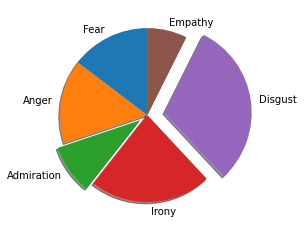

<Figure size 432x288 with 0 Axes>

In [ ]:
y = np.array([results.get('fear'), results.get('anger'), results.get('admiration'), results.get('irony'),results.get('disgust'),results.get('empathy')])
mylabels = ['Fear', 'Anger', 'Admiration', 'Irony', 'Disgust', 'Empathy']
myexplode = [0, 0, 0.1, 0, 0.2,0]
plt.pie(y, labels = mylabels, explode = myexplode, shadow = True, startangle = 90)
plt.show() 
plt.savefig('overview2.pdf', bbox_inches='tight')